In [121]:
import gc
import pprint
import hashlib
import tqdm

import numpy  as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn           as sns

import torch
import torch.nn as nn
import torch.nn.functional as F

from IPython.display import display

In [2]:
df = pd.read_csv('~/Documents/data/cartola-fc-brasil-scouts/jogadores.csv')

df['id']  = df['Nome'].apply( lambda x: hashlib.sha1(str.encode(x)).hexdigest() )
df['pos'] = df['Nome'].apply( lambda x: x.split('(')[-1].split(')')[0].strip() )

display( df.sort_values(by="Nome") )

scouts  = ['DS','G','A','SG','FS','FF','FD','FT','DD','DP','GC','CV','CA','PP','GS','FC','I','PI','RB','PE']
mercado = ['Preço', 'Média','Variação']
keys    = ["id", "ano"]

gscouts = df.groupby(keys)[scouts].agg(['sum'])
gscouts.columns = gscouts.columns.map('_'.join)
gscouts = gscouts.reset_index()

gmercado = df.groupby(keys)[mercado].agg(['sum'])
gmercado.columns = gmercado.columns.map('_'.join)
gmercado = gmercado.reset_index()

gpos = df.groupby(keys)[['pos']].agg(['first'])
gpos.columns = gpos.columns.map('_'.join)
gpos = gpos.reset_index()

display(gscouts.sample(5))
display(gmercado.sample(5))
display(gpos.sample(5))

display(gpos['pos_first'].value_counts())

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,...,GS,FC,I,PI,rodada,ano,RB,PE,id,pos
7240,Abel Braga (TEC),Internacional,11.46,16.0,3.78,4.74,0.73,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36,2020,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
6793,Abel Braga (TEC),Internacional,11.31,14.0,3.96,3.14,-0.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,34,2020,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
6213,Abel Braga (TEC),Internacional,11.71,11.0,4.11,7.06,0.48,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31,2020,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
8622,Abel Braga (TEC),Flamengo,10.28,4.0,3.58,4.30,0.43,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,2019,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
8840,Abel Braga (TEC),Flamengo,10.53,5.0,3.82,4.79,0.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5,2019,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14192,Éverson (GOL),Santos,9.79,23.0,4.25,8.00,-0.06,NaN,NaN,NaN,...,20.0,1.0,NaN,NaN,29,2019,NaN,34.0,6d99fcc3bc6b30aced0353e17beee4f211c2ee4a,GOL
10828,Éverson (GOL),Santos,8.62,8.0,4.36,6.20,1.45,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,14,2019,NaN,7.0,6d99fcc3bc6b30aced0353e17beee4f211c2ee4a,GOL
7848,Ênio (MEI),Botafogo,0.85,4.0,1.35,-0.20,-0.53,2.0,NaN,NaN,...,NaN,1.0,1.0,12.0,38,2020,NaN,NaN,98db7cfc8e99fe42e23ab3d1f8b9359815e9c023,MEI
7589,Ênio (MEI),Botafogo,1.38,3.0,1.87,3.10,0.32,2.0,NaN,NaN,...,NaN,NaN,1.0,3.0,37,2020,NaN,NaN,98db7cfc8e99fe42e23ab3d1f8b9359815e9c023,MEI


,id,ano,DS_sum,G_sum,A_sum,SG_sum,FS_sum,FF_sum,FD_sum,FT_sum,...,GC_sum,CV_sum,CA_sum,PP_sum,GS_sum,FC_sum,I_sum,PI_sum,RB_sum,PE_sum
15,02298558fc62de33ac20df652f71cf734bd41237,2020,80.0,0.0,0.0,0.0,25.0,12.0,11.0,0.0,...,0.0,0.0,19.0,0.0,0.0,75.0,0.0,149.0,0.0,0.0
1254,fa81716fb18d99919931dae046b2dea713ae2036,2020,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,21.0,0.0,0.0,98.0,0.0,0.0
268,3216f76537a923f901ca7f02f22bf47a4f2cc002,2020,53.0,7.0,19.0,0.0,81.0,31.0,18.0,0.0,...,0.0,0.0,11.0,0.0,0.0,66.0,0.0,253.0,0.0,0.0
557,6ca56a7d80b22f0bd2f979848820347ba945daa1,2020,809.0,14.0,24.0,0.0,646.0,167.0,126.0,0.0,...,0.0,0.0,57.0,0.0,0.0,322.0,35.0,2598.0,0.0,0.0
1073,d7fd32c89a4eb2eed369c45871790f8fd43e5cc1,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,id,ano,Preço_sum,Média_sum,Variação_sum
27,04b1f8558ecd4fec1c6d96a9aad8ab2a75771229,2019,138.72,36.82,-2.22
597,7709a17ad466995ef2870dd1f3a499a96c1f7e6e,2020,218.52,85.95,4.27
1258,fbd932aea7f01c99bfb2368ab4c7e3e840e015e2,2019,1.79,-0.10,-0.39
924,b74c1950b9d812c347c3ff8cdc4d233e436c9099,2020,13.02,4.42,-1.67
180,20426114ee2f8b68b1fe2479b073295350b18ad7,2020,123.34,98.51,2.94


,id,ano,pos_first
497,61da772d29db083dd7e9d9c156b5671ecfec1b1f,2019,ZAG
613,79471fa35f3143ed842e45095f0f50314476b2a9,2020,ATA
1054,d4be38a7845b32c17edd1b405c9efb8651670788,2020,ZAG
558,6caa90102c9e83a1c5e6fef4c9992eb00ce4d533,2020,GOL
732,940511f49a13679e4338c3ba7feee1bd5bfbfb71,2019,LAT


MEI    408
ATA    285
ZAG    203
LAT    200
GOL     96
TEC     91
Name: pos_first, dtype: int64

# feedforward neural network

## teoria

_A perceptron is always feedforward, that is, all the arrows are going in the direction of the output. Neural networks in general might have loops, and if so, are often called recurrent networks. (...) Finally, having multiple layers means more than two layers, that is, you have hidden layers. A perceptron is a network with two layers, one input and one output. A multilayered network means that you have at least one hidden layer (we call all the layers between the input and output layers hidden)._ [ref](https://cs.stackexchange.com/a/53656)

## codigo

### binário

In [65]:
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys)], axis=1).copy(); X_columns = X.columns
X = X.astype(np.float64).fillna(0.0).values
X = scaler.fit_transform( X )

y = np.where(gpos['pos_first']=='ATA', 1, 0)

In [66]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size = 0.2, random_state = 37)

- - -

In [67]:
print(torch.cuda.is_available(), torch.cuda.current_device())
print(torch.cuda.get_device_name(torch.cuda.current_device()))

True 0
GeForce GTX 1660 Ti


In [166]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('using device:', device)

using device: cuda


In [167]:
if device.type == 'cuda':
    print('memory usage:')
    print('allocated   :', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('cached      :', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

memory usage:
allocated   : 0.0 GB
cached      : 0.0 GB


In [70]:
Xt = torch.from_numpy(X_train).type(torch.FloatTensor)
Xh = torch.from_numpy(X_holdout).type(torch.FloatTensor)
yt = torch.from_numpy(y_train).type(torch.LongTensor)
yh = torch.from_numpy(y_holdout).type(torch.LongTensor) 

In [71]:
print(Xt.shape)
print(Xh.shape)
print(yt.shape)
print(yh.shape)

torch.Size([1026, 23])
torch.Size([257, 23])
torch.Size([1026])
torch.Size([257])


In [72]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(23, 3)
        self.fc2 = nn.Linear(3, 2)
        
    def forward(self,x):
        x = self.fc1(x) # 1st layer
        x = torch.tanh(x)   # hidden layer
        x = self.fc2(x) # output layer
        return x
        
    def predict(self,x):
        pred = F.softmax(self.forward(x), dim=1)
        ans  = []
        for t in pred:
            if t[0] > t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

In [73]:
rede = Net()
crt  = nn.CrossEntropyLoss()
opt = torch.optim.Adam(rede.parameters(), lr=0.01)

treino

In [74]:
%%time
epochs = 10000
losses = []

for i in range(epochs):
    y_pred = rede.forward(Xt)
    loss   = crt(y_pred, yt)
    losses.append( loss.item() )
    
    opt.zero_grad() # clear the previous gradients
    loss.backward() # compute gradients
    opt.step()      # adjust weights

CPU times: user 1min 50s, sys: 1.73 s, total: 1min 51s
Wall time: 7.92 s


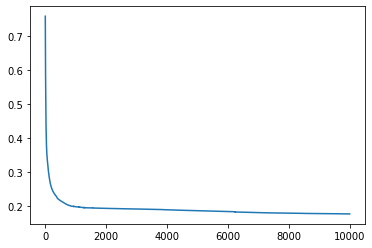

In [75]:
plt.plot(range(epochs), losses);

In [76]:
from sklearn.metrics import accuracy_score

print("treino :", accuracy_score(rede.predict(Xt), yt))
print("teste  :", accuracy_score(rede.predict(Xh), yh))

treino : 0.9220272904483431
teste  : 0.8871595330739299


### multiclasse

In [239]:
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from sklearn.metrics  import confusion_matrix, classification_report

X = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys)], axis=1).copy(); X_columns = X.columns
X = X.astype(np.float64).fillna(0.0).values
X = scaler.fit_transform( X )

y = gpos['pos_first'].astype('category').cat.codes.values

In [240]:
class ClassifierDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [241]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size = 0.2, random_state = 37)

train_dataset   = ClassifierDataset(torch.from_numpy(X_train).float(), 
                                    torch.from_numpy(y_train).long())
holdout_dataset = ClassifierDataset(torch.from_numpy(X_holdout).float(), 
                                    torch.from_numpy(y_holdout).long())

In [242]:
EPOCHS        = 1000
BATCH_SIZE    = 16
LEARNING_RATE = 0.007
NUM_FEATURES  = X.shape[1]
NUM_CLASSES   = len(np.unique(y))

In [243]:
target_list = []

for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)
target_list = target_list[torch.randperm(len(target_list))]

In [244]:
class_count       = pd.Series(y_train).value_counts().sort_index().values
class_weights     = 1./torch.tensor(class_count, dtype=torch.float) 
class_weights_all = class_weights[target_list]

print(target_list)
print(class_weights)
print(class_weights_all)

tensor([1, 0, 3,  ..., 1, 1, 2])
tensor([0.0043, 0.0125, 0.0061, 0.0032, 0.0139, 0.0062])
tensor([0.0125, 0.0043, 0.0032,  ..., 0.0125, 0.0125, 0.0061])


In [245]:
weighted_sampler = WeightedRandomSampler(weights     = class_weights_all,
                                         num_samples = len(class_weights_all),
                                         replacement = True)

In [246]:
train_loader = DataLoader(dataset    = train_dataset,
                          batch_size = BATCH_SIZE,
                          sampler    = weighted_sampler)
holdout_loader = DataLoader(dataset    = holdout_dataset, 
                            batch_size = 1)

In [262]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer_1 = nn.Linear(NUM_FEATURES, 64)
        self.layer_2 = nn.Linear(64, 32)
        self.layer_3 = nn.Linear(32, 16)
        self.layer_o = nn.Linear(16, NUM_CLASSES)
        
        self.relu    = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(32)
        self.batchnorm3 = nn.BatchNorm1d(16)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_o(x)
        
        return x

In [263]:
rede = Net()
crt  = nn.CrossEntropyLoss()
opt  = torch.optim.Adam(rede.parameters(), lr=LEARNING_RATE)
rede.to(device)

print(rede)

Net(
  (layer_1): Linear(in_features=23, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=16, bias=True)
  (layer_o): Linear(in_features=16, out_features=6, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [264]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    correct_pred   = (y_pred_tags == y_test).float()
    
    acc = correct_pred.sum() / len(correct_pred)
    acc = torch.round(acc * 100)
    
    return acc

In [265]:
acc_stats  = { "train": [],
               "val"  : []}
loss_stats = {"train": [],
              "val": []}

In [266]:
for e in tqdm.tqdm(range(EPOCHS)):
    train_epoch_loss = 0
    train_epoch_acc  = 0
    rede.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch = X_train_batch.to(device)
        y_train_batch = y_train_batch.to(device)
        opt.zero_grad()
        
        y_train_pred = rede(X_train_batch)
        
        train_loss = crt(y_train_pred, y_train_batch)
        train_acc  = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        opt.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc  += train_acc.item()
        
    with torch.no_grad():
        val_epoch_loss = 0
        val_epoch_acc  = 0
        rede.eval()
        for X_val_batch, y_val_batch in holdout_loader:
            X_val_batch = X_val_batch.to(device)
            y_val_batch = y_val_batch.to(device)
            
            y_val_pred = rede(X_val_batch)
                        
            val_loss = crt(y_val_pred, y_val_batch)
            val_acc  = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc  += val_acc.item()
    
    loss_stats['train'].append(train_epoch_acc/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(holdout_loader))
    acc_stats['train'].append(train_epoch_acc/len(train_loader))
    acc_stats['val'].append(val_epoch_acc/len(holdout_loader))
                              
    print(f"Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(holdout_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(holdout_loader):.3f}")

  0%|          | 1/1000 [00:00<05:15,  3.17it/s]

Epoch 000: | Train Loss: 1.42882 | Val Loss: 1.17322 | Train Acc: 41.000| Val Acc: 52.918


  0%|          | 2/1000 [00:00<05:10,  3.21it/s]

Epoch 001: | Train Loss: 1.15368 | Val Loss: 0.94675 | Train Acc: 51.415| Val Acc: 61.089


  0%|          | 3/1000 [00:00<04:59,  3.33it/s]

Epoch 002: | Train Loss: 1.05998 | Val Loss: 1.01924 | Train Acc: 56.108| Val Acc: 56.420


  0%|          | 4/1000 [00:01<05:02,  3.29it/s]

Epoch 003: | Train Loss: 1.05124 | Val Loss: 1.00046 | Train Acc: 55.723| Val Acc: 56.031


  0%|          | 5/1000 [00:01<05:06,  3.25it/s]

Epoch 004: | Train Loss: 1.03855 | Val Loss: 0.92697 | Train Acc: 57.492| Val Acc: 58.366


  1%|          | 6/1000 [00:01<05:07,  3.24it/s]

Epoch 005: | Train Loss: 1.01546 | Val Loss: 0.93665 | Train Acc: 58.215| Val Acc: 59.922


  1%|          | 7/1000 [00:02<05:07,  3.23it/s]

Epoch 006: | Train Loss: 0.95487 | Val Loss: 0.90905 | Train Acc: 59.185| Val Acc: 64.202


  1%|          | 8/1000 [00:02<05:06,  3.23it/s]

Epoch 007: | Train Loss: 0.92135 | Val Loss: 0.78597 | Train Acc: 62.569| Val Acc: 63.813


  1%|          | 9/1000 [00:02<05:06,  3.23it/s]

Epoch 008: | Train Loss: 0.94096 | Val Loss: 0.82978 | Train Acc: 62.492| Val Acc: 65.370


  1%|          | 10/1000 [00:03<05:06,  3.23it/s]

Epoch 009: | Train Loss: 0.96137 | Val Loss: 0.82113 | Train Acc: 60.215| Val Acc: 72.374


  1%|          | 11/1000 [00:03<05:16,  3.12it/s]

Epoch 010: | Train Loss: 0.90299 | Val Loss: 0.81985 | Train Acc: 63.615| Val Acc: 68.482


  1%|          | 12/1000 [00:03<05:14,  3.14it/s]

Epoch 011: | Train Loss: 0.89269 | Val Loss: 0.84445 | Train Acc: 64.046| Val Acc: 60.311


  1%|▏         | 13/1000 [00:04<05:09,  3.19it/s]

Epoch 012: | Train Loss: 0.91212 | Val Loss: 0.84912 | Train Acc: 63.446| Val Acc: 62.646


  1%|▏         | 14/1000 [00:04<05:15,  3.13it/s]

Epoch 013: | Train Loss: 0.90854 | Val Loss: 0.91674 | Train Acc: 64.185| Val Acc: 63.424


  2%|▏         | 15/1000 [00:04<05:11,  3.16it/s]

Epoch 014: | Train Loss: 0.90780 | Val Loss: 0.80222 | Train Acc: 63.446| Val Acc: 62.257


  2%|▏         | 16/1000 [00:05<05:19,  3.08it/s]

Epoch 015: | Train Loss: 0.88226 | Val Loss: 0.91393 | Train Acc: 64.046| Val Acc: 60.311


  2%|▏         | 17/1000 [00:05<05:16,  3.11it/s]

Epoch 016: | Train Loss: 0.87855 | Val Loss: 0.82827 | Train Acc: 63.615| Val Acc: 63.035


  2%|▏         | 18/1000 [00:05<05:13,  3.14it/s]

Epoch 017: | Train Loss: 0.82691 | Val Loss: 0.88868 | Train Acc: 65.569| Val Acc: 61.868


  2%|▏         | 19/1000 [00:05<05:10,  3.16it/s]

Epoch 018: | Train Loss: 0.93680 | Val Loss: 0.94532 | Train Acc: 62.062| Val Acc: 54.475


  2%|▏         | 20/1000 [00:06<05:08,  3.18it/s]

Epoch 019: | Train Loss: 0.78974 | Val Loss: 0.87839 | Train Acc: 66.415| Val Acc: 68.872


  2%|▏         | 21/1000 [00:06<05:09,  3.16it/s]

Epoch 020: | Train Loss: 0.82541 | Val Loss: 0.84922 | Train Acc: 67.892| Val Acc: 62.646


  2%|▏         | 22/1000 [00:06<05:09,  3.16it/s]

Epoch 021: | Train Loss: 0.87780 | Val Loss: 0.83777 | Train Acc: 63.354| Val Acc: 61.868


  2%|▏         | 23/1000 [00:07<05:00,  3.25it/s]

Epoch 022: | Train Loss: 0.81021 | Val Loss: 0.82526 | Train Acc: 67.262| Val Acc: 64.202


  2%|▏         | 24/1000 [00:07<04:59,  3.26it/s]

Epoch 023: | Train Loss: 0.86993 | Val Loss: 0.86785 | Train Acc: 64.969| Val Acc: 64.981


  2%|▎         | 25/1000 [00:07<04:55,  3.30it/s]

Epoch 024: | Train Loss: 0.84486 | Val Loss: 0.82900 | Train Acc: 65.800| Val Acc: 63.035


  3%|▎         | 26/1000 [00:08<05:00,  3.24it/s]

Epoch 025: | Train Loss: 0.77382 | Val Loss: 0.81621 | Train Acc: 70.031| Val Acc: 65.370


  3%|▎         | 27/1000 [00:08<05:00,  3.24it/s]

Epoch 026: | Train Loss: 0.81956 | Val Loss: 0.86993 | Train Acc: 65.569| Val Acc: 62.646


  3%|▎         | 28/1000 [00:08<05:00,  3.23it/s]

Epoch 027: | Train Loss: 0.90397 | Val Loss: 0.85400 | Train Acc: 66.400| Val Acc: 62.257


  3%|▎         | 29/1000 [00:09<04:51,  3.33it/s]

Epoch 028: | Train Loss: 0.77788 | Val Loss: 0.88370 | Train Acc: 69.908| Val Acc: 64.591


  3%|▎         | 30/1000 [00:09<04:49,  3.35it/s]

Epoch 029: | Train Loss: 0.82045 | Val Loss: 0.89876 | Train Acc: 68.631| Val Acc: 63.035


  3%|▎         | 31/1000 [00:09<04:56,  3.27it/s]

Epoch 030: | Train Loss: 0.82444 | Val Loss: 0.92429 | Train Acc: 66.138| Val Acc: 56.809


  3%|▎         | 32/1000 [00:09<04:55,  3.28it/s]

Epoch 031: | Train Loss: 0.82861 | Val Loss: 0.92118 | Train Acc: 67.785| Val Acc: 58.366


  3%|▎         | 33/1000 [00:10<04:55,  3.27it/s]

Epoch 032: | Train Loss: 0.82434 | Val Loss: 0.83912 | Train Acc: 67.231| Val Acc: 64.981


  3%|▎         | 34/1000 [00:10<04:54,  3.28it/s]

Epoch 033: | Train Loss: 0.87386 | Val Loss: 0.82471 | Train Acc: 64.385| Val Acc: 62.257


  4%|▎         | 35/1000 [00:10<04:55,  3.27it/s]

Epoch 034: | Train Loss: 0.81175 | Val Loss: 0.89852 | Train Acc: 68.431| Val Acc: 56.809


  4%|▎         | 36/1000 [00:11<04:54,  3.27it/s]

Epoch 035: | Train Loss: 0.82358 | Val Loss: 1.10986 | Train Acc: 65.862| Val Acc: 52.918


  4%|▎         | 37/1000 [00:11<04:56,  3.25it/s]

Epoch 036: | Train Loss: 0.79272 | Val Loss: 1.17484 | Train Acc: 69.615| Val Acc: 52.140


  4%|▍         | 38/1000 [00:11<04:58,  3.23it/s]

Epoch 037: | Train Loss: 0.78590 | Val Loss: 0.90640 | Train Acc: 68.554| Val Acc: 61.479


  4%|▍         | 39/1000 [00:12<04:58,  3.22it/s]

Epoch 038: | Train Loss: 0.82447 | Val Loss: 0.68155 | Train Acc: 65.831| Val Acc: 71.984


  4%|▍         | 40/1000 [00:12<05:00,  3.20it/s]

Epoch 039: | Train Loss: 0.78954 | Val Loss: 0.87799 | Train Acc: 68.031| Val Acc: 55.642


  4%|▍         | 41/1000 [00:12<04:52,  3.28it/s]

Epoch 040: | Train Loss: 0.79347 | Val Loss: 0.72834 | Train Acc: 66.015| Val Acc: 67.315


  4%|▍         | 42/1000 [00:13<04:59,  3.20it/s]

Epoch 041: | Train Loss: 0.74076 | Val Loss: 0.95285 | Train Acc: 72.031| Val Acc: 59.144


  4%|▍         | 43/1000 [00:13<05:04,  3.14it/s]

Epoch 042: | Train Loss: 0.74696 | Val Loss: 0.91068 | Train Acc: 70.723| Val Acc: 59.533


  4%|▍         | 44/1000 [00:13<05:06,  3.12it/s]

Epoch 043: | Train Loss: 0.81312 | Val Loss: 0.88308 | Train Acc: 67.323| Val Acc: 65.370


  4%|▍         | 45/1000 [00:13<04:56,  3.22it/s]

Epoch 044: | Train Loss: 0.77354 | Val Loss: 0.95231 | Train Acc: 70.046| Val Acc: 63.813


  5%|▍         | 46/1000 [00:14<04:48,  3.30it/s]

Epoch 045: | Train Loss: 0.80632 | Val Loss: 1.06008 | Train Acc: 69.523| Val Acc: 57.977


  5%|▍         | 47/1000 [00:14<04:55,  3.22it/s]

Epoch 046: | Train Loss: 0.82858 | Val Loss: 0.90282 | Train Acc: 67.923| Val Acc: 63.813


  5%|▍         | 48/1000 [00:14<04:45,  3.33it/s]

Epoch 047: | Train Loss: 0.78587 | Val Loss: 0.96591 | Train Acc: 69.092| Val Acc: 63.035


  5%|▍         | 49/1000 [00:15<04:49,  3.29it/s]

Epoch 048: | Train Loss: 0.76178 | Val Loss: 0.85773 | Train Acc: 67.754| Val Acc: 64.202


  5%|▌         | 50/1000 [00:15<04:48,  3.29it/s]

Epoch 049: | Train Loss: 0.78638 | Val Loss: 0.90999 | Train Acc: 67.554| Val Acc: 58.755


  5%|▌         | 51/1000 [00:15<04:52,  3.25it/s]

Epoch 050: | Train Loss: 0.77682 | Val Loss: 0.84875 | Train Acc: 68.492| Val Acc: 61.089


  5%|▌         | 52/1000 [00:16<04:49,  3.28it/s]

Epoch 051: | Train Loss: 0.73436 | Val Loss: 0.84629 | Train Acc: 69.108| Val Acc: 67.315


  5%|▌         | 53/1000 [00:16<04:49,  3.27it/s]

Epoch 052: | Train Loss: 0.74551 | Val Loss: 1.26190 | Train Acc: 69.400| Val Acc: 54.864


  5%|▌         | 54/1000 [00:16<04:50,  3.26it/s]

Epoch 053: | Train Loss: 0.80768 | Val Loss: 0.74974 | Train Acc: 67.846| Val Acc: 64.981


  6%|▌         | 55/1000 [00:17<04:49,  3.26it/s]

Epoch 054: | Train Loss: 0.80064 | Val Loss: 1.01716 | Train Acc: 68.169| Val Acc: 53.307


  6%|▌         | 56/1000 [00:17<04:47,  3.28it/s]

Epoch 055: | Train Loss: 0.72631 | Val Loss: 0.85538 | Train Acc: 70.215| Val Acc: 63.035


  6%|▌         | 57/1000 [00:17<04:50,  3.24it/s]

Epoch 056: | Train Loss: 0.76785 | Val Loss: 1.07798 | Train Acc: 68.615| Val Acc: 55.253


  6%|▌         | 58/1000 [00:17<04:49,  3.25it/s]

Epoch 057: | Train Loss: 0.73874 | Val Loss: 0.93342 | Train Acc: 69.169| Val Acc: 61.479


  6%|▌         | 59/1000 [00:18<04:49,  3.25it/s]

Epoch 058: | Train Loss: 0.74619 | Val Loss: 1.04423 | Train Acc: 69.508| Val Acc: 55.253


  6%|▌         | 60/1000 [00:18<04:55,  3.18it/s]

Epoch 059: | Train Loss: 0.80987 | Val Loss: 0.93031 | Train Acc: 68.123| Val Acc: 57.588


  6%|▌         | 61/1000 [00:18<04:51,  3.22it/s]

Epoch 060: | Train Loss: 0.69935 | Val Loss: 0.88928 | Train Acc: 71.785| Val Acc: 59.533


  6%|▌         | 62/1000 [00:19<04:49,  3.24it/s]

Epoch 061: | Train Loss: 0.79783 | Val Loss: 1.12695 | Train Acc: 69.908| Val Acc: 57.588


  6%|▋         | 63/1000 [00:19<04:48,  3.25it/s]

Epoch 062: | Train Loss: 0.81490 | Val Loss: 1.01303 | Train Acc: 70.385| Val Acc: 54.864


  6%|▋         | 64/1000 [00:19<04:47,  3.25it/s]

Epoch 063: | Train Loss: 0.69824 | Val Loss: 0.95778 | Train Acc: 71.323| Val Acc: 56.809


  6%|▋         | 65/1000 [00:20<04:47,  3.25it/s]

Epoch 064: | Train Loss: 0.75665 | Val Loss: 0.93092 | Train Acc: 70.462| Val Acc: 56.031


  7%|▋         | 66/1000 [00:20<04:48,  3.23it/s]

Epoch 065: | Train Loss: 0.75012 | Val Loss: 0.89775 | Train Acc: 70.446| Val Acc: 64.981


  7%|▋         | 67/1000 [00:20<04:46,  3.25it/s]

Epoch 066: | Train Loss: 0.75059 | Val Loss: 0.93667 | Train Acc: 70.600| Val Acc: 64.591


  7%|▋         | 68/1000 [00:21<04:47,  3.24it/s]

Epoch 067: | Train Loss: 0.74705 | Val Loss: 0.97636 | Train Acc: 71.523| Val Acc: 63.813


  7%|▋         | 69/1000 [00:21<04:42,  3.29it/s]

Epoch 068: | Train Loss: 0.75744 | Val Loss: 1.06914 | Train Acc: 69.200| Val Acc: 56.420


  7%|▋         | 70/1000 [00:21<04:42,  3.29it/s]

Epoch 069: | Train Loss: 0.75274 | Val Loss: 0.99632 | Train Acc: 70.492| Val Acc: 61.479


  7%|▋         | 71/1000 [00:21<04:41,  3.30it/s]

Epoch 070: | Train Loss: 0.77542 | Val Loss: 0.80893 | Train Acc: 70.923| Val Acc: 64.591


  7%|▋         | 72/1000 [00:22<04:39,  3.32it/s]

Epoch 071: | Train Loss: 0.71824 | Val Loss: 0.87195 | Train Acc: 70.338| Val Acc: 59.144


  7%|▋         | 73/1000 [00:22<04:43,  3.27it/s]

Epoch 072: | Train Loss: 0.66366 | Val Loss: 1.13657 | Train Acc: 74.262| Val Acc: 54.086


  7%|▋         | 74/1000 [00:22<04:45,  3.24it/s]

Epoch 073: | Train Loss: 0.72170 | Val Loss: 1.13263 | Train Acc: 70.908| Val Acc: 59.533


  8%|▊         | 75/1000 [00:23<04:40,  3.30it/s]

Epoch 074: | Train Loss: 0.74221 | Val Loss: 0.98105 | Train Acc: 73.015| Val Acc: 61.868


  8%|▊         | 76/1000 [00:23<04:40,  3.29it/s]

Epoch 075: | Train Loss: 0.78929 | Val Loss: 0.87888 | Train Acc: 68.908| Val Acc: 59.533


  8%|▊         | 77/1000 [00:23<04:42,  3.27it/s]

Epoch 076: | Train Loss: 0.67779 | Val Loss: 0.99043 | Train Acc: 72.985| Val Acc: 57.977


  8%|▊         | 78/1000 [00:24<04:42,  3.26it/s]

Epoch 077: | Train Loss: 0.76041 | Val Loss: 0.98649 | Train Acc: 70.077| Val Acc: 61.089


  8%|▊         | 79/1000 [00:24<04:40,  3.28it/s]

Epoch 078: | Train Loss: 0.71219 | Val Loss: 0.96789 | Train Acc: 70.938| Val Acc: 59.922


  8%|▊         | 80/1000 [00:24<04:38,  3.31it/s]

Epoch 079: | Train Loss: 0.74076 | Val Loss: 0.99285 | Train Acc: 70.400| Val Acc: 55.642


  8%|▊         | 81/1000 [00:25<04:42,  3.25it/s]

Epoch 080: | Train Loss: 0.72579 | Val Loss: 1.49540 | Train Acc: 71.292| Val Acc: 49.416


  8%|▊         | 82/1000 [00:25<04:41,  3.26it/s]

Epoch 081: | Train Loss: 0.74495 | Val Loss: 0.94900 | Train Acc: 69.662| Val Acc: 57.198


  8%|▊         | 83/1000 [00:25<04:42,  3.25it/s]

Epoch 082: | Train Loss: 0.71491 | Val Loss: 1.40086 | Train Acc: 72.769| Val Acc: 51.362


  8%|▊         | 84/1000 [00:25<04:42,  3.25it/s]

Epoch 083: | Train Loss: 0.82102 | Val Loss: 1.02502 | Train Acc: 69.585| Val Acc: 56.809


  8%|▊         | 85/1000 [00:26<04:43,  3.23it/s]

Epoch 084: | Train Loss: 0.75092 | Val Loss: 0.88359 | Train Acc: 69.431| Val Acc: 59.533


  9%|▊         | 86/1000 [00:26<04:45,  3.21it/s]

Epoch 085: | Train Loss: 0.74831 | Val Loss: 1.04248 | Train Acc: 69.369| Val Acc: 55.642


  9%|▊         | 87/1000 [00:26<04:44,  3.20it/s]

Epoch 086: | Train Loss: 0.75102 | Val Loss: 1.20374 | Train Acc: 69.431| Val Acc: 49.027


  9%|▉         | 88/1000 [00:27<04:43,  3.22it/s]

Epoch 087: | Train Loss: 0.76957 | Val Loss: 1.40204 | Train Acc: 69.523| Val Acc: 47.471


  9%|▉         | 89/1000 [00:27<04:35,  3.30it/s]

Epoch 088: | Train Loss: 0.80388 | Val Loss: 0.99611 | Train Acc: 66.815| Val Acc: 59.533


  9%|▉         | 90/1000 [00:27<04:36,  3.30it/s]

Epoch 089: | Train Loss: 0.71793 | Val Loss: 0.86593 | Train Acc: 71.031| Val Acc: 67.704


  9%|▉         | 91/1000 [00:28<04:37,  3.28it/s]

Epoch 090: | Train Loss: 0.74588 | Val Loss: 1.27433 | Train Acc: 69.662| Val Acc: 50.973


  9%|▉         | 92/1000 [00:28<04:42,  3.22it/s]

Epoch 091: | Train Loss: 0.69505 | Val Loss: 0.82168 | Train Acc: 71.769| Val Acc: 68.482


  9%|▉         | 93/1000 [00:28<04:38,  3.26it/s]

Epoch 092: | Train Loss: 0.70019 | Val Loss: 1.03691 | Train Acc: 71.615| Val Acc: 60.311


  9%|▉         | 94/1000 [00:29<04:43,  3.19it/s]

Epoch 093: | Train Loss: 0.79736 | Val Loss: 1.00918 | Train Acc: 69.215| Val Acc: 61.089


 10%|▉         | 95/1000 [00:29<04:47,  3.14it/s]

Epoch 094: | Train Loss: 0.70638 | Val Loss: 1.48138 | Train Acc: 72.862| Val Acc: 50.195


 10%|▉         | 96/1000 [00:29<04:49,  3.12it/s]

Epoch 095: | Train Loss: 0.70213 | Val Loss: 0.91070 | Train Acc: 72.646| Val Acc: 63.424


 10%|▉         | 97/1000 [00:29<04:47,  3.14it/s]

Epoch 096: | Train Loss: 0.70109 | Val Loss: 1.20245 | Train Acc: 70.415| Val Acc: 57.588


 10%|▉         | 98/1000 [00:30<04:48,  3.12it/s]

Epoch 097: | Train Loss: 0.72990 | Val Loss: 0.99032 | Train Acc: 70.677| Val Acc: 59.922


 10%|▉         | 99/1000 [00:30<04:49,  3.12it/s]

Epoch 098: | Train Loss: 0.80682 | Val Loss: 1.06200 | Train Acc: 68.015| Val Acc: 55.253


 10%|█         | 100/1000 [00:30<04:45,  3.15it/s]

Epoch 099: | Train Loss: 0.75743 | Val Loss: 1.23424 | Train Acc: 71.538| Val Acc: 54.864


 10%|█         | 101/1000 [00:31<04:43,  3.18it/s]

Epoch 100: | Train Loss: 0.73359 | Val Loss: 1.04463 | Train Acc: 70.185| Val Acc: 57.198


 10%|█         | 102/1000 [00:31<04:35,  3.26it/s]

Epoch 101: | Train Loss: 0.73275 | Val Loss: 1.13771 | Train Acc: 71.092| Val Acc: 52.918


 10%|█         | 103/1000 [00:31<04:35,  3.26it/s]

Epoch 102: | Train Loss: 0.71001 | Val Loss: 1.13172 | Train Acc: 71.200| Val Acc: 53.307


 10%|█         | 104/1000 [00:32<04:34,  3.26it/s]

Epoch 103: | Train Loss: 0.67654 | Val Loss: 1.42695 | Train Acc: 70.415| Val Acc: 49.027


 10%|█         | 105/1000 [00:32<04:34,  3.26it/s]

Epoch 104: | Train Loss: 0.74340 | Val Loss: 0.85751 | Train Acc: 72.431| Val Acc: 63.424


 11%|█         | 106/1000 [00:32<04:28,  3.33it/s]

Epoch 105: | Train Loss: 0.71966 | Val Loss: 1.38749 | Train Acc: 73.277| Val Acc: 49.805


 11%|█         | 107/1000 [00:33<04:31,  3.29it/s]

Epoch 106: | Train Loss: 0.79092 | Val Loss: 1.23011 | Train Acc: 68.708| Val Acc: 51.362


 11%|█         | 108/1000 [00:33<04:35,  3.23it/s]

Epoch 107: | Train Loss: 0.68954 | Val Loss: 1.29685 | Train Acc: 72.523| Val Acc: 52.529


 11%|█         | 109/1000 [00:33<04:43,  3.14it/s]

Epoch 108: | Train Loss: 0.66112 | Val Loss: 1.17311 | Train Acc: 73.154| Val Acc: 53.696


 11%|█         | 110/1000 [00:34<04:42,  3.15it/s]

Epoch 109: | Train Loss: 0.74219 | Val Loss: 1.26755 | Train Acc: 72.538| Val Acc: 52.529


 11%|█         | 111/1000 [00:34<04:42,  3.15it/s]

Epoch 110: | Train Loss: 0.70030 | Val Loss: 1.37446 | Train Acc: 72.400| Val Acc: 51.362


 11%|█         | 112/1000 [00:34<04:43,  3.13it/s]

Epoch 111: | Train Loss: 0.70514 | Val Loss: 0.96860 | Train Acc: 72.108| Val Acc: 64.981


 11%|█▏        | 113/1000 [00:34<04:36,  3.21it/s]

Epoch 112: | Train Loss: 0.75418 | Val Loss: 0.87400 | Train Acc: 69.723| Val Acc: 60.700


 11%|█▏        | 114/1000 [00:35<04:36,  3.21it/s]

Epoch 113: | Train Loss: 0.69323 | Val Loss: 1.04150 | Train Acc: 72.600| Val Acc: 55.253


 12%|█▏        | 115/1000 [00:35<04:28,  3.30it/s]

Epoch 114: | Train Loss: 0.68515 | Val Loss: 0.80682 | Train Acc: 72.508| Val Acc: 66.926


 12%|█▏        | 116/1000 [00:35<04:27,  3.31it/s]

Epoch 115: | Train Loss: 0.76365 | Val Loss: 1.07959 | Train Acc: 71.738| Val Acc: 50.195


 12%|█▏        | 117/1000 [00:36<04:25,  3.33it/s]

Epoch 116: | Train Loss: 0.65462 | Val Loss: 1.41700 | Train Acc: 74.123| Val Acc: 49.805


 12%|█▏        | 118/1000 [00:36<04:22,  3.37it/s]

Epoch 117: | Train Loss: 0.67880 | Val Loss: 1.35470 | Train Acc: 73.431| Val Acc: 55.253


 12%|█▏        | 119/1000 [00:36<04:23,  3.34it/s]

Epoch 118: | Train Loss: 0.68699 | Val Loss: 0.96547 | Train Acc: 71.738| Val Acc: 57.588


 12%|█▏        | 120/1000 [00:37<04:26,  3.30it/s]

Epoch 119: | Train Loss: 0.72084 | Val Loss: 0.96061 | Train Acc: 70.969| Val Acc: 57.588


 12%|█▏        | 121/1000 [00:37<04:28,  3.27it/s]

Epoch 120: | Train Loss: 0.69640 | Val Loss: 1.03128 | Train Acc: 71.969| Val Acc: 59.533


 12%|█▏        | 122/1000 [00:37<04:33,  3.21it/s]

Epoch 121: | Train Loss: 0.72351 | Val Loss: 1.01217 | Train Acc: 73.354| Val Acc: 59.922


 12%|█▏        | 123/1000 [00:37<04:24,  3.31it/s]

Epoch 122: | Train Loss: 0.68691 | Val Loss: 1.09913 | Train Acc: 72.169| Val Acc: 59.922


 12%|█▏        | 124/1000 [00:38<04:25,  3.30it/s]

Epoch 123: | Train Loss: 0.71145 | Val Loss: 0.90642 | Train Acc: 71.585| Val Acc: 62.646


 12%|█▎        | 125/1000 [00:38<04:36,  3.16it/s]

Epoch 124: | Train Loss: 0.72834 | Val Loss: 0.86057 | Train Acc: 70.800| Val Acc: 63.035


 13%|█▎        | 126/1000 [00:38<04:34,  3.19it/s]

Epoch 125: | Train Loss: 0.69149 | Val Loss: 1.18830 | Train Acc: 74.508| Val Acc: 52.140


 13%|█▎        | 127/1000 [00:39<04:32,  3.20it/s]

Epoch 126: | Train Loss: 0.77849 | Val Loss: 1.01425 | Train Acc: 71.985| Val Acc: 64.981


 13%|█▎        | 128/1000 [00:39<04:29,  3.23it/s]

Epoch 127: | Train Loss: 0.68233 | Val Loss: 0.87090 | Train Acc: 74.308| Val Acc: 65.370


 13%|█▎        | 129/1000 [00:39<04:21,  3.33it/s]

Epoch 128: | Train Loss: 0.70558 | Val Loss: 0.83600 | Train Acc: 72.738| Val Acc: 61.479


 13%|█▎        | 130/1000 [00:40<04:20,  3.34it/s]

Epoch 129: | Train Loss: 0.63321 | Val Loss: 1.38932 | Train Acc: 73.462| Val Acc: 49.416


 13%|█▎        | 131/1000 [00:40<04:22,  3.31it/s]

Epoch 130: | Train Loss: 0.63289 | Val Loss: 1.46868 | Train Acc: 74.385| Val Acc: 48.638


 13%|█▎        | 132/1000 [00:40<04:27,  3.25it/s]

Epoch 131: | Train Loss: 0.65133 | Val Loss: 1.26109 | Train Acc: 75.246| Val Acc: 51.362


 13%|█▎        | 133/1000 [00:41<04:30,  3.21it/s]

Epoch 132: | Train Loss: 0.65452 | Val Loss: 1.14389 | Train Acc: 74.708| Val Acc: 52.918


 13%|█▎        | 134/1000 [00:41<04:28,  3.23it/s]

Epoch 133: | Train Loss: 0.73354 | Val Loss: 1.06093 | Train Acc: 72.662| Val Acc: 56.031


 14%|█▎        | 135/1000 [00:41<04:28,  3.22it/s]

Epoch 134: | Train Loss: 0.70007 | Val Loss: 1.12984 | Train Acc: 72.338| Val Acc: 54.864


 14%|█▎        | 136/1000 [00:42<04:27,  3.22it/s]

Epoch 135: | Train Loss: 0.67131 | Val Loss: 1.20983 | Train Acc: 74.569| Val Acc: 54.864


 14%|█▎        | 137/1000 [00:42<04:25,  3.25it/s]

Epoch 136: | Train Loss: 0.63595 | Val Loss: 2.13967 | Train Acc: 75.062| Val Acc: 46.693


 14%|█▍        | 138/1000 [00:42<04:32,  3.16it/s]

Epoch 137: | Train Loss: 0.73686 | Val Loss: 1.17006 | Train Acc: 72.646| Val Acc: 49.416


 14%|█▍        | 139/1000 [00:42<04:32,  3.16it/s]

Epoch 138: | Train Loss: 0.69890 | Val Loss: 0.87170 | Train Acc: 72.538| Val Acc: 58.366


 14%|█▍        | 140/1000 [00:43<04:31,  3.17it/s]

Epoch 139: | Train Loss: 0.69949 | Val Loss: 1.47232 | Train Acc: 73.092| Val Acc: 51.751


 14%|█▍        | 141/1000 [00:43<04:30,  3.18it/s]

Epoch 140: | Train Loss: 0.74311 | Val Loss: 0.96409 | Train Acc: 69.815| Val Acc: 56.420


 14%|█▍        | 142/1000 [00:43<04:31,  3.16it/s]

Epoch 141: | Train Loss: 0.66402 | Val Loss: 1.07613 | Train Acc: 73.677| Val Acc: 50.973


 14%|█▍        | 143/1000 [00:44<04:30,  3.16it/s]

Epoch 142: | Train Loss: 0.66632 | Val Loss: 1.15973 | Train Acc: 74.385| Val Acc: 52.918


 14%|█▍        | 144/1000 [00:44<04:30,  3.16it/s]

Epoch 143: | Train Loss: 0.67267 | Val Loss: 1.42911 | Train Acc: 74.462| Val Acc: 48.638


 14%|█▍        | 145/1000 [00:44<04:19,  3.30it/s]

Epoch 144: | Train Loss: 0.70246 | Val Loss: 1.13711 | Train Acc: 73.338| Val Acc: 51.751


 15%|█▍        | 146/1000 [00:45<04:10,  3.41it/s]

Epoch 145: | Train Loss: 0.66992 | Val Loss: 0.93932 | Train Acc: 73.400| Val Acc: 57.588


 15%|█▍        | 147/1000 [00:45<04:04,  3.48it/s]

Epoch 146: | Train Loss: 0.70295 | Val Loss: 0.87675 | Train Acc: 72.262| Val Acc: 61.479


 15%|█▍        | 148/1000 [00:45<04:03,  3.49it/s]

Epoch 147: | Train Loss: 0.66480 | Val Loss: 1.10180 | Train Acc: 72.569| Val Acc: 52.529


 15%|█▍        | 149/1000 [00:45<04:11,  3.39it/s]

Epoch 148: | Train Loss: 0.66390 | Val Loss: 1.25593 | Train Acc: 72.754| Val Acc: 53.307


 15%|█▌        | 150/1000 [00:46<04:13,  3.36it/s]

Epoch 149: | Train Loss: 0.67534 | Val Loss: 0.97832 | Train Acc: 72.892| Val Acc: 56.420


 15%|█▌        | 151/1000 [00:46<04:15,  3.33it/s]

Epoch 150: | Train Loss: 0.67238 | Val Loss: 0.88168 | Train Acc: 72.215| Val Acc: 60.700


 15%|█▌        | 152/1000 [00:46<04:16,  3.30it/s]

Epoch 151: | Train Loss: 0.74906 | Val Loss: 0.99857 | Train Acc: 72.446| Val Acc: 58.366


 15%|█▌        | 153/1000 [00:47<04:19,  3.26it/s]

Epoch 152: | Train Loss: 0.67965 | Val Loss: 1.49817 | Train Acc: 74.015| Val Acc: 47.860


 15%|█▌        | 154/1000 [00:47<04:23,  3.21it/s]

Epoch 153: | Train Loss: 0.67475 | Val Loss: 1.06717 | Train Acc: 73.123| Val Acc: 53.307


 16%|█▌        | 155/1000 [00:47<04:15,  3.30it/s]

Epoch 154: | Train Loss: 0.65474 | Val Loss: 0.95471 | Train Acc: 73.138| Val Acc: 63.035


 16%|█▌        | 156/1000 [00:48<04:16,  3.28it/s]

Epoch 155: | Train Loss: 0.65752 | Val Loss: 0.94385 | Train Acc: 73.985| Val Acc: 59.533


 16%|█▌        | 157/1000 [00:48<04:18,  3.26it/s]

Epoch 156: | Train Loss: 0.65182 | Val Loss: 1.35125 | Train Acc: 74.785| Val Acc: 51.751


 16%|█▌        | 158/1000 [00:48<04:20,  3.23it/s]

Epoch 157: | Train Loss: 0.70323 | Val Loss: 1.11642 | Train Acc: 73.138| Val Acc: 56.420


 16%|█▌        | 159/1000 [00:49<04:20,  3.22it/s]

Epoch 158: | Train Loss: 0.67392 | Val Loss: 1.20294 | Train Acc: 72.738| Val Acc: 55.642


 16%|█▌        | 160/1000 [00:49<04:20,  3.22it/s]

Epoch 159: | Train Loss: 0.62215 | Val Loss: 1.07917 | Train Acc: 74.400| Val Acc: 58.366


 16%|█▌        | 161/1000 [00:49<04:19,  3.23it/s]

Epoch 160: | Train Loss: 0.61289 | Val Loss: 1.26711 | Train Acc: 76.415| Val Acc: 56.809


 16%|█▌        | 162/1000 [00:49<04:19,  3.23it/s]

Epoch 161: | Train Loss: 0.68424 | Val Loss: 0.94621 | Train Acc: 72.523| Val Acc: 61.089


 16%|█▋        | 163/1000 [00:50<04:16,  3.26it/s]

Epoch 162: | Train Loss: 0.67483 | Val Loss: 1.17516 | Train Acc: 73.677| Val Acc: 57.588


 16%|█▋        | 164/1000 [00:50<04:10,  3.33it/s]

Epoch 163: | Train Loss: 0.62144 | Val Loss: 0.99385 | Train Acc: 76.092| Val Acc: 55.253


 16%|█▋        | 165/1000 [00:50<04:04,  3.42it/s]

Epoch 164: | Train Loss: 0.66474 | Val Loss: 0.94070 | Train Acc: 73.000| Val Acc: 64.202


 17%|█▋        | 166/1000 [00:51<03:59,  3.48it/s]

Epoch 165: | Train Loss: 0.66451 | Val Loss: 1.16250 | Train Acc: 74.800| Val Acc: 64.981


 17%|█▋        | 167/1000 [00:51<03:56,  3.52it/s]

Epoch 166: | Train Loss: 0.64579 | Val Loss: 1.20614 | Train Acc: 73.723| Val Acc: 54.086


 17%|█▋        | 168/1000 [00:51<03:54,  3.55it/s]

Epoch 167: | Train Loss: 0.68102 | Val Loss: 1.56330 | Train Acc: 72.677| Val Acc: 53.307


 17%|█▋        | 169/1000 [00:51<03:52,  3.57it/s]

Epoch 168: | Train Loss: 0.65083 | Val Loss: 1.52667 | Train Acc: 75.492| Val Acc: 53.307


 17%|█▋        | 170/1000 [00:52<03:56,  3.52it/s]

Epoch 169: | Train Loss: 0.68686 | Val Loss: 0.88021 | Train Acc: 73.646| Val Acc: 61.868


 17%|█▋        | 171/1000 [00:52<03:58,  3.47it/s]

Epoch 170: | Train Loss: 0.70701 | Val Loss: 1.31887 | Train Acc: 71.431| Val Acc: 51.751


 17%|█▋        | 172/1000 [00:52<04:04,  3.38it/s]

Epoch 171: | Train Loss: 0.63167 | Val Loss: 1.00205 | Train Acc: 74.831| Val Acc: 60.311


 17%|█▋        | 173/1000 [00:53<04:05,  3.38it/s]

Epoch 172: | Train Loss: 0.64783 | Val Loss: 1.47305 | Train Acc: 73.785| Val Acc: 49.805


 17%|█▋        | 174/1000 [00:53<04:08,  3.32it/s]

Epoch 173: | Train Loss: 0.65451 | Val Loss: 1.10000 | Train Acc: 73.815| Val Acc: 59.533


 18%|█▊        | 175/1000 [00:53<04:11,  3.28it/s]

Epoch 174: | Train Loss: 0.59996 | Val Loss: 1.00481 | Train Acc: 76.062| Val Acc: 59.922


 18%|█▊        | 176/1000 [00:54<04:10,  3.29it/s]

Epoch 175: | Train Loss: 0.64133 | Val Loss: 1.21809 | Train Acc: 73.477| Val Acc: 55.253


 18%|█▊        | 177/1000 [00:54<04:08,  3.31it/s]

Epoch 176: | Train Loss: 0.64952 | Val Loss: 1.15891 | Train Acc: 74.985| Val Acc: 54.086


 18%|█▊        | 178/1000 [00:54<04:09,  3.30it/s]

Epoch 177: | Train Loss: 0.68985 | Val Loss: 1.31157 | Train Acc: 72.246| Val Acc: 53.696


 18%|█▊        | 179/1000 [00:54<04:10,  3.27it/s]

Epoch 178: | Train Loss: 0.69341 | Val Loss: 0.92575 | Train Acc: 71.123| Val Acc: 66.926


 18%|█▊        | 180/1000 [00:55<04:12,  3.25it/s]

Epoch 179: | Train Loss: 0.69224 | Val Loss: 1.19386 | Train Acc: 71.831| Val Acc: 53.307


 18%|█▊        | 181/1000 [00:55<04:09,  3.28it/s]

Epoch 180: | Train Loss: 0.63513 | Val Loss: 1.05748 | Train Acc: 73.538| Val Acc: 57.588


 18%|█▊        | 182/1000 [00:55<04:01,  3.39it/s]

Epoch 181: | Train Loss: 0.69566 | Val Loss: 1.08191 | Train Acc: 72.400| Val Acc: 56.809


 18%|█▊        | 183/1000 [00:56<04:03,  3.35it/s]

Epoch 182: | Train Loss: 0.60923 | Val Loss: 2.49958 | Train Acc: 76.631| Val Acc: 46.304


 18%|█▊        | 184/1000 [00:56<04:04,  3.33it/s]

Epoch 183: | Train Loss: 0.69347 | Val Loss: 1.32147 | Train Acc: 74.062| Val Acc: 54.086


 18%|█▊        | 185/1000 [00:56<04:03,  3.34it/s]

Epoch 184: | Train Loss: 0.66037 | Val Loss: 1.16814 | Train Acc: 74.031| Val Acc: 55.253


 19%|█▊        | 186/1000 [00:57<04:09,  3.26it/s]

Epoch 185: | Train Loss: 0.64598 | Val Loss: 1.11271 | Train Acc: 74.431| Val Acc: 56.809


 19%|█▊        | 187/1000 [00:57<04:11,  3.23it/s]

Epoch 186: | Train Loss: 0.64438 | Val Loss: 1.51555 | Train Acc: 75.015| Val Acc: 49.805


 19%|█▉        | 188/1000 [00:57<04:13,  3.21it/s]

Epoch 187: | Train Loss: 0.67725 | Val Loss: 0.76021 | Train Acc: 72.508| Val Acc: 73.152


 19%|█▉        | 189/1000 [00:58<04:10,  3.24it/s]

Epoch 188: | Train Loss: 0.63183 | Val Loss: 0.85954 | Train Acc: 74.923| Val Acc: 65.759


 19%|█▉        | 190/1000 [00:58<04:06,  3.29it/s]

Epoch 189: | Train Loss: 0.64511 | Val Loss: 0.96808 | Train Acc: 74.108| Val Acc: 60.311


 19%|█▉        | 191/1000 [00:58<04:06,  3.28it/s]

Epoch 190: | Train Loss: 0.62908 | Val Loss: 1.07889 | Train Acc: 74.338| Val Acc: 51.362


 19%|█▉        | 192/1000 [00:58<04:06,  3.27it/s]

Epoch 191: | Train Loss: 0.73856 | Val Loss: 1.09056 | Train Acc: 71.462| Val Acc: 58.755


 19%|█▉        | 193/1000 [00:59<04:13,  3.18it/s]

Epoch 192: | Train Loss: 0.59854 | Val Loss: 1.19126 | Train Acc: 76.800| Val Acc: 56.031


 19%|█▉        | 194/1000 [00:59<04:12,  3.20it/s]

Epoch 193: | Train Loss: 0.71442 | Val Loss: 1.02900 | Train Acc: 73.262| Val Acc: 57.198


 20%|█▉        | 195/1000 [00:59<04:05,  3.28it/s]

Epoch 194: | Train Loss: 0.61484 | Val Loss: 1.05445 | Train Acc: 75.615| Val Acc: 49.416


 20%|█▉        | 196/1000 [01:00<03:59,  3.35it/s]

Epoch 195: | Train Loss: 0.60398 | Val Loss: 1.31717 | Train Acc: 76.108| Val Acc: 49.805


 20%|█▉        | 197/1000 [01:00<03:59,  3.35it/s]

Epoch 196: | Train Loss: 0.63815 | Val Loss: 1.52767 | Train Acc: 74.477| Val Acc: 51.362


 20%|█▉        | 198/1000 [01:00<04:01,  3.33it/s]

Epoch 197: | Train Loss: 0.67058 | Val Loss: 1.09859 | Train Acc: 74.385| Val Acc: 52.140


 20%|█▉        | 199/1000 [01:01<03:58,  3.36it/s]

Epoch 198: | Train Loss: 0.63327 | Val Loss: 1.09211 | Train Acc: 75.769| Val Acc: 57.588


 20%|██        | 200/1000 [01:01<04:01,  3.31it/s]

Epoch 199: | Train Loss: 0.65481 | Val Loss: 1.12356 | Train Acc: 76.554| Val Acc: 56.420


 20%|██        | 201/1000 [01:01<04:01,  3.31it/s]

Epoch 200: | Train Loss: 0.69595 | Val Loss: 1.38893 | Train Acc: 72.738| Val Acc: 51.362


 20%|██        | 202/1000 [01:01<03:58,  3.35it/s]

Epoch 201: | Train Loss: 0.67469 | Val Loss: 1.00680 | Train Acc: 73.246| Val Acc: 60.311


 20%|██        | 203/1000 [01:02<03:59,  3.32it/s]

Epoch 202: | Train Loss: 0.63544 | Val Loss: 0.99252 | Train Acc: 75.308| Val Acc: 60.311


 20%|██        | 204/1000 [01:02<04:02,  3.28it/s]

Epoch 203: | Train Loss: 0.64179 | Val Loss: 1.23884 | Train Acc: 73.615| Val Acc: 53.307


 20%|██        | 205/1000 [01:02<04:04,  3.25it/s]

Epoch 204: | Train Loss: 0.65387 | Val Loss: 1.23619 | Train Acc: 72.831| Val Acc: 53.696


 21%|██        | 206/1000 [01:03<04:07,  3.21it/s]

Epoch 205: | Train Loss: 0.66598 | Val Loss: 1.10657 | Train Acc: 72.385| Val Acc: 54.086


 21%|██        | 207/1000 [01:03<04:07,  3.21it/s]

Epoch 206: | Train Loss: 0.62825 | Val Loss: 1.22054 | Train Acc: 76.077| Val Acc: 52.918


 21%|██        | 208/1000 [01:03<04:04,  3.24it/s]

Epoch 207: | Train Loss: 0.68423 | Val Loss: 1.35484 | Train Acc: 71.692| Val Acc: 51.362


 21%|██        | 209/1000 [01:04<04:04,  3.24it/s]

Epoch 208: | Train Loss: 0.63398 | Val Loss: 1.84915 | Train Acc: 75.138| Val Acc: 51.751


 21%|██        | 210/1000 [01:04<04:04,  3.23it/s]

Epoch 209: | Train Loss: 0.65427 | Val Loss: 2.11521 | Train Acc: 72.415| Val Acc: 52.918


 21%|██        | 211/1000 [01:04<04:02,  3.25it/s]

Epoch 210: | Train Loss: 0.63760 | Val Loss: 1.15283 | Train Acc: 74.923| Val Acc: 59.144


 21%|██        | 212/1000 [01:05<04:02,  3.25it/s]

Epoch 211: | Train Loss: 0.65466 | Val Loss: 1.17044 | Train Acc: 74.262| Val Acc: 54.475


 21%|██▏       | 213/1000 [01:05<04:01,  3.26it/s]

Epoch 212: | Train Loss: 0.71614 | Val Loss: 1.36872 | Train Acc: 74.154| Val Acc: 51.362


 21%|██▏       | 214/1000 [01:05<04:06,  3.18it/s]

Epoch 213: | Train Loss: 0.66442 | Val Loss: 1.27695 | Train Acc: 74.508| Val Acc: 54.475


 22%|██▏       | 215/1000 [01:05<04:00,  3.26it/s]

Epoch 214: | Train Loss: 0.60313 | Val Loss: 1.56554 | Train Acc: 76.738| Val Acc: 54.086


 22%|██▏       | 216/1000 [01:06<03:53,  3.36it/s]

Epoch 215: | Train Loss: 0.71680 | Val Loss: 1.47979 | Train Acc: 74.415| Val Acc: 51.362


 22%|██▏       | 217/1000 [01:06<03:56,  3.31it/s]

Epoch 216: | Train Loss: 0.65150 | Val Loss: 1.13536 | Train Acc: 73.123| Val Acc: 55.642


 22%|██▏       | 218/1000 [01:06<03:57,  3.29it/s]

Epoch 217: | Train Loss: 0.60409 | Val Loss: 1.03698 | Train Acc: 76.046| Val Acc: 64.981


 22%|██▏       | 219/1000 [01:07<03:57,  3.28it/s]

Epoch 218: | Train Loss: 0.68181 | Val Loss: 1.25942 | Train Acc: 72.862| Val Acc: 50.973


 22%|██▏       | 220/1000 [01:07<03:57,  3.28it/s]

Epoch 219: | Train Loss: 0.62823 | Val Loss: 1.04713 | Train Acc: 76.354| Val Acc: 55.253


 22%|██▏       | 221/1000 [01:07<03:58,  3.26it/s]

Epoch 220: | Train Loss: 0.60794 | Val Loss: 1.06014 | Train Acc: 75.969| Val Acc: 62.257


 22%|██▏       | 222/1000 [01:08<03:54,  3.32it/s]

Epoch 221: | Train Loss: 0.60452 | Val Loss: 1.02938 | Train Acc: 74.985| Val Acc: 63.035


 22%|██▏       | 223/1000 [01:08<03:53,  3.32it/s]

Epoch 222: | Train Loss: 0.70958 | Val Loss: 1.32197 | Train Acc: 73.262| Val Acc: 49.416


 22%|██▏       | 224/1000 [01:08<03:56,  3.28it/s]

Epoch 223: | Train Loss: 0.62014 | Val Loss: 1.96704 | Train Acc: 75.138| Val Acc: 50.195


 22%|██▎       | 225/1000 [01:09<03:59,  3.24it/s]

Epoch 224: | Train Loss: 0.62350 | Val Loss: 1.11658 | Train Acc: 75.569| Val Acc: 57.588


 23%|██▎       | 226/1000 [01:09<03:58,  3.24it/s]

Epoch 225: | Train Loss: 0.59015 | Val Loss: 1.19044 | Train Acc: 76.185| Val Acc: 50.584


 23%|██▎       | 227/1000 [01:09<03:59,  3.22it/s]

Epoch 226: | Train Loss: 0.57938 | Val Loss: 1.09984 | Train Acc: 77.431| Val Acc: 57.198


 23%|██▎       | 228/1000 [01:09<04:01,  3.19it/s]

Epoch 227: | Train Loss: 0.66353 | Val Loss: 1.13484 | Train Acc: 75.400| Val Acc: 54.864


 23%|██▎       | 229/1000 [01:10<03:53,  3.30it/s]

Epoch 228: | Train Loss: 0.63622 | Val Loss: 1.00046 | Train Acc: 75.692| Val Acc: 61.868


 23%|██▎       | 230/1000 [01:10<03:48,  3.37it/s]

Epoch 229: | Train Loss: 0.67943 | Val Loss: 1.19904 | Train Acc: 73.738| Val Acc: 55.253


 23%|██▎       | 231/1000 [01:10<03:48,  3.36it/s]

Epoch 230: | Train Loss: 0.61460 | Val Loss: 1.41408 | Train Acc: 73.846| Val Acc: 52.918


 23%|██▎       | 232/1000 [01:11<03:49,  3.35it/s]

Epoch 231: | Train Loss: 0.62072 | Val Loss: 1.36462 | Train Acc: 74.908| Val Acc: 50.195


 23%|██▎       | 233/1000 [01:11<03:50,  3.32it/s]

Epoch 232: | Train Loss: 0.65926 | Val Loss: 1.08656 | Train Acc: 73.262| Val Acc: 60.311


 23%|██▎       | 234/1000 [01:11<03:53,  3.28it/s]

Epoch 233: | Train Loss: 0.65925 | Val Loss: 1.28589 | Train Acc: 70.369| Val Acc: 53.696


 24%|██▎       | 235/1000 [01:12<03:53,  3.28it/s]

Epoch 234: | Train Loss: 0.62995 | Val Loss: 0.99863 | Train Acc: 75.108| Val Acc: 60.700


 24%|██▎       | 236/1000 [01:12<03:52,  3.28it/s]

Epoch 235: | Train Loss: 0.66254 | Val Loss: 1.06950 | Train Acc: 74.354| Val Acc: 54.864


 24%|██▎       | 237/1000 [01:12<03:54,  3.25it/s]

Epoch 236: | Train Loss: 0.64032 | Val Loss: 1.32427 | Train Acc: 74.262| Val Acc: 52.140


 24%|██▍       | 238/1000 [01:12<03:48,  3.34it/s]

Epoch 237: | Train Loss: 0.65454 | Val Loss: 1.77198 | Train Acc: 73.369| Val Acc: 52.140


 24%|██▍       | 239/1000 [01:13<03:45,  3.37it/s]

Epoch 238: | Train Loss: 0.67967 | Val Loss: 1.15799 | Train Acc: 72.954| Val Acc: 55.253


 24%|██▍       | 240/1000 [01:13<03:45,  3.37it/s]

Epoch 239: | Train Loss: 0.66672 | Val Loss: 1.16639 | Train Acc: 73.800| Val Acc: 57.588


 24%|██▍       | 241/1000 [01:13<03:49,  3.31it/s]

Epoch 240: | Train Loss: 0.66156 | Val Loss: 0.94374 | Train Acc: 74.323| Val Acc: 68.093


 24%|██▍       | 242/1000 [01:14<03:49,  3.31it/s]

Epoch 241: | Train Loss: 0.60805 | Val Loss: 1.29233 | Train Acc: 74.892| Val Acc: 48.638


 24%|██▍       | 243/1000 [01:14<03:49,  3.30it/s]

Epoch 242: | Train Loss: 0.70267 | Val Loss: 1.02584 | Train Acc: 72.446| Val Acc: 61.479


 24%|██▍       | 244/1000 [01:14<03:53,  3.24it/s]

Epoch 243: | Train Loss: 0.78394 | Val Loss: 1.37099 | Train Acc: 71.692| Val Acc: 53.307


 24%|██▍       | 245/1000 [01:15<03:50,  3.28it/s]

Epoch 244: | Train Loss: 0.72611 | Val Loss: 1.24711 | Train Acc: 73.108| Val Acc: 52.918


 25%|██▍       | 246/1000 [01:15<03:43,  3.37it/s]

Epoch 245: | Train Loss: 0.63071 | Val Loss: 1.06577 | Train Acc: 73.769| Val Acc: 60.700


 25%|██▍       | 247/1000 [01:15<03:38,  3.44it/s]

Epoch 246: | Train Loss: 0.57392 | Val Loss: 1.50540 | Train Acc: 75.246| Val Acc: 52.529


 25%|██▍       | 248/1000 [01:15<03:35,  3.49it/s]

Epoch 247: | Train Loss: 0.65453 | Val Loss: 0.96536 | Train Acc: 73.615| Val Acc: 64.202


 25%|██▍       | 249/1000 [01:16<03:37,  3.45it/s]

Epoch 248: | Train Loss: 0.56943 | Val Loss: 1.50582 | Train Acc: 78.723| Val Acc: 54.864


 25%|██▌       | 250/1000 [01:16<03:40,  3.40it/s]

Epoch 249: | Train Loss: 0.65133 | Val Loss: 0.97778 | Train Acc: 76.046| Val Acc: 63.424


 25%|██▌       | 251/1000 [01:16<03:43,  3.35it/s]

Epoch 250: | Train Loss: 0.61984 | Val Loss: 1.33981 | Train Acc: 75.954| Val Acc: 51.362


 25%|██▌       | 252/1000 [01:17<03:42,  3.36it/s]

Epoch 251: | Train Loss: 0.63440 | Val Loss: 1.09187 | Train Acc: 74.123| Val Acc: 53.696


 25%|██▌       | 253/1000 [01:17<03:44,  3.32it/s]

Epoch 252: | Train Loss: 0.66401 | Val Loss: 1.20091 | Train Acc: 75.815| Val Acc: 54.864


 25%|██▌       | 254/1000 [01:17<03:47,  3.28it/s]

Epoch 253: | Train Loss: 0.62856 | Val Loss: 1.55458 | Train Acc: 76.277| Val Acc: 47.471


 26%|██▌       | 255/1000 [01:18<03:46,  3.29it/s]

Epoch 254: | Train Loss: 0.64685 | Val Loss: 1.10348 | Train Acc: 73.877| Val Acc: 57.588


 26%|██▌       | 256/1000 [01:18<03:42,  3.35it/s]

Epoch 255: | Train Loss: 0.74186 | Val Loss: 1.30147 | Train Acc: 72.785| Val Acc: 49.805


 26%|██▌       | 257/1000 [01:18<03:39,  3.38it/s]

Epoch 256: | Train Loss: 0.63242 | Val Loss: 1.11895 | Train Acc: 75.200| Val Acc: 54.864


 26%|██▌       | 258/1000 [01:18<03:43,  3.32it/s]

Epoch 257: | Train Loss: 0.58663 | Val Loss: 1.32182 | Train Acc: 75.046| Val Acc: 50.973


 26%|██▌       | 259/1000 [01:19<03:47,  3.26it/s]

Epoch 258: | Train Loss: 0.66052 | Val Loss: 1.06495 | Train Acc: 75.508| Val Acc: 60.311


 26%|██▌       | 260/1000 [01:19<03:49,  3.23it/s]

Epoch 259: | Train Loss: 0.73976 | Val Loss: 1.52826 | Train Acc: 70.554| Val Acc: 51.362


 26%|██▌       | 261/1000 [01:19<03:50,  3.21it/s]

Epoch 260: | Train Loss: 0.74894 | Val Loss: 0.93978 | Train Acc: 72.892| Val Acc: 59.922


 26%|██▌       | 262/1000 [01:20<03:46,  3.26it/s]

Epoch 261: | Train Loss: 0.69742 | Val Loss: 0.98892 | Train Acc: 73.169| Val Acc: 56.420


 26%|██▋       | 263/1000 [01:20<03:51,  3.18it/s]

Epoch 262: | Train Loss: 0.64009 | Val Loss: 1.05512 | Train Acc: 73.723| Val Acc: 53.696


 26%|██▋       | 264/1000 [01:20<03:49,  3.21it/s]

Epoch 263: | Train Loss: 0.62589 | Val Loss: 1.01278 | Train Acc: 74.800| Val Acc: 67.315


 26%|██▋       | 265/1000 [01:21<03:47,  3.22it/s]

Epoch 264: | Train Loss: 0.72949 | Val Loss: 1.04544 | Train Acc: 75.169| Val Acc: 56.809


 27%|██▋       | 266/1000 [01:21<03:47,  3.22it/s]

Epoch 265: | Train Loss: 0.58591 | Val Loss: 1.13335 | Train Acc: 75.338| Val Acc: 57.198


 27%|██▋       | 267/1000 [01:21<03:49,  3.20it/s]

Epoch 266: | Train Loss: 0.62690 | Val Loss: 1.19509 | Train Acc: 75.215| Val Acc: 53.307


 27%|██▋       | 268/1000 [01:22<03:51,  3.16it/s]

Epoch 267: | Train Loss: 0.62806 | Val Loss: 1.00089 | Train Acc: 74.923| Val Acc: 63.424


 27%|██▋       | 269/1000 [01:22<03:49,  3.19it/s]

Epoch 268: | Train Loss: 0.66801 | Val Loss: 1.98495 | Train Acc: 72.569| Val Acc: 43.969


 27%|██▋       | 270/1000 [01:22<03:44,  3.25it/s]

Epoch 269: | Train Loss: 0.60256 | Val Loss: 0.96922 | Train Acc: 75.600| Val Acc: 66.148


 27%|██▋       | 271/1000 [01:22<03:37,  3.35it/s]

Epoch 270: | Train Loss: 0.60650 | Val Loss: 1.29070 | Train Acc: 75.831| Val Acc: 50.584


 27%|██▋       | 272/1000 [01:23<03:38,  3.33it/s]

Epoch 271: | Train Loss: 0.62815 | Val Loss: 1.60399 | Train Acc: 74.154| Val Acc: 47.860


 27%|██▋       | 273/1000 [01:23<03:31,  3.44it/s]

Epoch 272: | Train Loss: 0.63780 | Val Loss: 1.72117 | Train Acc: 74.092| Val Acc: 48.638


 27%|██▋       | 274/1000 [01:23<03:27,  3.50it/s]

Epoch 273: | Train Loss: 0.63757 | Val Loss: 1.84511 | Train Acc: 75.077| Val Acc: 47.860


 28%|██▊       | 275/1000 [01:24<03:32,  3.42it/s]

Epoch 274: | Train Loss: 0.60571 | Val Loss: 0.93989 | Train Acc: 74.523| Val Acc: 68.482


 28%|██▊       | 276/1000 [01:24<03:33,  3.40it/s]

Epoch 275: | Train Loss: 0.61512 | Val Loss: 1.06799 | Train Acc: 75.031| Val Acc: 58.366


 28%|██▊       | 277/1000 [01:24<03:39,  3.30it/s]

Epoch 276: | Train Loss: 0.58855 | Val Loss: 1.11439 | Train Acc: 75.800| Val Acc: 54.864


 28%|██▊       | 278/1000 [01:25<03:35,  3.36it/s]

Epoch 277: | Train Loss: 0.68206 | Val Loss: 1.19253 | Train Acc: 74.092| Val Acc: 54.864


 28%|██▊       | 279/1000 [01:25<03:34,  3.36it/s]

Epoch 278: | Train Loss: 0.61107 | Val Loss: 1.18466 | Train Acc: 75.708| Val Acc: 60.311


 28%|██▊       | 280/1000 [01:25<03:41,  3.25it/s]

Epoch 279: | Train Loss: 0.59235 | Val Loss: 1.18657 | Train Acc: 75.800| Val Acc: 57.977


 28%|██▊       | 281/1000 [01:25<03:42,  3.24it/s]

Epoch 280: | Train Loss: 0.61202 | Val Loss: 1.24114 | Train Acc: 75.969| Val Acc: 50.973


 28%|██▊       | 282/1000 [01:26<03:42,  3.23it/s]

Epoch 281: | Train Loss: 0.60251 | Val Loss: 1.10518 | Train Acc: 75.000| Val Acc: 57.588


 28%|██▊       | 283/1000 [01:26<03:48,  3.14it/s]

Epoch 282: | Train Loss: 0.61413 | Val Loss: 1.47231 | Train Acc: 75.631| Val Acc: 53.307


 28%|██▊       | 284/1000 [01:26<03:46,  3.16it/s]

Epoch 283: | Train Loss: 0.58738 | Val Loss: 1.32954 | Train Acc: 76.862| Val Acc: 51.751


 28%|██▊       | 285/1000 [01:27<03:41,  3.23it/s]

Epoch 284: | Train Loss: 0.64066 | Val Loss: 1.13954 | Train Acc: 73.738| Val Acc: 57.588


 29%|██▊       | 286/1000 [01:27<03:37,  3.28it/s]

Epoch 285: | Train Loss: 0.65112 | Val Loss: 1.25501 | Train Acc: 76.477| Val Acc: 52.140


 29%|██▊       | 287/1000 [01:27<03:31,  3.37it/s]

Epoch 286: | Train Loss: 0.70573 | Val Loss: 1.37271 | Train Acc: 72.154| Val Acc: 52.140


 29%|██▉       | 288/1000 [01:28<03:31,  3.36it/s]

Epoch 287: | Train Loss: 0.65130 | Val Loss: 0.97260 | Train Acc: 72.938| Val Acc: 60.700


 29%|██▉       | 289/1000 [01:28<03:37,  3.27it/s]

Epoch 288: | Train Loss: 0.62872 | Val Loss: 1.50140 | Train Acc: 73.323| Val Acc: 51.362


 29%|██▉       | 290/1000 [01:28<03:38,  3.25it/s]

Epoch 289: | Train Loss: 0.63070 | Val Loss: 1.29900 | Train Acc: 74.046| Val Acc: 46.693


 29%|██▉       | 291/1000 [01:29<03:40,  3.21it/s]

Epoch 290: | Train Loss: 0.67181 | Val Loss: 1.50448 | Train Acc: 74.708| Val Acc: 49.416


 29%|██▉       | 292/1000 [01:29<03:41,  3.20it/s]

Epoch 291: | Train Loss: 0.59395 | Val Loss: 1.71568 | Train Acc: 76.615| Val Acc: 50.195


 29%|██▉       | 293/1000 [01:29<03:42,  3.18it/s]

Epoch 292: | Train Loss: 0.71879 | Val Loss: 1.43015 | Train Acc: 73.554| Val Acc: 49.027


 29%|██▉       | 294/1000 [01:30<03:44,  3.14it/s]

Epoch 293: | Train Loss: 0.63571 | Val Loss: 1.50155 | Train Acc: 75.523| Val Acc: 48.249


 30%|██▉       | 295/1000 [01:30<03:44,  3.14it/s]

Epoch 294: | Train Loss: 0.63249 | Val Loss: 1.51875 | Train Acc: 74.231| Val Acc: 50.584


 30%|██▉       | 296/1000 [01:30<03:48,  3.09it/s]

Epoch 295: | Train Loss: 0.58991 | Val Loss: 1.29149 | Train Acc: 75.154| Val Acc: 50.973


 30%|██▉       | 297/1000 [01:30<03:43,  3.14it/s]

Epoch 296: | Train Loss: 0.66084 | Val Loss: 1.36767 | Train Acc: 73.062| Val Acc: 49.805


 30%|██▉       | 298/1000 [01:31<03:40,  3.19it/s]

Epoch 297: | Train Loss: 0.68456 | Val Loss: 0.99412 | Train Acc: 73.154| Val Acc: 59.144


 30%|██▉       | 299/1000 [01:31<03:39,  3.19it/s]

Epoch 298: | Train Loss: 0.71194 | Val Loss: 1.10369 | Train Acc: 74.831| Val Acc: 59.533


 30%|███       | 300/1000 [01:31<03:30,  3.32it/s]

Epoch 299: | Train Loss: 0.62644 | Val Loss: 0.94387 | Train Acc: 74.692| Val Acc: 56.809


 30%|███       | 301/1000 [01:32<03:24,  3.42it/s]

Epoch 300: | Train Loss: 0.69495 | Val Loss: 1.08234 | Train Acc: 75.092| Val Acc: 56.420


 30%|███       | 302/1000 [01:32<03:26,  3.38it/s]

Epoch 301: | Train Loss: 0.68093 | Val Loss: 1.19851 | Train Acc: 72.231| Val Acc: 52.140


 30%|███       | 303/1000 [01:32<03:26,  3.37it/s]

Epoch 302: | Train Loss: 0.58952 | Val Loss: 1.20442 | Train Acc: 76.323| Val Acc: 52.140


 30%|███       | 304/1000 [01:33<03:29,  3.32it/s]

Epoch 303: | Train Loss: 0.60901 | Val Loss: 1.35787 | Train Acc: 75.646| Val Acc: 50.195


 30%|███       | 305/1000 [01:33<03:31,  3.28it/s]

Epoch 304: | Train Loss: 0.59332 | Val Loss: 1.41302 | Train Acc: 75.754| Val Acc: 50.584


 31%|███       | 306/1000 [01:33<03:32,  3.26it/s]

Epoch 305: | Train Loss: 0.61778 | Val Loss: 1.34998 | Train Acc: 77.092| Val Acc: 47.471


 31%|███       | 307/1000 [01:33<03:32,  3.27it/s]

Epoch 306: | Train Loss: 0.64448 | Val Loss: 1.10335 | Train Acc: 74.138| Val Acc: 56.031


 31%|███       | 308/1000 [01:34<03:32,  3.26it/s]

Epoch 307: | Train Loss: 0.62864 | Val Loss: 1.15527 | Train Acc: 74.431| Val Acc: 55.253


 31%|███       | 309/1000 [01:34<03:28,  3.31it/s]

Epoch 308: | Train Loss: 0.64054 | Val Loss: 1.62043 | Train Acc: 74.862| Val Acc: 46.304


 31%|███       | 310/1000 [01:34<03:28,  3.30it/s]

Epoch 309: | Train Loss: 0.69772 | Val Loss: 1.08747 | Train Acc: 74.492| Val Acc: 54.475


 31%|███       | 311/1000 [01:35<03:31,  3.25it/s]

Epoch 310: | Train Loss: 0.59887 | Val Loss: 1.15123 | Train Acc: 75.446| Val Acc: 56.031


 31%|███       | 312/1000 [01:35<03:33,  3.23it/s]

Epoch 311: | Train Loss: 0.58995 | Val Loss: 1.06005 | Train Acc: 76.662| Val Acc: 55.642


 31%|███▏      | 313/1000 [01:35<03:34,  3.20it/s]

Epoch 312: | Train Loss: 0.63958 | Val Loss: 1.06692 | Train Acc: 73.569| Val Acc: 57.198


 31%|███▏      | 314/1000 [01:36<03:27,  3.30it/s]

Epoch 313: | Train Loss: 0.60138 | Val Loss: 1.17139 | Train Acc: 75.369| Val Acc: 50.584


 32%|███▏      | 315/1000 [01:36<03:27,  3.30it/s]

Epoch 314: | Train Loss: 0.58205 | Val Loss: 1.37723 | Train Acc: 75.923| Val Acc: 45.136


 32%|███▏      | 316/1000 [01:36<03:29,  3.27it/s]

Epoch 315: | Train Loss: 0.74640 | Val Loss: 0.96160 | Train Acc: 72.877| Val Acc: 67.315


 32%|███▏      | 317/1000 [01:37<03:30,  3.25it/s]

Epoch 316: | Train Loss: 0.63977 | Val Loss: 1.70117 | Train Acc: 73.062| Val Acc: 37.743


 32%|███▏      | 318/1000 [01:37<03:29,  3.26it/s]

Epoch 317: | Train Loss: 0.66513 | Val Loss: 1.11234 | Train Acc: 73.323| Val Acc: 56.420


 32%|███▏      | 319/1000 [01:37<03:30,  3.24it/s]

Epoch 318: | Train Loss: 0.65578 | Val Loss: 1.69593 | Train Acc: 74.708| Val Acc: 43.969


 32%|███▏      | 320/1000 [01:37<03:31,  3.22it/s]

Epoch 319: | Train Loss: 0.56866 | Val Loss: 1.18402 | Train Acc: 77.369| Val Acc: 56.031


 32%|███▏      | 321/1000 [01:38<03:29,  3.24it/s]

Epoch 320: | Train Loss: 0.58066 | Val Loss: 1.59673 | Train Acc: 76.554| Val Acc: 49.416


 32%|███▏      | 322/1000 [01:38<03:28,  3.24it/s]

Epoch 321: | Train Loss: 0.66484 | Val Loss: 1.59420 | Train Acc: 75.015| Val Acc: 48.249


 32%|███▏      | 323/1000 [01:38<03:30,  3.21it/s]

Epoch 322: | Train Loss: 0.66777 | Val Loss: 1.07620 | Train Acc: 73.554| Val Acc: 57.198


 32%|███▏      | 324/1000 [01:39<03:30,  3.21it/s]

Epoch 323: | Train Loss: 0.65317 | Val Loss: 1.22407 | Train Acc: 76.523| Val Acc: 51.751


 32%|███▎      | 325/1000 [01:39<03:28,  3.23it/s]

Epoch 324: | Train Loss: 0.59996 | Val Loss: 1.46519 | Train Acc: 73.785| Val Acc: 43.969


 33%|███▎      | 326/1000 [01:39<03:28,  3.23it/s]

Epoch 325: | Train Loss: 0.58519 | Val Loss: 1.41705 | Train Acc: 76.354| Val Acc: 47.471


 33%|███▎      | 327/1000 [01:40<03:28,  3.23it/s]

Epoch 326: | Train Loss: 0.62205 | Val Loss: 1.51051 | Train Acc: 74.338| Val Acc: 49.416


 33%|███▎      | 328/1000 [01:40<03:27,  3.23it/s]

Epoch 327: | Train Loss: 0.64748 | Val Loss: 1.45782 | Train Acc: 75.754| Val Acc: 50.584


 33%|███▎      | 329/1000 [01:40<03:27,  3.23it/s]

Epoch 328: | Train Loss: 0.57337 | Val Loss: 1.07247 | Train Acc: 76.385| Val Acc: 63.424


 33%|███▎      | 330/1000 [01:41<03:28,  3.21it/s]

Epoch 329: | Train Loss: 0.61817 | Val Loss: 1.37692 | Train Acc: 75.200| Val Acc: 50.973


 33%|███▎      | 331/1000 [01:41<03:27,  3.23it/s]

Epoch 330: | Train Loss: 0.65988 | Val Loss: 1.68012 | Train Acc: 74.569| Val Acc: 50.195


 33%|███▎      | 332/1000 [01:41<03:27,  3.22it/s]

Epoch 331: | Train Loss: 0.60648 | Val Loss: 1.35822 | Train Acc: 77.646| Val Acc: 52.140


 33%|███▎      | 333/1000 [01:42<03:27,  3.21it/s]

Epoch 332: | Train Loss: 0.63537 | Val Loss: 1.53366 | Train Acc: 74.031| Val Acc: 51.751


 33%|███▎      | 334/1000 [01:42<03:28,  3.19it/s]

Epoch 333: | Train Loss: 0.62857 | Val Loss: 1.34053 | Train Acc: 74.831| Val Acc: 49.027


 34%|███▎      | 335/1000 [01:42<03:33,  3.12it/s]

Epoch 334: | Train Loss: 0.65351 | Val Loss: 1.28083 | Train Acc: 74.969| Val Acc: 48.638


 34%|███▎      | 336/1000 [01:42<03:31,  3.13it/s]

Epoch 335: | Train Loss: 0.61964 | Val Loss: 1.35293 | Train Acc: 75.077| Val Acc: 49.027


 34%|███▎      | 337/1000 [01:43<03:29,  3.16it/s]

Epoch 336: | Train Loss: 0.58675 | Val Loss: 1.22387 | Train Acc: 75.954| Val Acc: 47.860


 34%|███▍      | 338/1000 [01:43<03:31,  3.13it/s]

Epoch 337: | Train Loss: 0.60952 | Val Loss: 1.33009 | Train Acc: 75.677| Val Acc: 55.253


 34%|███▍      | 339/1000 [01:43<03:28,  3.17it/s]

Epoch 338: | Train Loss: 0.62006 | Val Loss: 1.49566 | Train Acc: 75.692| Val Acc: 46.304


 34%|███▍      | 340/1000 [01:44<03:26,  3.20it/s]

Epoch 339: | Train Loss: 0.58706 | Val Loss: 1.10875 | Train Acc: 76.477| Val Acc: 53.696


 34%|███▍      | 341/1000 [01:44<03:24,  3.22it/s]

Epoch 340: | Train Loss: 0.61249 | Val Loss: 1.30199 | Train Acc: 75.600| Val Acc: 49.805


 34%|███▍      | 342/1000 [01:44<03:24,  3.22it/s]

Epoch 341: | Train Loss: 0.61698 | Val Loss: 1.10402 | Train Acc: 75.123| Val Acc: 56.420


 34%|███▍      | 343/1000 [01:45<03:28,  3.15it/s]

Epoch 342: | Train Loss: 0.72453 | Val Loss: 1.25784 | Train Acc: 72.292| Val Acc: 43.580


 34%|███▍      | 344/1000 [01:45<03:31,  3.11it/s]

Epoch 343: | Train Loss: 0.59422 | Val Loss: 1.64492 | Train Acc: 75.585| Val Acc: 49.027


 34%|███▍      | 345/1000 [01:45<03:32,  3.08it/s]

Epoch 344: | Train Loss: 0.60158 | Val Loss: 1.32751 | Train Acc: 74.938| Val Acc: 42.802


 35%|███▍      | 346/1000 [01:46<03:30,  3.11it/s]

Epoch 345: | Train Loss: 0.61312 | Val Loss: 1.07082 | Train Acc: 75.077| Val Acc: 61.868


 35%|███▍      | 347/1000 [01:46<03:27,  3.14it/s]

Epoch 346: | Train Loss: 0.62151 | Val Loss: 1.17103 | Train Acc: 75.108| Val Acc: 60.311


 35%|███▍      | 348/1000 [01:46<03:28,  3.12it/s]

Epoch 347: | Train Loss: 0.60844 | Val Loss: 1.28078 | Train Acc: 76.354| Val Acc: 50.195


 35%|███▍      | 349/1000 [01:47<03:26,  3.15it/s]

Epoch 348: | Train Loss: 0.62376 | Val Loss: 1.62264 | Train Acc: 75.462| Val Acc: 42.023


 35%|███▌      | 350/1000 [01:47<03:22,  3.21it/s]

Epoch 349: | Train Loss: 0.64110 | Val Loss: 1.99136 | Train Acc: 73.615| Val Acc: 47.860


 35%|███▌      | 351/1000 [01:47<03:18,  3.28it/s]

Epoch 350: | Train Loss: 0.59732 | Val Loss: 1.13111 | Train Acc: 75.277| Val Acc: 53.696


 35%|███▌      | 352/1000 [01:47<03:17,  3.28it/s]

Epoch 351: | Train Loss: 0.68289 | Val Loss: 1.69450 | Train Acc: 73.615| Val Acc: 44.747


 35%|███▌      | 353/1000 [01:48<03:11,  3.38it/s]

Epoch 352: | Train Loss: 0.63559 | Val Loss: 1.70563 | Train Acc: 73.815| Val Acc: 48.638


 35%|███▌      | 354/1000 [01:48<03:07,  3.45it/s]

Epoch 353: | Train Loss: 0.68872 | Val Loss: 1.07490 | Train Acc: 73.831| Val Acc: 59.144


 36%|███▌      | 355/1000 [01:48<03:04,  3.49it/s]

Epoch 354: | Train Loss: 0.58437 | Val Loss: 1.68646 | Train Acc: 77.246| Val Acc: 57.198


 36%|███▌      | 356/1000 [01:49<03:06,  3.45it/s]

Epoch 355: | Train Loss: 0.62132 | Val Loss: 0.98560 | Train Acc: 76.662| Val Acc: 63.424


 36%|███▌      | 357/1000 [01:49<03:09,  3.39it/s]

Epoch 356: | Train Loss: 0.68748 | Val Loss: 1.00041 | Train Acc: 76.092| Val Acc: 59.922


 36%|███▌      | 358/1000 [01:49<03:12,  3.33it/s]

Epoch 357: | Train Loss: 0.60296 | Val Loss: 1.57007 | Train Acc: 77.985| Val Acc: 49.416


 36%|███▌      | 359/1000 [01:50<03:14,  3.30it/s]

Epoch 358: | Train Loss: 0.64840 | Val Loss: 1.24347 | Train Acc: 73.569| Val Acc: 47.860


 36%|███▌      | 360/1000 [01:50<03:16,  3.26it/s]

Epoch 359: | Train Loss: 0.64324 | Val Loss: 1.15104 | Train Acc: 76.338| Val Acc: 58.755


 36%|███▌      | 361/1000 [01:50<03:16,  3.25it/s]

Epoch 360: | Train Loss: 0.59300 | Val Loss: 1.13018 | Train Acc: 76.585| Val Acc: 54.864


 36%|███▌      | 362/1000 [01:51<03:23,  3.13it/s]

Epoch 361: | Train Loss: 0.62591 | Val Loss: 1.12831 | Train Acc: 76.492| Val Acc: 59.922


 36%|███▋      | 363/1000 [01:51<03:22,  3.14it/s]

Epoch 362: | Train Loss: 0.59566 | Val Loss: 1.33166 | Train Acc: 76.892| Val Acc: 49.416


 36%|███▋      | 364/1000 [01:51<03:20,  3.17it/s]

Epoch 363: | Train Loss: 0.62123 | Val Loss: 1.23385 | Train Acc: 74.246| Val Acc: 55.642


 36%|███▋      | 365/1000 [01:51<03:20,  3.17it/s]

Epoch 364: | Train Loss: 0.63287 | Val Loss: 1.23818 | Train Acc: 74.323| Val Acc: 54.475


 37%|███▋      | 366/1000 [01:52<03:11,  3.31it/s]

Epoch 365: | Train Loss: 0.58306 | Val Loss: 1.11407 | Train Acc: 76.631| Val Acc: 54.086


 37%|███▋      | 367/1000 [01:52<03:08,  3.36it/s]

Epoch 366: | Train Loss: 0.64079 | Val Loss: 1.20014 | Train Acc: 75.277| Val Acc: 54.475


 37%|███▋      | 368/1000 [01:52<03:13,  3.27it/s]

Epoch 367: | Train Loss: 0.65780 | Val Loss: 1.11675 | Train Acc: 73.785| Val Acc: 53.307


 37%|███▋      | 369/1000 [01:53<03:13,  3.26it/s]

Epoch 368: | Train Loss: 0.60534 | Val Loss: 1.19525 | Train Acc: 76.431| Val Acc: 62.646


 37%|███▋      | 370/1000 [01:53<03:09,  3.33it/s]

Epoch 369: | Train Loss: 0.60061 | Val Loss: 1.15559 | Train Acc: 75.308| Val Acc: 58.366


 37%|███▋      | 371/1000 [01:53<03:10,  3.31it/s]

Epoch 370: | Train Loss: 0.68308 | Val Loss: 1.20473 | Train Acc: 73.477| Val Acc: 56.809


 37%|███▋      | 372/1000 [01:54<03:11,  3.27it/s]

Epoch 371: | Train Loss: 0.56882 | Val Loss: 1.17010 | Train Acc: 77.031| Val Acc: 56.031


 37%|███▋      | 373/1000 [01:54<03:14,  3.22it/s]

Epoch 372: | Train Loss: 0.62793 | Val Loss: 1.42781 | Train Acc: 74.492| Val Acc: 51.362


 37%|███▋      | 374/1000 [01:54<03:14,  3.22it/s]

Epoch 373: | Train Loss: 0.59091 | Val Loss: 2.15151 | Train Acc: 75.538| Val Acc: 45.914


 38%|███▊      | 375/1000 [01:54<03:13,  3.22it/s]

Epoch 374: | Train Loss: 0.54694 | Val Loss: 1.16392 | Train Acc: 78.569| Val Acc: 64.202


 38%|███▊      | 376/1000 [01:55<03:12,  3.24it/s]

Epoch 375: | Train Loss: 0.59261 | Val Loss: 2.03772 | Train Acc: 76.215| Val Acc: 46.693


 38%|███▊      | 377/1000 [01:55<03:12,  3.24it/s]

Epoch 376: | Train Loss: 0.66023 | Val Loss: 1.10739 | Train Acc: 74.908| Val Acc: 61.868


 38%|███▊      | 378/1000 [01:55<03:15,  3.19it/s]

Epoch 377: | Train Loss: 0.57293 | Val Loss: 2.45987 | Train Acc: 76.908| Val Acc: 48.249


 38%|███▊      | 379/1000 [01:56<03:14,  3.20it/s]

Epoch 378: | Train Loss: 0.62676 | Val Loss: 1.42167 | Train Acc: 75.492| Val Acc: 50.584


 38%|███▊      | 380/1000 [01:56<03:12,  3.23it/s]

Epoch 379: | Train Loss: 0.63204 | Val Loss: 1.23268 | Train Acc: 74.969| Val Acc: 53.696


 38%|███▊      | 381/1000 [01:56<03:09,  3.27it/s]

Epoch 380: | Train Loss: 0.72014 | Val Loss: 1.16471 | Train Acc: 74.569| Val Acc: 54.864


 38%|███▊      | 382/1000 [01:57<03:08,  3.27it/s]

Epoch 381: | Train Loss: 0.60561 | Val Loss: 1.58313 | Train Acc: 75.692| Val Acc: 47.860


 38%|███▊      | 383/1000 [01:57<03:06,  3.30it/s]

Epoch 382: | Train Loss: 0.58982 | Val Loss: 1.18588 | Train Acc: 75.877| Val Acc: 45.914


 38%|███▊      | 384/1000 [01:57<03:09,  3.26it/s]

Epoch 383: | Train Loss: 0.67030 | Val Loss: 1.49743 | Train Acc: 71.354| Val Acc: 50.973


 38%|███▊      | 385/1000 [01:58<03:08,  3.27it/s]

Epoch 384: | Train Loss: 0.63819 | Val Loss: 1.44543 | Train Acc: 76.892| Val Acc: 49.416


 39%|███▊      | 386/1000 [01:58<03:08,  3.25it/s]

Epoch 385: | Train Loss: 0.62562 | Val Loss: 1.32855 | Train Acc: 74.077| Val Acc: 43.969


 39%|███▊      | 387/1000 [01:58<03:07,  3.27it/s]

Epoch 386: | Train Loss: 0.60809 | Val Loss: 1.17092 | Train Acc: 76.385| Val Acc: 59.144


 39%|███▉      | 388/1000 [01:59<03:11,  3.19it/s]

Epoch 387: | Train Loss: 0.62668 | Val Loss: 1.30607 | Train Acc: 74.815| Val Acc: 52.529


 39%|███▉      | 389/1000 [01:59<03:13,  3.15it/s]

Epoch 388: | Train Loss: 0.53822 | Val Loss: 1.30303 | Train Acc: 78.385| Val Acc: 49.416


 39%|███▉      | 390/1000 [01:59<03:13,  3.15it/s]

Epoch 389: | Train Loss: 0.56777 | Val Loss: 1.17026 | Train Acc: 77.677| Val Acc: 50.584


 39%|███▉      | 391/1000 [01:59<03:13,  3.15it/s]

Epoch 390: | Train Loss: 0.65489 | Val Loss: 1.27595 | Train Acc: 75.200| Val Acc: 56.809


 39%|███▉      | 392/1000 [02:00<03:15,  3.11it/s]

Epoch 391: | Train Loss: 0.65280 | Val Loss: 1.71495 | Train Acc: 76.415| Val Acc: 37.354


 39%|███▉      | 393/1000 [02:00<03:12,  3.16it/s]

Epoch 392: | Train Loss: 0.63773 | Val Loss: 1.14789 | Train Acc: 75.323| Val Acc: 55.253


 39%|███▉      | 394/1000 [02:00<03:06,  3.25it/s]

Epoch 393: | Train Loss: 0.62860 | Val Loss: 1.27413 | Train Acc: 75.785| Val Acc: 50.195


 40%|███▉      | 395/1000 [02:01<03:00,  3.36it/s]

Epoch 394: | Train Loss: 0.55840 | Val Loss: 1.31174 | Train Acc: 77.446| Val Acc: 45.136


 40%|███▉      | 396/1000 [02:01<03:04,  3.28it/s]

Epoch 395: | Train Loss: 0.58441 | Val Loss: 1.62918 | Train Acc: 77.046| Val Acc: 39.300


 40%|███▉      | 397/1000 [02:01<03:05,  3.24it/s]

Epoch 396: | Train Loss: 0.68924 | Val Loss: 1.12988 | Train Acc: 74.154| Val Acc: 55.253


 40%|███▉      | 398/1000 [02:02<03:05,  3.24it/s]

Epoch 397: | Train Loss: 0.62138 | Val Loss: 1.15816 | Train Acc: 75.862| Val Acc: 63.813


 40%|███▉      | 399/1000 [02:02<03:05,  3.23it/s]

Epoch 398: | Train Loss: 0.51820 | Val Loss: 1.24537 | Train Acc: 79.185| Val Acc: 60.700


 40%|████      | 400/1000 [02:02<03:04,  3.25it/s]

Epoch 399: | Train Loss: 0.59205 | Val Loss: 1.59553 | Train Acc: 74.954| Val Acc: 47.860


 40%|████      | 401/1000 [02:03<03:02,  3.28it/s]

Epoch 400: | Train Loss: 0.63558 | Val Loss: 1.92841 | Train Acc: 73.200| Val Acc: 48.638


 40%|████      | 402/1000 [02:03<02:57,  3.38it/s]

Epoch 401: | Train Loss: 0.63181 | Val Loss: 1.20356 | Train Acc: 75.923| Val Acc: 55.253


 40%|████      | 403/1000 [02:03<02:52,  3.45it/s]

Epoch 402: | Train Loss: 0.66794 | Val Loss: 1.04046 | Train Acc: 77.262| Val Acc: 63.035


 40%|████      | 404/1000 [02:03<02:55,  3.40it/s]

Epoch 403: | Train Loss: 0.62791 | Val Loss: 1.36820 | Train Acc: 75.092| Val Acc: 48.249


 40%|████      | 405/1000 [02:04<02:57,  3.34it/s]

Epoch 404: | Train Loss: 0.59529 | Val Loss: 1.41820 | Train Acc: 76.262| Val Acc: 52.918


 41%|████      | 406/1000 [02:04<02:59,  3.31it/s]

Epoch 405: | Train Loss: 0.62753 | Val Loss: 1.27997 | Train Acc: 76.538| Val Acc: 56.420


 41%|████      | 407/1000 [02:04<02:59,  3.31it/s]

Epoch 406: | Train Loss: 0.61606 | Val Loss: 1.67288 | Train Acc: 74.938| Val Acc: 45.525


 41%|████      | 408/1000 [02:05<02:58,  3.32it/s]

Epoch 407: | Train Loss: 0.61611 | Val Loss: 1.02231 | Train Acc: 75.000| Val Acc: 62.646


 41%|████      | 409/1000 [02:05<02:59,  3.30it/s]

Epoch 408: | Train Loss: 0.55511 | Val Loss: 1.18095 | Train Acc: 78.400| Val Acc: 61.089


 41%|████      | 410/1000 [02:05<02:59,  3.29it/s]

Epoch 409: | Train Loss: 0.58977 | Val Loss: 1.28479 | Train Acc: 76.985| Val Acc: 51.362


 41%|████      | 411/1000 [02:06<03:03,  3.21it/s]

Epoch 410: | Train Loss: 0.59188 | Val Loss: 1.22233 | Train Acc: 77.154| Val Acc: 57.588


 41%|████      | 412/1000 [02:06<03:00,  3.26it/s]

Epoch 411: | Train Loss: 0.57034 | Val Loss: 1.40143 | Train Acc: 77.231| Val Acc: 52.529


 41%|████▏     | 413/1000 [02:06<02:59,  3.27it/s]

Epoch 412: | Train Loss: 0.61809 | Val Loss: 1.84476 | Train Acc: 76.585| Val Acc: 43.191


 41%|████▏     | 414/1000 [02:06<03:01,  3.23it/s]

Epoch 413: | Train Loss: 0.66132 | Val Loss: 1.29524 | Train Acc: 76.600| Val Acc: 53.307


 42%|████▏     | 415/1000 [02:07<03:04,  3.18it/s]

Epoch 414: | Train Loss: 0.62965 | Val Loss: 1.55809 | Train Acc: 75.400| Val Acc: 47.860


 42%|████▏     | 416/1000 [02:07<03:03,  3.18it/s]

Epoch 415: | Train Loss: 0.57069 | Val Loss: 1.26108 | Train Acc: 75.923| Val Acc: 57.588


 42%|████▏     | 417/1000 [02:07<03:00,  3.22it/s]

Epoch 416: | Train Loss: 0.69184 | Val Loss: 1.79913 | Train Acc: 78.000| Val Acc: 44.747


 42%|████▏     | 418/1000 [02:08<02:59,  3.24it/s]

Epoch 417: | Train Loss: 0.59326 | Val Loss: 1.35798 | Train Acc: 75.354| Val Acc: 50.584


 42%|████▏     | 419/1000 [02:08<02:58,  3.26it/s]

Epoch 418: | Train Loss: 0.56989 | Val Loss: 1.19970 | Train Acc: 77.323| Val Acc: 57.588


 42%|████▏     | 420/1000 [02:08<02:57,  3.26it/s]

Epoch 419: | Train Loss: 0.54821 | Val Loss: 1.14433 | Train Acc: 79.246| Val Acc: 54.864


 42%|████▏     | 421/1000 [02:09<02:54,  3.32it/s]

Epoch 420: | Train Loss: 0.55806 | Val Loss: 1.40078 | Train Acc: 78.923| Val Acc: 52.529


 42%|████▏     | 422/1000 [02:09<02:51,  3.36it/s]

Epoch 421: | Train Loss: 0.59859 | Val Loss: 1.43280 | Train Acc: 75.431| Val Acc: 54.475


 42%|████▏     | 423/1000 [02:09<02:53,  3.33it/s]

Epoch 422: | Train Loss: 0.55679 | Val Loss: 1.34031 | Train Acc: 77.754| Val Acc: 50.584


 42%|████▏     | 424/1000 [02:10<02:52,  3.34it/s]

Epoch 423: | Train Loss: 0.59883 | Val Loss: 1.19117 | Train Acc: 77.338| Val Acc: 63.035


 42%|████▎     | 425/1000 [02:10<02:51,  3.35it/s]

Epoch 424: | Train Loss: 0.57565 | Val Loss: 1.32288 | Train Acc: 77.215| Val Acc: 51.751


 43%|████▎     | 426/1000 [02:10<02:51,  3.35it/s]

Epoch 425: | Train Loss: 0.66300 | Val Loss: 1.07845 | Train Acc: 74.769| Val Acc: 59.144


 43%|████▎     | 427/1000 [02:10<02:55,  3.27it/s]

Epoch 426: | Train Loss: 0.53865 | Val Loss: 1.08090 | Train Acc: 79.046| Val Acc: 59.144


 43%|████▎     | 428/1000 [02:11<02:49,  3.37it/s]

Epoch 427: | Train Loss: 0.63148 | Val Loss: 1.17186 | Train Acc: 73.292| Val Acc: 56.031


 43%|████▎     | 429/1000 [02:11<02:44,  3.46it/s]

Epoch 428: | Train Loss: 0.64619 | Val Loss: 1.06106 | Train Acc: 73.877| Val Acc: 58.755


 43%|████▎     | 430/1000 [02:11<02:41,  3.54it/s]

Epoch 429: | Train Loss: 0.71697 | Val Loss: 1.24660 | Train Acc: 73.908| Val Acc: 54.864


 43%|████▎     | 431/1000 [02:12<02:43,  3.48it/s]

Epoch 430: | Train Loss: 0.52551 | Val Loss: 1.43493 | Train Acc: 79.508| Val Acc: 50.584


 43%|████▎     | 432/1000 [02:12<02:44,  3.46it/s]

Epoch 431: | Train Loss: 0.57135 | Val Loss: 1.18159 | Train Acc: 75.338| Val Acc: 57.977


 43%|████▎     | 433/1000 [02:12<02:46,  3.40it/s]

Epoch 432: | Train Loss: 0.56836 | Val Loss: 1.18906 | Train Acc: 78.123| Val Acc: 57.588


 43%|████▎     | 434/1000 [02:12<02:48,  3.37it/s]

Epoch 433: | Train Loss: 0.59862 | Val Loss: 0.98608 | Train Acc: 74.985| Val Acc: 58.755


 44%|████▎     | 435/1000 [02:13<02:44,  3.44it/s]

Epoch 434: | Train Loss: 0.54873 | Val Loss: 1.05467 | Train Acc: 77.523| Val Acc: 56.420


 44%|████▎     | 436/1000 [02:13<02:47,  3.37it/s]

Epoch 435: | Train Loss: 0.59843 | Val Loss: 1.46337 | Train Acc: 76.477| Val Acc: 46.693


 44%|████▎     | 437/1000 [02:13<02:50,  3.31it/s]

Epoch 436: | Train Loss: 0.61727 | Val Loss: 1.01702 | Train Acc: 75.631| Val Acc: 58.755


 44%|████▍     | 438/1000 [02:14<02:50,  3.29it/s]

Epoch 437: | Train Loss: 0.56915 | Val Loss: 1.19329 | Train Acc: 76.877| Val Acc: 59.144


 44%|████▍     | 439/1000 [02:14<02:51,  3.28it/s]

Epoch 438: | Train Loss: 0.56736 | Val Loss: 1.14212 | Train Acc: 79.308| Val Acc: 53.696


 44%|████▍     | 440/1000 [02:14<02:50,  3.29it/s]

Epoch 439: | Train Loss: 0.59117 | Val Loss: 1.02888 | Train Acc: 76.646| Val Acc: 56.420


 44%|████▍     | 441/1000 [02:15<02:51,  3.26it/s]

Epoch 440: | Train Loss: 0.62208 | Val Loss: 1.15554 | Train Acc: 74.169| Val Acc: 57.588


 44%|████▍     | 442/1000 [02:15<02:50,  3.26it/s]

Epoch 441: | Train Loss: 0.58452 | Val Loss: 1.01992 | Train Acc: 75.169| Val Acc: 54.086


 44%|████▍     | 443/1000 [02:15<02:50,  3.26it/s]

Epoch 442: | Train Loss: 0.57113 | Val Loss: 1.29581 | Train Acc: 76.738| Val Acc: 50.195


 44%|████▍     | 444/1000 [02:15<02:50,  3.26it/s]

Epoch 443: | Train Loss: 0.60511 | Val Loss: 1.23642 | Train Acc: 75.015| Val Acc: 59.144


 44%|████▍     | 445/1000 [02:16<02:44,  3.37it/s]

Epoch 444: | Train Loss: 0.63376 | Val Loss: 1.20403 | Train Acc: 75.585| Val Acc: 57.198


 45%|████▍     | 446/1000 [02:16<02:40,  3.45it/s]

Epoch 445: | Train Loss: 0.60855 | Val Loss: 1.41231 | Train Acc: 76.292| Val Acc: 44.747


 45%|████▍     | 447/1000 [02:16<02:44,  3.35it/s]

Epoch 446: | Train Loss: 0.58435 | Val Loss: 1.23517 | Train Acc: 77.231| Val Acc: 60.700


 45%|████▍     | 448/1000 [02:17<02:45,  3.34it/s]

Epoch 447: | Train Loss: 0.55885 | Val Loss: 0.95783 | Train Acc: 78.446| Val Acc: 64.981


 45%|████▍     | 449/1000 [02:17<02:48,  3.27it/s]

Epoch 448: | Train Loss: 0.64304 | Val Loss: 1.32372 | Train Acc: 76.862| Val Acc: 58.366


 45%|████▌     | 450/1000 [02:17<02:48,  3.27it/s]

Epoch 449: | Train Loss: 0.64419 | Val Loss: 1.14153 | Train Acc: 75.385| Val Acc: 59.533


 45%|████▌     | 451/1000 [02:18<02:49,  3.23it/s]

Epoch 450: | Train Loss: 0.58027 | Val Loss: 1.36886 | Train Acc: 76.985| Val Acc: 48.638


 45%|████▌     | 452/1000 [02:18<02:48,  3.25it/s]

Epoch 451: | Train Loss: 0.64037 | Val Loss: 1.16004 | Train Acc: 75.231| Val Acc: 56.031


 45%|████▌     | 453/1000 [02:18<02:47,  3.27it/s]

Epoch 452: | Train Loss: 0.60147 | Val Loss: 1.16919 | Train Acc: 76.662| Val Acc: 59.533


 45%|████▌     | 454/1000 [02:19<02:46,  3.28it/s]

Epoch 453: | Train Loss: 0.55265 | Val Loss: 1.43451 | Train Acc: 78.246| Val Acc: 50.584


 46%|████▌     | 455/1000 [02:19<02:43,  3.33it/s]

Epoch 454: | Train Loss: 0.67708 | Val Loss: 1.34406 | Train Acc: 73.846| Val Acc: 59.144


 46%|████▌     | 456/1000 [02:19<02:39,  3.41it/s]

Epoch 455: | Train Loss: 0.53446 | Val Loss: 1.25196 | Train Acc: 78.585| Val Acc: 56.031


 46%|████▌     | 457/1000 [02:19<02:41,  3.37it/s]

Epoch 456: | Train Loss: 0.61138 | Val Loss: 1.63967 | Train Acc: 78.015| Val Acc: 50.584


 46%|████▌     | 458/1000 [02:20<02:42,  3.33it/s]

Epoch 457: | Train Loss: 0.58853 | Val Loss: 1.63374 | Train Acc: 76.431| Val Acc: 46.693


 46%|████▌     | 459/1000 [02:20<02:42,  3.32it/s]

Epoch 458: | Train Loss: 0.58015 | Val Loss: 2.26167 | Train Acc: 78.031| Val Acc: 38.911


 46%|████▌     | 460/1000 [02:20<02:39,  3.40it/s]

Epoch 459: | Train Loss: 0.60555 | Val Loss: 0.99971 | Train Acc: 76.031| Val Acc: 61.479


 46%|████▌     | 461/1000 [02:21<02:39,  3.38it/s]

Epoch 460: | Train Loss: 0.54645 | Val Loss: 1.43942 | Train Acc: 77.815| Val Acc: 49.027


 46%|████▌     | 462/1000 [02:21<02:43,  3.30it/s]

Epoch 461: | Train Loss: 0.59430 | Val Loss: 1.08657 | Train Acc: 78.462| Val Acc: 61.479


 46%|████▋     | 463/1000 [02:21<02:43,  3.29it/s]

Epoch 462: | Train Loss: 0.65338 | Val Loss: 1.20231 | Train Acc: 75.938| Val Acc: 52.529


 46%|████▋     | 464/1000 [02:22<02:43,  3.27it/s]

Epoch 463: | Train Loss: 0.59697 | Val Loss: 1.41765 | Train Acc: 76.831| Val Acc: 53.696


 46%|████▋     | 465/1000 [02:22<02:45,  3.22it/s]

Epoch 464: | Train Loss: 0.66214 | Val Loss: 1.03986 | Train Acc: 74.308| Val Acc: 63.035


 47%|████▋     | 466/1000 [02:22<02:44,  3.24it/s]

Epoch 465: | Train Loss: 0.57405 | Val Loss: 1.95871 | Train Acc: 77.815| Val Acc: 47.082


 47%|████▋     | 467/1000 [02:22<02:43,  3.25it/s]

Epoch 466: | Train Loss: 0.60007 | Val Loss: 1.36729 | Train Acc: 76.831| Val Acc: 53.307


 47%|████▋     | 468/1000 [02:23<02:44,  3.23it/s]

Epoch 467: | Train Loss: 0.54831 | Val Loss: 1.44254 | Train Acc: 77.354| Val Acc: 53.696


 47%|████▋     | 469/1000 [02:23<02:43,  3.24it/s]

Epoch 468: | Train Loss: 0.61973 | Val Loss: 1.45303 | Train Acc: 73.462| Val Acc: 45.914


 47%|████▋     | 470/1000 [02:23<02:43,  3.24it/s]

Epoch 469: | Train Loss: 0.56649 | Val Loss: 1.25470 | Train Acc: 75.846| Val Acc: 57.198


 47%|████▋     | 471/1000 [02:24<02:43,  3.25it/s]

Epoch 470: | Train Loss: 0.62567 | Val Loss: 1.36735 | Train Acc: 76.415| Val Acc: 51.362


 47%|████▋     | 472/1000 [02:24<02:43,  3.23it/s]

Epoch 471: | Train Loss: 0.53196 | Val Loss: 1.55461 | Train Acc: 78.262| Val Acc: 49.027


 47%|████▋     | 473/1000 [02:24<02:41,  3.27it/s]

Epoch 472: | Train Loss: 0.61825 | Val Loss: 1.42097 | Train Acc: 77.277| Val Acc: 49.027


 47%|████▋     | 474/1000 [02:25<02:42,  3.25it/s]

Epoch 473: | Train Loss: 0.59266 | Val Loss: 1.16605 | Train Acc: 77.062| Val Acc: 52.529


 48%|████▊     | 475/1000 [02:25<02:42,  3.22it/s]

Epoch 474: | Train Loss: 0.60648 | Val Loss: 2.13716 | Train Acc: 75.015| Val Acc: 45.914


 48%|████▊     | 476/1000 [02:25<02:40,  3.27it/s]

Epoch 475: | Train Loss: 0.65189 | Val Loss: 1.07098 | Train Acc: 76.492| Val Acc: 53.696


 48%|████▊     | 477/1000 [02:26<02:40,  3.26it/s]

Epoch 476: | Train Loss: 0.58422 | Val Loss: 1.12144 | Train Acc: 76.185| Val Acc: 58.366


 48%|████▊     | 478/1000 [02:26<02:41,  3.23it/s]

Epoch 477: | Train Loss: 0.58795 | Val Loss: 1.24181 | Train Acc: 76.277| Val Acc: 48.638


 48%|████▊     | 479/1000 [02:26<02:40,  3.25it/s]

Epoch 478: | Train Loss: 0.48817 | Val Loss: 1.38429 | Train Acc: 78.923| Val Acc: 50.195


 48%|████▊     | 480/1000 [02:26<02:39,  3.27it/s]

Epoch 479: | Train Loss: 0.57811 | Val Loss: 1.24425 | Train Acc: 75.692| Val Acc: 60.311


 48%|████▊     | 481/1000 [02:27<02:38,  3.27it/s]

Epoch 480: | Train Loss: 0.60655 | Val Loss: 1.18354 | Train Acc: 76.277| Val Acc: 59.533


 48%|████▊     | 482/1000 [02:27<02:39,  3.25it/s]

Epoch 481: | Train Loss: 0.58336 | Val Loss: 1.37083 | Train Acc: 77.708| Val Acc: 48.638


 48%|████▊     | 483/1000 [02:27<02:38,  3.27it/s]

Epoch 482: | Train Loss: 0.60593 | Val Loss: 1.26505 | Train Acc: 77.646| Val Acc: 50.973


 48%|████▊     | 484/1000 [02:28<02:38,  3.26it/s]

Epoch 483: | Train Loss: 0.59432 | Val Loss: 1.40006 | Train Acc: 75.954| Val Acc: 45.136


 48%|████▊     | 485/1000 [02:28<02:39,  3.24it/s]

Epoch 484: | Train Loss: 0.56501 | Val Loss: 1.06640 | Train Acc: 77.877| Val Acc: 58.755


 49%|████▊     | 486/1000 [02:28<02:37,  3.26it/s]

Epoch 485: | Train Loss: 0.64997 | Val Loss: 1.13369 | Train Acc: 78.231| Val Acc: 61.868


 49%|████▊     | 487/1000 [02:29<02:37,  3.26it/s]

Epoch 486: | Train Loss: 0.64760 | Val Loss: 1.23109 | Train Acc: 75.631| Val Acc: 58.366


 49%|████▉     | 488/1000 [02:29<02:37,  3.24it/s]

Epoch 487: | Train Loss: 0.64975 | Val Loss: 1.53112 | Train Acc: 75.308| Val Acc: 45.525


 49%|████▉     | 489/1000 [02:29<02:37,  3.25it/s]

Epoch 488: | Train Loss: 0.59847 | Val Loss: 1.07631 | Train Acc: 74.923| Val Acc: 54.475


 49%|████▉     | 490/1000 [02:30<02:37,  3.25it/s]

Epoch 489: | Train Loss: 0.57423 | Val Loss: 1.54781 | Train Acc: 75.800| Val Acc: 49.416


 49%|████▉     | 491/1000 [02:30<02:34,  3.29it/s]

Epoch 490: | Train Loss: 0.57419 | Val Loss: 1.19473 | Train Acc: 77.708| Val Acc: 52.529


 49%|████▉     | 492/1000 [02:30<02:34,  3.29it/s]

Epoch 491: | Train Loss: 0.60053 | Val Loss: 1.24940 | Train Acc: 76.985| Val Acc: 49.805


 49%|████▉     | 493/1000 [02:30<02:34,  3.29it/s]

Epoch 492: | Train Loss: 0.54103 | Val Loss: 1.30829 | Train Acc: 76.985| Val Acc: 52.918


 49%|████▉     | 494/1000 [02:31<02:34,  3.28it/s]

Epoch 493: | Train Loss: 0.59162 | Val Loss: 1.36004 | Train Acc: 75.831| Val Acc: 47.471


 50%|████▉     | 495/1000 [02:31<02:37,  3.21it/s]

Epoch 494: | Train Loss: 0.57441 | Val Loss: 1.06860 | Train Acc: 76.923| Val Acc: 59.533


 50%|████▉     | 496/1000 [02:31<02:36,  3.23it/s]

Epoch 495: | Train Loss: 0.60017 | Val Loss: 2.05348 | Train Acc: 77.523| Val Acc: 44.358


 50%|████▉     | 497/1000 [02:32<02:36,  3.21it/s]

Epoch 496: | Train Loss: 0.61458 | Val Loss: 1.16588 | Train Acc: 74.354| Val Acc: 53.696


 50%|████▉     | 498/1000 [02:32<02:36,  3.21it/s]

Epoch 497: | Train Loss: 0.55264 | Val Loss: 1.32909 | Train Acc: 77.062| Val Acc: 49.027


 50%|████▉     | 499/1000 [02:32<02:34,  3.25it/s]

Epoch 498: | Train Loss: 0.52367 | Val Loss: 1.35334 | Train Acc: 79.615| Val Acc: 48.249


 50%|█████     | 500/1000 [02:33<02:29,  3.34it/s]

Epoch 499: | Train Loss: 0.57734 | Val Loss: 1.40451 | Train Acc: 77.462| Val Acc: 54.086


 50%|█████     | 501/1000 [02:33<02:26,  3.40it/s]

Epoch 500: | Train Loss: 0.54804 | Val Loss: 1.29696 | Train Acc: 77.785| Val Acc: 51.362


 50%|█████     | 502/1000 [02:33<02:28,  3.36it/s]

Epoch 501: | Train Loss: 0.62647 | Val Loss: 1.49727 | Train Acc: 75.892| Val Acc: 46.304


 50%|█████     | 503/1000 [02:33<02:29,  3.33it/s]

Epoch 502: | Train Loss: 0.61584 | Val Loss: 1.30125 | Train Acc: 73.585| Val Acc: 52.140


 50%|█████     | 504/1000 [02:34<02:30,  3.30it/s]

Epoch 503: | Train Loss: 0.57944 | Val Loss: 1.14469 | Train Acc: 77.538| Val Acc: 56.420


 50%|█████     | 505/1000 [02:34<02:29,  3.30it/s]

Epoch 504: | Train Loss: 0.64714 | Val Loss: 1.06521 | Train Acc: 74.969| Val Acc: 61.479


 51%|█████     | 506/1000 [02:34<02:30,  3.28it/s]

Epoch 505: | Train Loss: 0.55141 | Val Loss: 1.41861 | Train Acc: 76.677| Val Acc: 50.195


 51%|█████     | 507/1000 [02:35<02:31,  3.26it/s]

Epoch 506: | Train Loss: 0.59220 | Val Loss: 1.59039 | Train Acc: 74.508| Val Acc: 46.693


 51%|█████     | 508/1000 [02:35<02:30,  3.27it/s]

Epoch 507: | Train Loss: 0.72573 | Val Loss: 1.36024 | Train Acc: 76.600| Val Acc: 49.416


 51%|█████     | 509/1000 [02:35<02:30,  3.27it/s]

Epoch 508: | Train Loss: 0.58850 | Val Loss: 1.17283 | Train Acc: 76.031| Val Acc: 52.918


 51%|█████     | 510/1000 [02:36<02:30,  3.25it/s]

Epoch 509: | Train Loss: 0.62363 | Val Loss: 1.13772 | Train Acc: 74.169| Val Acc: 52.140


 51%|█████     | 511/1000 [02:36<02:28,  3.29it/s]

Epoch 510: | Train Loss: 0.55848 | Val Loss: 1.60382 | Train Acc: 77.308| Val Acc: 42.802


 51%|█████     | 512/1000 [02:36<02:30,  3.25it/s]

Epoch 511: | Train Loss: 0.58626 | Val Loss: 1.38847 | Train Acc: 77.831| Val Acc: 46.693


 51%|█████▏    | 513/1000 [02:37<02:26,  3.33it/s]

Epoch 512: | Train Loss: 0.56551 | Val Loss: 1.01001 | Train Acc: 77.138| Val Acc: 62.257


 51%|█████▏    | 514/1000 [02:37<02:23,  3.40it/s]

Epoch 513: | Train Loss: 0.55543 | Val Loss: 1.33644 | Train Acc: 78.662| Val Acc: 55.253


 52%|█████▏    | 515/1000 [02:37<02:22,  3.40it/s]

Epoch 514: | Train Loss: 0.56675 | Val Loss: 1.72022 | Train Acc: 76.462| Val Acc: 49.416


 52%|█████▏    | 516/1000 [02:37<02:23,  3.38it/s]

Epoch 515: | Train Loss: 0.56379 | Val Loss: 1.20249 | Train Acc: 75.969| Val Acc: 61.868


 52%|█████▏    | 517/1000 [02:38<02:20,  3.44it/s]

Epoch 516: | Train Loss: 0.59787 | Val Loss: 1.25907 | Train Acc: 76.631| Val Acc: 55.642


 52%|█████▏    | 518/1000 [02:38<02:22,  3.38it/s]

Epoch 517: | Train Loss: 0.52234 | Val Loss: 1.55130 | Train Acc: 80.031| Val Acc: 48.249


 52%|█████▏    | 519/1000 [02:38<02:23,  3.35it/s]

Epoch 518: | Train Loss: 0.66952 | Val Loss: 1.26723 | Train Acc: 77.862| Val Acc: 59.144


 52%|█████▏    | 520/1000 [02:39<02:26,  3.28it/s]

Epoch 519: | Train Loss: 0.57255 | Val Loss: 3.50266 | Train Acc: 79.077| Val Acc: 40.856


 52%|█████▏    | 521/1000 [02:39<02:27,  3.24it/s]

Epoch 520: | Train Loss: 0.56685 | Val Loss: 1.41232 | Train Acc: 76.585| Val Acc: 48.249


 52%|█████▏    | 522/1000 [02:39<02:25,  3.28it/s]

Epoch 521: | Train Loss: 0.56530 | Val Loss: 1.31979 | Train Acc: 77.892| Val Acc: 47.471


 52%|█████▏    | 523/1000 [02:39<02:21,  3.37it/s]

Epoch 522: | Train Loss: 0.63871 | Val Loss: 1.22364 | Train Acc: 75.631| Val Acc: 59.533


 52%|█████▏    | 524/1000 [02:40<02:22,  3.33it/s]

Epoch 523: | Train Loss: 0.58553 | Val Loss: 1.47271 | Train Acc: 76.231| Val Acc: 52.529


 52%|█████▎    | 525/1000 [02:40<02:25,  3.27it/s]

Epoch 524: | Train Loss: 0.64593 | Val Loss: 1.30544 | Train Acc: 74.785| Val Acc: 51.362


 53%|█████▎    | 526/1000 [02:40<02:26,  3.24it/s]

Epoch 525: | Train Loss: 0.59733 | Val Loss: 1.37611 | Train Acc: 76.369| Val Acc: 50.973


 53%|█████▎    | 527/1000 [02:41<02:24,  3.26it/s]

Epoch 526: | Train Loss: 0.57802 | Val Loss: 1.24206 | Train Acc: 75.862| Val Acc: 56.809


 53%|█████▎    | 528/1000 [02:41<02:26,  3.23it/s]

Epoch 527: | Train Loss: 0.58204 | Val Loss: 1.40302 | Train Acc: 76.585| Val Acc: 48.249


 53%|█████▎    | 529/1000 [02:41<02:27,  3.20it/s]

Epoch 528: | Train Loss: 0.53710 | Val Loss: 2.07607 | Train Acc: 78.062| Val Acc: 49.027


 53%|█████▎    | 530/1000 [02:42<02:23,  3.28it/s]

Epoch 529: | Train Loss: 0.59371 | Val Loss: 1.59318 | Train Acc: 78.215| Val Acc: 50.195


 53%|█████▎    | 531/1000 [02:42<02:21,  3.31it/s]

Epoch 530: | Train Loss: 0.57721 | Val Loss: 1.02863 | Train Acc: 77.708| Val Acc: 61.868


 53%|█████▎    | 532/1000 [02:42<02:19,  3.36it/s]

Epoch 531: | Train Loss: 0.55825 | Val Loss: 1.21741 | Train Acc: 79.138| Val Acc: 56.420


 53%|█████▎    | 533/1000 [02:43<02:19,  3.35it/s]

Epoch 532: | Train Loss: 0.63219 | Val Loss: 1.17772 | Train Acc: 76.554| Val Acc: 61.868


 53%|█████▎    | 534/1000 [02:43<02:21,  3.28it/s]

Epoch 533: | Train Loss: 0.56062 | Val Loss: 1.22320 | Train Acc: 78.262| Val Acc: 54.086


 54%|█████▎    | 535/1000 [02:43<02:21,  3.28it/s]

Epoch 534: | Train Loss: 0.59825 | Val Loss: 1.26888 | Train Acc: 77.677| Val Acc: 53.696


 54%|█████▎    | 536/1000 [02:43<02:17,  3.38it/s]

Epoch 535: | Train Loss: 0.60294 | Val Loss: 1.35288 | Train Acc: 77.877| Val Acc: 55.253


 54%|█████▎    | 537/1000 [02:44<02:13,  3.46it/s]

Epoch 536: | Train Loss: 0.55034 | Val Loss: 1.57416 | Train Acc: 78.092| Val Acc: 49.805


 54%|█████▍    | 538/1000 [02:44<02:12,  3.50it/s]

Epoch 537: | Train Loss: 0.56875 | Val Loss: 1.07876 | Train Acc: 76.292| Val Acc: 63.813


 54%|█████▍    | 539/1000 [02:44<02:11,  3.50it/s]

Epoch 538: | Train Loss: 0.55065 | Val Loss: 1.20838 | Train Acc: 78.554| Val Acc: 55.642


 54%|█████▍    | 540/1000 [02:45<02:13,  3.45it/s]

Epoch 539: | Train Loss: 0.59907 | Val Loss: 1.21124 | Train Acc: 76.631| Val Acc: 54.086


 54%|█████▍    | 541/1000 [02:45<02:16,  3.36it/s]

Epoch 540: | Train Loss: 0.51562 | Val Loss: 1.29791 | Train Acc: 78.708| Val Acc: 56.809


 54%|█████▍    | 542/1000 [02:45<02:17,  3.33it/s]

Epoch 541: | Train Loss: 0.57205 | Val Loss: 2.31519 | Train Acc: 76.354| Val Acc: 49.416


 54%|█████▍    | 543/1000 [02:45<02:18,  3.29it/s]

Epoch 542: | Train Loss: 0.59944 | Val Loss: 1.14408 | Train Acc: 78.246| Val Acc: 62.257


 54%|█████▍    | 544/1000 [02:46<02:18,  3.29it/s]

Epoch 543: | Train Loss: 0.59905 | Val Loss: 1.29233 | Train Acc: 76.185| Val Acc: 61.089


 55%|█████▍    | 545/1000 [02:46<02:18,  3.29it/s]

Epoch 544: | Train Loss: 0.67022 | Val Loss: 1.16169 | Train Acc: 74.446| Val Acc: 57.198


 55%|█████▍    | 546/1000 [02:46<02:15,  3.34it/s]

Epoch 545: | Train Loss: 0.57680 | Val Loss: 1.23284 | Train Acc: 77.154| Val Acc: 47.860


 55%|█████▍    | 547/1000 [02:47<02:14,  3.37it/s]

Epoch 546: | Train Loss: 0.58091 | Val Loss: 1.25690 | Train Acc: 76.000| Val Acc: 59.533


 55%|█████▍    | 548/1000 [02:47<02:12,  3.42it/s]

Epoch 547: | Train Loss: 0.54945 | Val Loss: 1.50548 | Train Acc: 75.985| Val Acc: 56.420


 55%|█████▍    | 549/1000 [02:47<02:14,  3.36it/s]

Epoch 548: | Train Loss: 0.56362 | Val Loss: 1.75654 | Train Acc: 77.800| Val Acc: 48.249


 55%|█████▌    | 550/1000 [02:48<02:14,  3.34it/s]

Epoch 549: | Train Loss: 0.54518 | Val Loss: 1.39273 | Train Acc: 78.123| Val Acc: 49.805


 55%|█████▌    | 551/1000 [02:48<02:11,  3.41it/s]

Epoch 550: | Train Loss: 0.62516 | Val Loss: 1.37686 | Train Acc: 75.508| Val Acc: 49.416


 55%|█████▌    | 552/1000 [02:48<02:11,  3.41it/s]

Epoch 551: | Train Loss: 0.59178 | Val Loss: 1.06412 | Train Acc: 76.031| Val Acc: 63.424


 55%|█████▌    | 553/1000 [02:48<02:12,  3.37it/s]

Epoch 552: | Train Loss: 0.63345 | Val Loss: 1.11527 | Train Acc: 74.338| Val Acc: 56.809


 55%|█████▌    | 554/1000 [02:49<02:14,  3.31it/s]

Epoch 553: | Train Loss: 0.55734 | Val Loss: 1.07704 | Train Acc: 77.446| Val Acc: 61.089


 56%|█████▌    | 555/1000 [02:49<02:14,  3.30it/s]

Epoch 554: | Train Loss: 0.65940 | Val Loss: 1.30507 | Train Acc: 76.462| Val Acc: 48.249


 56%|█████▌    | 556/1000 [02:49<02:14,  3.30it/s]

Epoch 555: | Train Loss: 0.65473 | Val Loss: 1.11941 | Train Acc: 76.862| Val Acc: 50.195


 56%|█████▌    | 557/1000 [02:50<02:14,  3.29it/s]

Epoch 556: | Train Loss: 0.54557 | Val Loss: 1.22726 | Train Acc: 77.862| Val Acc: 57.588


 56%|█████▌    | 558/1000 [02:50<02:16,  3.24it/s]

Epoch 557: | Train Loss: 0.53186 | Val Loss: 1.10902 | Train Acc: 79.769| Val Acc: 57.588


 56%|█████▌    | 559/1000 [02:50<02:16,  3.23it/s]

Epoch 558: | Train Loss: 0.54863 | Val Loss: 1.18410 | Train Acc: 77.538| Val Acc: 61.868


 56%|█████▌    | 560/1000 [02:51<02:16,  3.22it/s]

Epoch 559: | Train Loss: 0.59054 | Val Loss: 0.99688 | Train Acc: 78.385| Val Acc: 63.424


 56%|█████▌    | 561/1000 [02:51<02:13,  3.29it/s]

Epoch 560: | Train Loss: 0.64392 | Val Loss: 1.13748 | Train Acc: 75.277| Val Acc: 54.864


 56%|█████▌    | 562/1000 [02:51<02:10,  3.37it/s]

Epoch 561: | Train Loss: 0.55424 | Val Loss: 1.16528 | Train Acc: 76.723| Val Acc: 59.922


 56%|█████▋    | 563/1000 [02:52<02:11,  3.31it/s]

Epoch 562: | Train Loss: 0.55833 | Val Loss: 1.10209 | Train Acc: 78.908| Val Acc: 61.479


 56%|█████▋    | 564/1000 [02:52<02:13,  3.27it/s]

Epoch 563: | Train Loss: 0.63330 | Val Loss: 1.17394 | Train Acc: 76.585| Val Acc: 60.311


 56%|█████▋    | 565/1000 [02:52<02:15,  3.21it/s]

Epoch 564: | Train Loss: 0.60593 | Val Loss: 1.24159 | Train Acc: 76.031| Val Acc: 54.475


 57%|█████▋    | 566/1000 [02:52<02:13,  3.24it/s]

Epoch 565: | Train Loss: 0.58230 | Val Loss: 1.22168 | Train Acc: 77.323| Val Acc: 56.420


 57%|█████▋    | 567/1000 [02:53<02:13,  3.24it/s]

Epoch 566: | Train Loss: 0.57266 | Val Loss: 1.02082 | Train Acc: 77.062| Val Acc: 55.253


 57%|█████▋    | 568/1000 [02:53<02:13,  3.24it/s]

Epoch 567: | Train Loss: 0.60091 | Val Loss: 1.03739 | Train Acc: 76.292| Val Acc: 56.031


 57%|█████▋    | 569/1000 [02:53<02:12,  3.25it/s]

Epoch 568: | Train Loss: 0.64503 | Val Loss: 1.99594 | Train Acc: 76.600| Val Acc: 48.638


 57%|█████▋    | 570/1000 [02:54<02:12,  3.24it/s]

Epoch 569: | Train Loss: 0.59078 | Val Loss: 1.10703 | Train Acc: 76.815| Val Acc: 55.642


 57%|█████▋    | 571/1000 [02:54<02:12,  3.24it/s]

Epoch 570: | Train Loss: 0.62039 | Val Loss: 1.39540 | Train Acc: 76.369| Val Acc: 48.249


 57%|█████▋    | 572/1000 [02:54<02:09,  3.31it/s]

Epoch 571: | Train Loss: 0.65974 | Val Loss: 1.10562 | Train Acc: 75.246| Val Acc: 53.696


 57%|█████▋    | 573/1000 [02:55<02:08,  3.33it/s]

Epoch 572: | Train Loss: 0.62372 | Val Loss: 1.47303 | Train Acc: 78.492| Val Acc: 45.136


 57%|█████▋    | 574/1000 [02:55<02:11,  3.24it/s]

Epoch 573: | Train Loss: 0.66597 | Val Loss: 1.08290 | Train Acc: 74.615| Val Acc: 61.479


 57%|█████▊    | 575/1000 [02:55<02:10,  3.25it/s]

Epoch 574: | Train Loss: 0.56995 | Val Loss: 1.18248 | Train Acc: 77.923| Val Acc: 52.918


 58%|█████▊    | 576/1000 [02:55<02:06,  3.34it/s]

Epoch 575: | Train Loss: 0.53771 | Val Loss: 1.15259 | Train Acc: 80.862| Val Acc: 54.475


 58%|█████▊    | 577/1000 [02:56<02:04,  3.39it/s]

Epoch 576: | Train Loss: 0.52961 | Val Loss: 1.14969 | Train Acc: 80.123| Val Acc: 54.864


 58%|█████▊    | 578/1000 [02:56<02:06,  3.34it/s]

Epoch 577: | Train Loss: 0.55155 | Val Loss: 1.38601 | Train Acc: 77.892| Val Acc: 47.082


 58%|█████▊    | 579/1000 [02:56<02:08,  3.27it/s]

Epoch 578: | Train Loss: 0.61947 | Val Loss: 1.03090 | Train Acc: 75.000| Val Acc: 65.370


 58%|█████▊    | 580/1000 [02:57<02:08,  3.26it/s]

Epoch 579: | Train Loss: 0.61354 | Val Loss: 1.27655 | Train Acc: 76.415| Val Acc: 43.191


 58%|█████▊    | 581/1000 [02:57<02:09,  3.23it/s]

Epoch 580: | Train Loss: 0.54658 | Val Loss: 1.28443 | Train Acc: 78.308| Val Acc: 47.082


 58%|█████▊    | 582/1000 [02:57<02:07,  3.27it/s]

Epoch 581: | Train Loss: 0.57160 | Val Loss: 2.05904 | Train Acc: 77.462| Val Acc: 47.471


 58%|█████▊    | 583/1000 [02:58<02:06,  3.31it/s]

Epoch 582: | Train Loss: 0.57380 | Val Loss: 1.46032 | Train Acc: 77.123| Val Acc: 48.249


 58%|█████▊    | 584/1000 [02:58<02:03,  3.37it/s]

Epoch 583: | Train Loss: 0.58863 | Val Loss: 1.09914 | Train Acc: 76.477| Val Acc: 57.977


 58%|█████▊    | 585/1000 [02:58<02:05,  3.30it/s]

Epoch 584: | Train Loss: 0.56973 | Val Loss: 1.21651 | Train Acc: 76.738| Val Acc: 55.642


 59%|█████▊    | 586/1000 [02:59<02:07,  3.26it/s]

Epoch 585: | Train Loss: 0.58533 | Val Loss: 1.37012 | Train Acc: 77.031| Val Acc: 43.191


 59%|█████▊    | 587/1000 [02:59<02:07,  3.23it/s]

Epoch 586: | Train Loss: 0.55346 | Val Loss: 1.16863 | Train Acc: 77.538| Val Acc: 54.086


 59%|█████▉    | 588/1000 [02:59<02:04,  3.31it/s]

Epoch 587: | Train Loss: 0.58114 | Val Loss: 1.62415 | Train Acc: 76.569| Val Acc: 47.082


 59%|█████▉    | 589/1000 [02:59<02:00,  3.40it/s]

Epoch 588: | Train Loss: 0.59579 | Val Loss: 1.08306 | Train Acc: 76.108| Val Acc: 58.366


 59%|█████▉    | 590/1000 [03:00<01:58,  3.46it/s]

Epoch 589: | Train Loss: 0.63896 | Val Loss: 1.09430 | Train Acc: 76.523| Val Acc: 60.311


 59%|█████▉    | 591/1000 [03:00<01:58,  3.45it/s]

Epoch 590: | Train Loss: 0.64820 | Val Loss: 1.19251 | Train Acc: 75.538| Val Acc: 61.089


 59%|█████▉    | 592/1000 [03:00<01:58,  3.44it/s]

Epoch 591: | Train Loss: 0.58159 | Val Loss: 1.07087 | Train Acc: 74.877| Val Acc: 59.533


 59%|█████▉    | 593/1000 [03:01<01:57,  3.48it/s]

Epoch 592: | Train Loss: 0.59827 | Val Loss: 1.23506 | Train Acc: 76.431| Val Acc: 50.584


 59%|█████▉    | 594/1000 [03:01<02:00,  3.38it/s]

Epoch 593: | Train Loss: 0.60687 | Val Loss: 1.49213 | Train Acc: 76.200| Val Acc: 49.416


 60%|█████▉    | 595/1000 [03:01<02:01,  3.32it/s]

Epoch 594: | Train Loss: 0.58012 | Val Loss: 1.55840 | Train Acc: 77.400| Val Acc: 47.860


 60%|█████▉    | 596/1000 [03:01<02:02,  3.31it/s]

Epoch 595: | Train Loss: 0.61345 | Val Loss: 1.01515 | Train Acc: 76.785| Val Acc: 59.533


 60%|█████▉    | 597/1000 [03:02<02:02,  3.30it/s]

Epoch 596: | Train Loss: 0.62822 | Val Loss: 1.13006 | Train Acc: 75.492| Val Acc: 59.922


 60%|█████▉    | 598/1000 [03:02<01:59,  3.36it/s]

Epoch 597: | Train Loss: 0.57650 | Val Loss: 1.28184 | Train Acc: 76.646| Val Acc: 48.249


 60%|█████▉    | 599/1000 [03:02<01:59,  3.35it/s]

Epoch 598: | Train Loss: 0.58313 | Val Loss: 1.23151 | Train Acc: 76.862| Val Acc: 52.918


 60%|██████    | 600/1000 [03:03<01:58,  3.36it/s]

Epoch 599: | Train Loss: 0.62307 | Val Loss: 1.42148 | Train Acc: 77.892| Val Acc: 47.082


 60%|██████    | 601/1000 [03:03<01:58,  3.36it/s]

Epoch 600: | Train Loss: 0.54446 | Val Loss: 1.20284 | Train Acc: 78.969| Val Acc: 57.198


 60%|██████    | 602/1000 [03:03<01:57,  3.39it/s]

Epoch 601: | Train Loss: 0.54317 | Val Loss: 1.13980 | Train Acc: 77.769| Val Acc: 57.588


 60%|██████    | 603/1000 [03:04<01:56,  3.40it/s]

Epoch 602: | Train Loss: 0.55780 | Val Loss: 1.19745 | Train Acc: 76.615| Val Acc: 53.307


 60%|██████    | 604/1000 [03:04<01:57,  3.38it/s]

Epoch 603: | Train Loss: 0.59997 | Val Loss: 1.21545 | Train Acc: 76.169| Val Acc: 53.696


 60%|██████    | 605/1000 [03:04<01:57,  3.36it/s]

Epoch 604: | Train Loss: 0.55143 | Val Loss: 1.31596 | Train Acc: 78.738| Val Acc: 52.140


 61%|██████    | 606/1000 [03:04<01:58,  3.31it/s]

Epoch 605: | Train Loss: 0.60983 | Val Loss: 1.16026 | Train Acc: 77.462| Val Acc: 55.642


 61%|██████    | 607/1000 [03:05<01:57,  3.33it/s]

Epoch 606: | Train Loss: 0.56341 | Val Loss: 1.42912 | Train Acc: 77.431| Val Acc: 49.416


 61%|██████    | 608/1000 [03:05<01:57,  3.32it/s]

Epoch 607: | Train Loss: 0.60061 | Val Loss: 1.35333 | Train Acc: 76.108| Val Acc: 49.027


 61%|██████    | 609/1000 [03:05<01:57,  3.33it/s]

Epoch 608: | Train Loss: 0.54456 | Val Loss: 1.44280 | Train Acc: 78.138| Val Acc: 48.249


 61%|██████    | 610/1000 [03:06<01:59,  3.28it/s]

Epoch 609: | Train Loss: 0.60651 | Val Loss: 1.19861 | Train Acc: 76.015| Val Acc: 58.755


 61%|██████    | 611/1000 [03:06<01:58,  3.29it/s]

Epoch 610: | Train Loss: 0.55761 | Val Loss: 1.04033 | Train Acc: 77.538| Val Acc: 66.926


 61%|██████    | 612/1000 [03:06<01:58,  3.27it/s]

Epoch 611: | Train Loss: 0.59505 | Val Loss: 1.36149 | Train Acc: 78.108| Val Acc: 53.307


 61%|██████▏   | 613/1000 [03:07<01:57,  3.29it/s]

Epoch 612: | Train Loss: 0.58916 | Val Loss: 1.25562 | Train Acc: 76.062| Val Acc: 57.198


 61%|██████▏   | 614/1000 [03:07<01:57,  3.29it/s]

Epoch 613: | Train Loss: 0.49846 | Val Loss: 0.96229 | Train Acc: 78.877| Val Acc: 68.482


 62%|██████▏   | 615/1000 [03:07<02:00,  3.19it/s]

Epoch 614: | Train Loss: 0.57841 | Val Loss: 1.29521 | Train Acc: 77.815| Val Acc: 58.755


 62%|██████▏   | 616/1000 [03:08<01:58,  3.23it/s]

Epoch 615: | Train Loss: 0.59764 | Val Loss: 1.08543 | Train Acc: 75.554| Val Acc: 62.257


 62%|██████▏   | 617/1000 [03:08<01:56,  3.29it/s]

Epoch 616: | Train Loss: 0.60214 | Val Loss: 1.20901 | Train Acc: 75.431| Val Acc: 54.864


 62%|██████▏   | 618/1000 [03:08<01:57,  3.24it/s]

Epoch 617: | Train Loss: 0.54245 | Val Loss: 1.30415 | Train Acc: 77.969| Val Acc: 49.027


 62%|██████▏   | 619/1000 [03:08<01:57,  3.23it/s]

Epoch 618: | Train Loss: 0.58387 | Val Loss: 1.12305 | Train Acc: 78.277| Val Acc: 59.144


 62%|██████▏   | 620/1000 [03:09<01:53,  3.34it/s]

Epoch 619: | Train Loss: 0.59848 | Val Loss: 1.24260 | Train Acc: 74.215| Val Acc: 50.973


 62%|██████▏   | 621/1000 [03:09<01:51,  3.39it/s]

Epoch 620: | Train Loss: 0.56411 | Val Loss: 1.26962 | Train Acc: 77.923| Val Acc: 50.973


 62%|██████▏   | 622/1000 [03:09<01:52,  3.36it/s]

Epoch 621: | Train Loss: 0.58293 | Val Loss: 1.27362 | Train Acc: 77.308| Val Acc: 52.918


 62%|██████▏   | 623/1000 [03:10<01:53,  3.31it/s]

Epoch 622: | Train Loss: 0.65288 | Val Loss: 1.18673 | Train Acc: 76.954| Val Acc: 57.977


 62%|██████▏   | 624/1000 [03:10<01:53,  3.33it/s]

Epoch 623: | Train Loss: 0.58993 | Val Loss: 1.26289 | Train Acc: 76.585| Val Acc: 49.027


 62%|██████▎   | 625/1000 [03:10<01:54,  3.28it/s]

Epoch 624: | Train Loss: 0.55311 | Val Loss: 1.28188 | Train Acc: 79.215| Val Acc: 50.195


 63%|██████▎   | 626/1000 [03:11<01:53,  3.30it/s]

Epoch 625: | Train Loss: 0.55870 | Val Loss: 2.30629 | Train Acc: 76.631| Val Acc: 50.195


 63%|██████▎   | 627/1000 [03:11<01:52,  3.32it/s]

Epoch 626: | Train Loss: 0.62049 | Val Loss: 1.46921 | Train Acc: 77.400| Val Acc: 48.249


 63%|██████▎   | 628/1000 [03:11<01:52,  3.29it/s]

Epoch 627: | Train Loss: 0.55553 | Val Loss: 1.41532 | Train Acc: 77.492| Val Acc: 47.082


 63%|██████▎   | 629/1000 [03:11<01:51,  3.33it/s]

Epoch 628: | Train Loss: 0.57635 | Val Loss: 1.87470 | Train Acc: 77.554| Val Acc: 45.136


 63%|██████▎   | 630/1000 [03:12<01:51,  3.31it/s]

Epoch 629: | Train Loss: 0.60315 | Val Loss: 1.43328 | Train Acc: 76.138| Val Acc: 47.860


 63%|██████▎   | 631/1000 [03:12<01:53,  3.25it/s]

Epoch 630: | Train Loss: 0.57781 | Val Loss: 1.16313 | Train Acc: 76.092| Val Acc: 60.700


 63%|██████▎   | 632/1000 [03:12<01:56,  3.16it/s]

Epoch 631: | Train Loss: 0.63123 | Val Loss: 1.29256 | Train Acc: 78.108| Val Acc: 57.198


 63%|██████▎   | 633/1000 [03:13<01:57,  3.12it/s]

Epoch 632: | Train Loss: 0.55542 | Val Loss: 1.36482 | Train Acc: 77.892| Val Acc: 54.475


 63%|██████▎   | 634/1000 [03:13<01:55,  3.17it/s]

Epoch 633: | Train Loss: 0.60934 | Val Loss: 1.23473 | Train Acc: 75.092| Val Acc: 54.475


 64%|██████▎   | 635/1000 [03:13<01:51,  3.26it/s]

Epoch 634: | Train Loss: 0.58303 | Val Loss: 2.15575 | Train Acc: 76.615| Val Acc: 48.249


 64%|██████▎   | 636/1000 [03:14<01:51,  3.25it/s]

Epoch 635: | Train Loss: 0.52254 | Val Loss: 1.49768 | Train Acc: 79.277| Val Acc: 39.689


 64%|██████▎   | 637/1000 [03:14<01:51,  3.26it/s]

Epoch 636: | Train Loss: 0.61484 | Val Loss: 0.95899 | Train Acc: 76.062| Val Acc: 65.370


 64%|██████▍   | 638/1000 [03:14<01:50,  3.27it/s]

Epoch 637: | Train Loss: 0.60314 | Val Loss: 1.42696 | Train Acc: 74.892| Val Acc: 45.914


 64%|██████▍   | 639/1000 [03:15<01:50,  3.27it/s]

Epoch 638: | Train Loss: 0.54748 | Val Loss: 1.46163 | Train Acc: 78.062| Val Acc: 51.362


 64%|██████▍   | 640/1000 [03:15<01:49,  3.28it/s]

Epoch 639: | Train Loss: 0.63462 | Val Loss: 1.33678 | Train Acc: 75.862| Val Acc: 52.529


 64%|██████▍   | 641/1000 [03:15<01:47,  3.33it/s]

Epoch 640: | Train Loss: 0.60083 | Val Loss: 1.08670 | Train Acc: 78.400| Val Acc: 63.035


 64%|██████▍   | 642/1000 [03:15<01:44,  3.42it/s]

Epoch 641: | Train Loss: 0.54665 | Val Loss: 1.11375 | Train Acc: 77.892| Val Acc: 56.420


 64%|██████▍   | 643/1000 [03:16<01:42,  3.48it/s]

Epoch 642: | Train Loss: 0.58431 | Val Loss: 1.21026 | Train Acc: 76.815| Val Acc: 63.424


 64%|██████▍   | 644/1000 [03:16<01:43,  3.45it/s]

Epoch 643: | Train Loss: 0.55206 | Val Loss: 1.45868 | Train Acc: 77.908| Val Acc: 44.747


 64%|██████▍   | 645/1000 [03:16<01:43,  3.43it/s]

Epoch 644: | Train Loss: 0.55645 | Val Loss: 1.75004 | Train Acc: 76.338| Val Acc: 49.416


 65%|██████▍   | 646/1000 [03:17<01:42,  3.45it/s]

Epoch 645: | Train Loss: 0.58484 | Val Loss: 1.16061 | Train Acc: 76.385| Val Acc: 60.311


 65%|██████▍   | 647/1000 [03:17<01:41,  3.48it/s]

Epoch 646: | Train Loss: 0.57624 | Val Loss: 1.22081 | Train Acc: 78.785| Val Acc: 58.366


 65%|██████▍   | 648/1000 [03:17<01:43,  3.41it/s]

Epoch 647: | Train Loss: 0.64792 | Val Loss: 1.23648 | Train Acc: 76.785| Val Acc: 57.977


 65%|██████▍   | 649/1000 [03:17<01:44,  3.34it/s]

Epoch 648: | Train Loss: 0.58341 | Val Loss: 1.38007 | Train Acc: 75.723| Val Acc: 52.140


 65%|██████▌   | 650/1000 [03:18<01:47,  3.27it/s]

Epoch 649: | Train Loss: 0.72432 | Val Loss: 1.28593 | Train Acc: 74.646| Val Acc: 54.475


 65%|██████▌   | 651/1000 [03:18<01:47,  3.26it/s]

Epoch 650: | Train Loss: 0.67947 | Val Loss: 1.19657 | Train Acc: 75.615| Val Acc: 58.366


 65%|██████▌   | 652/1000 [03:18<01:46,  3.27it/s]

Epoch 651: | Train Loss: 0.57622 | Val Loss: 1.21886 | Train Acc: 76.431| Val Acc: 61.479


 65%|██████▌   | 653/1000 [03:19<01:45,  3.29it/s]

Epoch 652: | Train Loss: 0.58543 | Val Loss: 1.38624 | Train Acc: 77.277| Val Acc: 50.584


 65%|██████▌   | 654/1000 [03:19<01:45,  3.27it/s]

Epoch 653: | Train Loss: 0.65099 | Val Loss: 1.26467 | Train Acc: 75.492| Val Acc: 60.311


 66%|██████▌   | 655/1000 [03:19<01:45,  3.28it/s]

Epoch 654: | Train Loss: 0.61228 | Val Loss: 1.31947 | Train Acc: 77.385| Val Acc: 52.140


 66%|██████▌   | 656/1000 [03:20<01:44,  3.28it/s]

Epoch 655: | Train Loss: 0.55637 | Val Loss: 1.47188 | Train Acc: 77.446| Val Acc: 49.416


 66%|██████▌   | 657/1000 [03:20<01:44,  3.28it/s]

Epoch 656: | Train Loss: 0.61189 | Val Loss: 1.14970 | Train Acc: 78.000| Val Acc: 64.981


 66%|██████▌   | 658/1000 [03:20<01:43,  3.30it/s]

Epoch 657: | Train Loss: 0.63379 | Val Loss: 1.34038 | Train Acc: 76.954| Val Acc: 52.529


 66%|██████▌   | 659/1000 [03:21<01:42,  3.31it/s]

Epoch 658: | Train Loss: 0.65066 | Val Loss: 1.23730 | Train Acc: 74.046| Val Acc: 53.696


 66%|██████▌   | 660/1000 [03:21<01:43,  3.30it/s]

Epoch 659: | Train Loss: 0.57059 | Val Loss: 1.34182 | Train Acc: 77.877| Val Acc: 59.144


 66%|██████▌   | 661/1000 [03:21<01:41,  3.33it/s]

Epoch 660: | Train Loss: 0.61095 | Val Loss: 1.25665 | Train Acc: 74.831| Val Acc: 60.311


 66%|██████▌   | 662/1000 [03:21<01:43,  3.28it/s]

Epoch 661: | Train Loss: 0.53683 | Val Loss: 1.64291 | Train Acc: 78.492| Val Acc: 49.805


 66%|██████▋   | 663/1000 [03:22<01:42,  3.29it/s]

Epoch 662: | Train Loss: 0.56890 | Val Loss: 1.37676 | Train Acc: 78.631| Val Acc: 57.977


 66%|██████▋   | 664/1000 [03:22<01:41,  3.32it/s]

Epoch 663: | Train Loss: 0.58974 | Val Loss: 1.60299 | Train Acc: 76.969| Val Acc: 46.693


 66%|██████▋   | 665/1000 [03:22<01:40,  3.33it/s]

Epoch 664: | Train Loss: 0.58284 | Val Loss: 1.88044 | Train Acc: 77.200| Val Acc: 38.521


 67%|██████▋   | 666/1000 [03:23<01:43,  3.24it/s]

Epoch 665: | Train Loss: 0.63770 | Val Loss: 1.27089 | Train Acc: 74.062| Val Acc: 48.249


 67%|██████▋   | 667/1000 [03:23<01:41,  3.27it/s]

Epoch 666: | Train Loss: 0.57980 | Val Loss: 1.38728 | Train Acc: 78.323| Val Acc: 49.027


 67%|██████▋   | 668/1000 [03:23<01:38,  3.38it/s]

Epoch 667: | Train Loss: 0.60493 | Val Loss: 1.15850 | Train Acc: 76.000| Val Acc: 56.031


 67%|██████▋   | 669/1000 [03:24<01:38,  3.35it/s]

Epoch 668: | Train Loss: 0.61096 | Val Loss: 1.34609 | Train Acc: 76.031| Val Acc: 59.144


 67%|██████▋   | 670/1000 [03:24<01:36,  3.43it/s]

Epoch 669: | Train Loss: 0.58629 | Val Loss: 1.20520 | Train Acc: 75.462| Val Acc: 54.086


 67%|██████▋   | 671/1000 [03:24<01:38,  3.36it/s]

Epoch 670: | Train Loss: 0.55226 | Val Loss: 1.27009 | Train Acc: 80.200| Val Acc: 52.529


 67%|██████▋   | 672/1000 [03:24<01:38,  3.35it/s]

Epoch 671: | Train Loss: 0.56247 | Val Loss: 1.37986 | Train Acc: 79.292| Val Acc: 49.416


 67%|██████▋   | 673/1000 [03:25<01:38,  3.32it/s]

Epoch 672: | Train Loss: 0.57868 | Val Loss: 1.43341 | Train Acc: 76.246| Val Acc: 52.918


 67%|██████▋   | 674/1000 [03:25<01:39,  3.29it/s]

Epoch 673: | Train Loss: 0.58788 | Val Loss: 1.63792 | Train Acc: 77.292| Val Acc: 42.802


 68%|██████▊   | 675/1000 [03:25<01:38,  3.30it/s]

Epoch 674: | Train Loss: 0.62625 | Val Loss: 1.20732 | Train Acc: 74.308| Val Acc: 51.362


 68%|██████▊   | 676/1000 [03:26<01:39,  3.24it/s]

Epoch 675: | Train Loss: 0.56566 | Val Loss: 1.37391 | Train Acc: 76.615| Val Acc: 46.693


 68%|██████▊   | 677/1000 [03:26<01:40,  3.21it/s]

Epoch 676: | Train Loss: 0.56747 | Val Loss: 1.21627 | Train Acc: 77.462| Val Acc: 51.751


 68%|██████▊   | 678/1000 [03:26<01:40,  3.21it/s]

Epoch 677: | Train Loss: 0.62204 | Val Loss: 1.01830 | Train Acc: 75.062| Val Acc: 61.868


 68%|██████▊   | 679/1000 [03:27<01:40,  3.18it/s]

Epoch 678: | Train Loss: 0.57197 | Val Loss: 1.12241 | Train Acc: 76.785| Val Acc: 62.646


 68%|██████▊   | 680/1000 [03:27<01:40,  3.19it/s]

Epoch 679: | Train Loss: 0.56636 | Val Loss: 1.22461 | Train Acc: 76.585| Val Acc: 56.031


 68%|██████▊   | 681/1000 [03:27<01:39,  3.21it/s]

Epoch 680: | Train Loss: 0.60188 | Val Loss: 1.24684 | Train Acc: 77.446| Val Acc: 54.086


 68%|██████▊   | 682/1000 [03:28<01:39,  3.19it/s]

Epoch 681: | Train Loss: 0.56495 | Val Loss: 1.20582 | Train Acc: 78.154| Val Acc: 48.638


 68%|██████▊   | 683/1000 [03:28<01:38,  3.21it/s]

Epoch 682: | Train Loss: 0.53024 | Val Loss: 1.38914 | Train Acc: 79.646| Val Acc: 47.471


 68%|██████▊   | 684/1000 [03:28<01:37,  3.24it/s]

Epoch 683: | Train Loss: 0.62489 | Val Loss: 1.00619 | Train Acc: 76.877| Val Acc: 64.202


 68%|██████▊   | 685/1000 [03:28<01:37,  3.25it/s]

Epoch 684: | Train Loss: 0.63873 | Val Loss: 1.32702 | Train Acc: 76.169| Val Acc: 61.089


 69%|██████▊   | 686/1000 [03:29<01:36,  3.27it/s]

Epoch 685: | Train Loss: 0.60546 | Val Loss: 1.13466 | Train Acc: 75.585| Val Acc: 58.755


 69%|██████▊   | 687/1000 [03:29<01:35,  3.28it/s]

Epoch 686: | Train Loss: 0.63131 | Val Loss: 1.33185 | Train Acc: 74.154| Val Acc: 53.307


 69%|██████▉   | 688/1000 [03:29<01:35,  3.26it/s]

Epoch 687: | Train Loss: 0.58528 | Val Loss: 1.20819 | Train Acc: 75.123| Val Acc: 51.751


 69%|██████▉   | 689/1000 [03:30<01:36,  3.23it/s]

Epoch 688: | Train Loss: 0.59021 | Val Loss: 1.17839 | Train Acc: 77.431| Val Acc: 50.195


 69%|██████▉   | 690/1000 [03:30<01:35,  3.25it/s]

Epoch 689: | Train Loss: 0.61962 | Val Loss: 1.25757 | Train Acc: 77.846| Val Acc: 52.918


 69%|██████▉   | 691/1000 [03:30<01:34,  3.26it/s]

Epoch 690: | Train Loss: 0.55409 | Val Loss: 1.23671 | Train Acc: 78.015| Val Acc: 53.696


 69%|██████▉   | 692/1000 [03:31<01:34,  3.27it/s]

Epoch 691: | Train Loss: 0.58537 | Val Loss: 1.84188 | Train Acc: 78.000| Val Acc: 37.354


 69%|██████▉   | 693/1000 [03:31<01:34,  3.26it/s]

Epoch 692: | Train Loss: 0.60759 | Val Loss: 1.57896 | Train Acc: 78.400| Val Acc: 45.525


 69%|██████▉   | 694/1000 [03:31<01:33,  3.26it/s]

Epoch 693: | Train Loss: 0.55003 | Val Loss: 1.27675 | Train Acc: 77.415| Val Acc: 58.755


 70%|██████▉   | 695/1000 [03:32<01:31,  3.32it/s]

Epoch 694: | Train Loss: 0.52936 | Val Loss: 1.17453 | Train Acc: 79.015| Val Acc: 59.922


 70%|██████▉   | 696/1000 [03:32<01:33,  3.27it/s]

Epoch 695: | Train Loss: 0.57203 | Val Loss: 2.31159 | Train Acc: 77.446| Val Acc: 45.525


 70%|██████▉   | 697/1000 [03:32<01:34,  3.21it/s]

Epoch 696: | Train Loss: 0.55982 | Val Loss: 1.42146 | Train Acc: 75.662| Val Acc: 47.471


 70%|██████▉   | 698/1000 [03:32<01:33,  3.24it/s]

Epoch 697: | Train Loss: 0.58260 | Val Loss: 1.26953 | Train Acc: 76.123| Val Acc: 55.642


 70%|██████▉   | 699/1000 [03:33<01:33,  3.23it/s]

Epoch 698: | Train Loss: 0.54131 | Val Loss: 1.25651 | Train Acc: 79.108| Val Acc: 61.089


 70%|███████   | 700/1000 [03:33<01:33,  3.22it/s]

Epoch 699: | Train Loss: 0.58704 | Val Loss: 2.07682 | Train Acc: 75.908| Val Acc: 50.195


 70%|███████   | 701/1000 [03:33<01:33,  3.21it/s]

Epoch 700: | Train Loss: 0.55925 | Val Loss: 1.03619 | Train Acc: 76.538| Val Acc: 63.424


 70%|███████   | 702/1000 [03:34<01:33,  3.19it/s]

Epoch 701: | Train Loss: 0.55347 | Val Loss: 1.05817 | Train Acc: 78.031| Val Acc: 61.868


 70%|███████   | 703/1000 [03:34<01:33,  3.18it/s]

Epoch 702: | Train Loss: 0.59414 | Val Loss: 1.15598 | Train Acc: 77.938| Val Acc: 54.475


 70%|███████   | 704/1000 [03:34<01:33,  3.15it/s]

Epoch 703: | Train Loss: 0.55748 | Val Loss: 2.45527 | Train Acc: 76.246| Val Acc: 52.140


 70%|███████   | 705/1000 [03:35<01:33,  3.15it/s]

Epoch 704: | Train Loss: 0.61901 | Val Loss: 1.36628 | Train Acc: 77.446| Val Acc: 54.864


 71%|███████   | 706/1000 [03:35<01:33,  3.16it/s]

Epoch 705: | Train Loss: 0.54214 | Val Loss: 1.19662 | Train Acc: 77.769| Val Acc: 56.031


 71%|███████   | 707/1000 [03:35<01:32,  3.18it/s]

Epoch 706: | Train Loss: 0.56103 | Val Loss: 1.35763 | Train Acc: 78.985| Val Acc: 51.362


 71%|███████   | 708/1000 [03:36<01:32,  3.17it/s]

Epoch 707: | Train Loss: 0.57254 | Val Loss: 1.33434 | Train Acc: 76.431| Val Acc: 51.751


 71%|███████   | 709/1000 [03:36<01:32,  3.16it/s]

Epoch 708: | Train Loss: 0.74548 | Val Loss: 1.50720 | Train Acc: 76.677| Val Acc: 44.358


 71%|███████   | 710/1000 [03:36<01:31,  3.19it/s]

Epoch 709: | Train Loss: 0.59845 | Val Loss: 1.22030 | Train Acc: 77.169| Val Acc: 53.307


 71%|███████   | 711/1000 [03:37<01:32,  3.14it/s]

Epoch 710: | Train Loss: 0.60038 | Val Loss: 1.20094 | Train Acc: 77.077| Val Acc: 57.977


 71%|███████   | 712/1000 [03:37<01:31,  3.14it/s]

Epoch 711: | Train Loss: 0.52119 | Val Loss: 1.32529 | Train Acc: 79.431| Val Acc: 47.860


 71%|███████▏  | 713/1000 [03:37<01:31,  3.13it/s]

Epoch 712: | Train Loss: 0.53638 | Val Loss: 1.07170 | Train Acc: 78.185| Val Acc: 55.253


 71%|███████▏  | 714/1000 [03:38<01:31,  3.12it/s]

Epoch 713: | Train Loss: 0.59303 | Val Loss: 1.19675 | Train Acc: 77.462| Val Acc: 55.642


 72%|███████▏  | 715/1000 [03:38<01:32,  3.08it/s]

Epoch 714: | Train Loss: 0.63271 | Val Loss: 1.22481 | Train Acc: 75.692| Val Acc: 52.918


 72%|███████▏  | 716/1000 [03:38<01:31,  3.11it/s]

Epoch 715: | Train Loss: 0.56863 | Val Loss: 1.09391 | Train Acc: 77.108| Val Acc: 52.140


 72%|███████▏  | 717/1000 [03:38<01:29,  3.17it/s]

Epoch 716: | Train Loss: 0.54452 | Val Loss: 0.98389 | Train Acc: 77.431| Val Acc: 62.257


 72%|███████▏  | 718/1000 [03:39<01:29,  3.16it/s]

Epoch 717: | Train Loss: 0.57508 | Val Loss: 0.93829 | Train Acc: 74.938| Val Acc: 65.370


 72%|███████▏  | 719/1000 [03:39<01:28,  3.19it/s]

Epoch 718: | Train Loss: 0.57401 | Val Loss: 0.97421 | Train Acc: 78.831| Val Acc: 65.370


 72%|███████▏  | 720/1000 [03:39<01:25,  3.29it/s]

Epoch 719: | Train Loss: 0.60652 | Val Loss: 4.17074 | Train Acc: 75.569| Val Acc: 38.132


 72%|███████▏  | 721/1000 [03:40<01:24,  3.31it/s]

Epoch 720: | Train Loss: 0.57088 | Val Loss: 1.15690 | Train Acc: 77.246| Val Acc: 63.424


 72%|███████▏  | 722/1000 [03:40<01:23,  3.32it/s]

Epoch 721: | Train Loss: 0.54713 | Val Loss: 1.56760 | Train Acc: 77.046| Val Acc: 45.136


 72%|███████▏  | 723/1000 [03:40<01:21,  3.40it/s]

Epoch 722: | Train Loss: 0.53973 | Val Loss: 1.19387 | Train Acc: 77.231| Val Acc: 52.918


 72%|███████▏  | 724/1000 [03:41<01:19,  3.46it/s]

Epoch 723: | Train Loss: 0.58862 | Val Loss: 1.10638 | Train Acc: 78.046| Val Acc: 57.977


 72%|███████▎  | 725/1000 [03:41<01:19,  3.44it/s]

Epoch 724: | Train Loss: 0.57855 | Val Loss: 1.28822 | Train Acc: 75.569| Val Acc: 50.584


 73%|███████▎  | 726/1000 [03:41<01:20,  3.40it/s]

Epoch 725: | Train Loss: 0.57194 | Val Loss: 1.38624 | Train Acc: 76.985| Val Acc: 54.086


 73%|███████▎  | 727/1000 [03:41<01:21,  3.35it/s]

Epoch 726: | Train Loss: 0.60260 | Val Loss: 1.24682 | Train Acc: 77.215| Val Acc: 50.584


 73%|███████▎  | 728/1000 [03:42<01:23,  3.26it/s]

Epoch 727: | Train Loss: 0.58225 | Val Loss: 1.28798 | Train Acc: 77.262| Val Acc: 57.588


 73%|███████▎  | 729/1000 [03:42<01:24,  3.22it/s]

Epoch 728: | Train Loss: 0.55985 | Val Loss: 1.12745 | Train Acc: 77.862| Val Acc: 61.479


 73%|███████▎  | 730/1000 [03:42<01:24,  3.21it/s]

Epoch 729: | Train Loss: 0.61474 | Val Loss: 1.18844 | Train Acc: 76.585| Val Acc: 57.588


 73%|███████▎  | 731/1000 [03:43<01:24,  3.20it/s]

Epoch 730: | Train Loss: 0.57614 | Val Loss: 1.12263 | Train Acc: 78.431| Val Acc: 54.864


 73%|███████▎  | 732/1000 [03:43<01:22,  3.23it/s]

Epoch 731: | Train Loss: 0.62051 | Val Loss: 1.29311 | Train Acc: 75.031| Val Acc: 53.307


 73%|███████▎  | 733/1000 [03:43<01:21,  3.26it/s]

Epoch 732: | Train Loss: 0.60006 | Val Loss: 1.02382 | Train Acc: 75.477| Val Acc: 67.315


 73%|███████▎  | 734/1000 [03:44<01:21,  3.25it/s]

Epoch 733: | Train Loss: 0.62883 | Val Loss: 1.37898 | Train Acc: 74.615| Val Acc: 47.471


 74%|███████▎  | 735/1000 [03:44<01:19,  3.34it/s]

Epoch 734: | Train Loss: 0.56536 | Val Loss: 0.88126 | Train Acc: 79.108| Val Acc: 64.981


 74%|███████▎  | 736/1000 [03:44<01:16,  3.43it/s]

Epoch 735: | Train Loss: 0.58026 | Val Loss: 1.08788 | Train Acc: 76.985| Val Acc: 62.257


 74%|███████▎  | 737/1000 [03:44<01:15,  3.50it/s]

Epoch 736: | Train Loss: 0.55912 | Val Loss: 0.96006 | Train Acc: 77.277| Val Acc: 64.981


 74%|███████▍  | 738/1000 [03:45<01:13,  3.54it/s]

Epoch 737: | Train Loss: 0.59078 | Val Loss: 1.23195 | Train Acc: 77.046| Val Acc: 54.475


 74%|███████▍  | 739/1000 [03:45<01:14,  3.49it/s]

Epoch 738: | Train Loss: 0.55402 | Val Loss: 1.18709 | Train Acc: 78.692| Val Acc: 54.864


 74%|███████▍  | 740/1000 [03:45<01:15,  3.42it/s]

Epoch 739: | Train Loss: 0.57415 | Val Loss: 1.01218 | Train Acc: 77.431| Val Acc: 62.646


 74%|███████▍  | 741/1000 [03:46<01:17,  3.34it/s]

Epoch 740: | Train Loss: 0.59166 | Val Loss: 1.13695 | Train Acc: 76.385| Val Acc: 62.257


 74%|███████▍  | 742/1000 [03:46<01:17,  3.35it/s]

Epoch 741: | Train Loss: 0.56998 | Val Loss: 1.54314 | Train Acc: 77.446| Val Acc: 51.751


 74%|███████▍  | 743/1000 [03:46<01:17,  3.33it/s]

Epoch 742: | Train Loss: 0.54443 | Val Loss: 1.28024 | Train Acc: 76.585| Val Acc: 52.529


 74%|███████▍  | 744/1000 [03:47<01:18,  3.27it/s]

Epoch 743: | Train Loss: 0.56404 | Val Loss: 1.33230 | Train Acc: 77.969| Val Acc: 50.195


 74%|███████▍  | 745/1000 [03:47<01:18,  3.25it/s]

Epoch 744: | Train Loss: 0.54275 | Val Loss: 1.22628 | Train Acc: 78.246| Val Acc: 55.253


 75%|███████▍  | 746/1000 [03:47<01:18,  3.25it/s]

Epoch 745: | Train Loss: 0.54964 | Val Loss: 1.61758 | Train Acc: 77.738| Val Acc: 43.580


 75%|███████▍  | 747/1000 [03:48<01:20,  3.12it/s]

Epoch 746: | Train Loss: 0.57207 | Val Loss: 1.99738 | Train Acc: 77.846| Val Acc: 36.965


 75%|███████▍  | 748/1000 [03:48<01:20,  3.13it/s]

Epoch 747: | Train Loss: 0.48293 | Val Loss: 1.45355 | Train Acc: 79.954| Val Acc: 52.140


 75%|███████▍  | 749/1000 [03:48<01:19,  3.17it/s]

Epoch 748: | Train Loss: 0.53825 | Val Loss: 1.44060 | Train Acc: 78.815| Val Acc: 43.969


 75%|███████▌  | 750/1000 [03:48<01:18,  3.16it/s]

Epoch 749: | Train Loss: 0.54713 | Val Loss: 1.30789 | Train Acc: 77.923| Val Acc: 50.195


 75%|███████▌  | 751/1000 [03:49<01:18,  3.16it/s]

Epoch 750: | Train Loss: 0.57760 | Val Loss: 1.63832 | Train Acc: 80.831| Val Acc: 42.412


 75%|███████▌  | 752/1000 [03:49<01:18,  3.16it/s]

Epoch 751: | Train Loss: 0.56800 | Val Loss: 1.13078 | Train Acc: 78.738| Val Acc: 57.977


 75%|███████▌  | 753/1000 [03:49<01:18,  3.14it/s]

Epoch 752: | Train Loss: 0.56947 | Val Loss: 1.06727 | Train Acc: 76.877| Val Acc: 59.533


 75%|███████▌  | 754/1000 [03:50<01:17,  3.17it/s]

Epoch 753: | Train Loss: 0.61272 | Val Loss: 1.51427 | Train Acc: 75.692| Val Acc: 37.743


 76%|███████▌  | 755/1000 [03:50<01:17,  3.16it/s]

Epoch 754: | Train Loss: 0.52656 | Val Loss: 2.10324 | Train Acc: 79.554| Val Acc: 40.856


 76%|███████▌  | 756/1000 [03:50<01:16,  3.20it/s]

Epoch 755: | Train Loss: 0.57349 | Val Loss: 1.38398 | Train Acc: 76.600| Val Acc: 45.136


 76%|███████▌  | 757/1000 [03:51<01:15,  3.22it/s]

Epoch 756: | Train Loss: 0.60510 | Val Loss: 1.59701 | Train Acc: 77.554| Val Acc: 47.471


 76%|███████▌  | 758/1000 [03:51<01:14,  3.25it/s]

Epoch 757: | Train Loss: 0.54089 | Val Loss: 1.51465 | Train Acc: 77.554| Val Acc: 43.969


 76%|███████▌  | 759/1000 [03:51<01:14,  3.25it/s]

Epoch 758: | Train Loss: 0.56757 | Val Loss: 1.39968 | Train Acc: 78.308| Val Acc: 51.751


 76%|███████▌  | 760/1000 [03:52<01:13,  3.25it/s]

Epoch 759: | Train Loss: 0.59128 | Val Loss: 1.28192 | Train Acc: 77.631| Val Acc: 43.969


 76%|███████▌  | 761/1000 [03:52<01:13,  3.25it/s]

Epoch 760: | Train Loss: 0.58523 | Val Loss: 2.06569 | Train Acc: 76.969| Val Acc: 40.856


 76%|███████▌  | 762/1000 [03:52<01:13,  3.24it/s]

Epoch 761: | Train Loss: 0.59821 | Val Loss: 1.64199 | Train Acc: 77.938| Val Acc: 51.362


 76%|███████▋  | 763/1000 [03:53<01:11,  3.31it/s]

Epoch 762: | Train Loss: 0.56212 | Val Loss: 2.24390 | Train Acc: 77.846| Val Acc: 46.304


 76%|███████▋  | 764/1000 [03:53<01:10,  3.37it/s]

Epoch 763: | Train Loss: 0.60191 | Val Loss: 1.51560 | Train Acc: 76.431| Val Acc: 38.521


 76%|███████▋  | 765/1000 [03:53<01:10,  3.35it/s]

Epoch 764: | Train Loss: 0.60751 | Val Loss: 1.10812 | Train Acc: 77.908| Val Acc: 58.755


 77%|███████▋  | 766/1000 [03:53<01:10,  3.31it/s]

Epoch 765: | Train Loss: 0.56269 | Val Loss: 1.33917 | Train Acc: 75.938| Val Acc: 49.416


 77%|███████▋  | 767/1000 [03:54<01:10,  3.29it/s]

Epoch 766: | Train Loss: 0.55548 | Val Loss: 1.26753 | Train Acc: 77.308| Val Acc: 52.529


 77%|███████▋  | 768/1000 [03:54<01:10,  3.30it/s]

Epoch 767: | Train Loss: 0.61074 | Val Loss: 1.30307 | Train Acc: 76.385| Val Acc: 50.973


 77%|███████▋  | 769/1000 [03:54<01:10,  3.29it/s]

Epoch 768: | Train Loss: 0.61258 | Val Loss: 0.97687 | Train Acc: 77.262| Val Acc: 63.424


 77%|███████▋  | 770/1000 [03:55<01:10,  3.26it/s]

Epoch 769: | Train Loss: 0.61390 | Val Loss: 1.18364 | Train Acc: 76.600| Val Acc: 48.249


 77%|███████▋  | 771/1000 [03:55<01:10,  3.23it/s]

Epoch 770: | Train Loss: 0.53986 | Val Loss: 1.48689 | Train Acc: 79.954| Val Acc: 46.304


 77%|███████▋  | 772/1000 [03:55<01:10,  3.23it/s]

Epoch 771: | Train Loss: 0.59802 | Val Loss: 1.44672 | Train Acc: 76.738| Val Acc: 49.027


 77%|███████▋  | 773/1000 [03:56<01:10,  3.23it/s]

Epoch 772: | Train Loss: 0.52585 | Val Loss: 1.34694 | Train Acc: 77.646| Val Acc: 51.751


 77%|███████▋  | 774/1000 [03:56<01:10,  3.21it/s]

Epoch 773: | Train Loss: 0.64942 | Val Loss: 2.05954 | Train Acc: 75.015| Val Acc: 46.693


 78%|███████▊  | 775/1000 [03:56<01:10,  3.20it/s]

Epoch 774: | Train Loss: 0.52641 | Val Loss: 1.59336 | Train Acc: 77.662| Val Acc: 48.249


 78%|███████▊  | 776/1000 [03:56<01:08,  3.29it/s]

Epoch 775: | Train Loss: 0.58862 | Val Loss: 1.31774 | Train Acc: 76.877| Val Acc: 53.307


 78%|███████▊  | 777/1000 [03:57<01:06,  3.38it/s]

Epoch 776: | Train Loss: 0.56721 | Val Loss: 1.54978 | Train Acc: 76.662| Val Acc: 51.751


 78%|███████▊  | 778/1000 [03:57<01:05,  3.38it/s]

Epoch 777: | Train Loss: 0.64217 | Val Loss: 2.88576 | Train Acc: 77.185| Val Acc: 46.693


 78%|███████▊  | 779/1000 [03:57<01:06,  3.33it/s]

Epoch 778: | Train Loss: 0.56394 | Val Loss: 1.26076 | Train Acc: 77.323| Val Acc: 50.973


 78%|███████▊  | 780/1000 [03:58<01:06,  3.31it/s]

Epoch 779: | Train Loss: 0.57675 | Val Loss: 1.18917 | Train Acc: 75.569| Val Acc: 56.809


 78%|███████▊  | 781/1000 [03:58<01:06,  3.30it/s]

Epoch 780: | Train Loss: 0.59839 | Val Loss: 1.18862 | Train Acc: 76.492| Val Acc: 51.362


 78%|███████▊  | 782/1000 [03:58<01:06,  3.28it/s]

Epoch 781: | Train Loss: 0.59725 | Val Loss: 0.98365 | Train Acc: 78.538| Val Acc: 59.533


 78%|███████▊  | 783/1000 [03:59<01:06,  3.25it/s]

Epoch 782: | Train Loss: 0.55853 | Val Loss: 1.16248 | Train Acc: 77.431| Val Acc: 50.584


 78%|███████▊  | 784/1000 [03:59<01:04,  3.36it/s]

Epoch 783: | Train Loss: 0.57091 | Val Loss: 1.80779 | Train Acc: 78.031| Val Acc: 42.802


 78%|███████▊  | 785/1000 [03:59<01:02,  3.44it/s]

Epoch 784: | Train Loss: 0.59827 | Val Loss: 1.10128 | Train Acc: 77.169| Val Acc: 60.311


 79%|███████▊  | 786/1000 [03:59<01:03,  3.36it/s]

Epoch 785: | Train Loss: 0.63462 | Val Loss: 1.50842 | Train Acc: 76.554| Val Acc: 46.304


 79%|███████▊  | 787/1000 [04:00<01:04,  3.32it/s]

Epoch 786: | Train Loss: 0.61298 | Val Loss: 1.43833 | Train Acc: 77.400| Val Acc: 48.638


 79%|███████▉  | 788/1000 [04:00<01:04,  3.29it/s]

Epoch 787: | Train Loss: 0.58847 | Val Loss: 1.69194 | Train Acc: 76.692| Val Acc: 39.300


 79%|███████▉  | 789/1000 [04:00<01:04,  3.25it/s]

Epoch 788: | Train Loss: 0.53896 | Val Loss: 1.15169 | Train Acc: 79.492| Val Acc: 61.479


 79%|███████▉  | 790/1000 [04:01<01:04,  3.24it/s]

Epoch 789: | Train Loss: 0.58834 | Val Loss: 1.28735 | Train Acc: 78.446| Val Acc: 54.864


 79%|███████▉  | 791/1000 [04:01<01:03,  3.29it/s]

Epoch 790: | Train Loss: 0.53862 | Val Loss: 1.29127 | Train Acc: 80.277| Val Acc: 51.751


 79%|███████▉  | 792/1000 [04:01<01:03,  3.25it/s]

Epoch 791: | Train Loss: 0.55021 | Val Loss: 2.02966 | Train Acc: 77.508| Val Acc: 46.693


 79%|███████▉  | 793/1000 [04:02<01:01,  3.35it/s]

Epoch 792: | Train Loss: 0.51314 | Val Loss: 1.65845 | Train Acc: 78.169| Val Acc: 51.362


 79%|███████▉  | 794/1000 [04:02<01:00,  3.42it/s]

Epoch 793: | Train Loss: 0.55065 | Val Loss: 1.32053 | Train Acc: 78.769| Val Acc: 47.860


 80%|███████▉  | 795/1000 [04:02<01:01,  3.36it/s]

Epoch 794: | Train Loss: 0.52127 | Val Loss: 1.28989 | Train Acc: 81.092| Val Acc: 50.584


 80%|███████▉  | 796/1000 [04:03<01:01,  3.29it/s]

Epoch 795: | Train Loss: 0.48685 | Val Loss: 1.33697 | Train Acc: 81.985| Val Acc: 45.136


 80%|███████▉  | 797/1000 [04:03<01:02,  3.23it/s]

Epoch 796: | Train Loss: 0.57913 | Val Loss: 1.36954 | Train Acc: 76.677| Val Acc: 46.304


 80%|███████▉  | 798/1000 [04:03<01:01,  3.29it/s]

Epoch 797: | Train Loss: 0.67338 | Val Loss: 1.55021 | Train Acc: 76.262| Val Acc: 43.580


 80%|███████▉  | 799/1000 [04:03<01:01,  3.29it/s]

Epoch 798: | Train Loss: 0.60352 | Val Loss: 1.07747 | Train Acc: 78.154| Val Acc: 60.311


 80%|████████  | 800/1000 [04:04<01:01,  3.27it/s]

Epoch 799: | Train Loss: 0.58887 | Val Loss: 1.18170 | Train Acc: 76.277| Val Acc: 52.529


 80%|████████  | 801/1000 [04:04<01:01,  3.23it/s]

Epoch 800: | Train Loss: 0.61083 | Val Loss: 1.26519 | Train Acc: 78.492| Val Acc: 50.973


 80%|████████  | 802/1000 [04:04<01:01,  3.24it/s]

Epoch 801: | Train Loss: 0.56647 | Val Loss: 1.13331 | Train Acc: 78.615| Val Acc: 55.253


 80%|████████  | 803/1000 [04:05<01:00,  3.27it/s]

Epoch 802: | Train Loss: 0.60096 | Val Loss: 1.32568 | Train Acc: 78.646| Val Acc: 58.755


 80%|████████  | 804/1000 [04:05<00:58,  3.37it/s]

Epoch 803: | Train Loss: 0.49674 | Val Loss: 1.47218 | Train Acc: 79.969| Val Acc: 41.245


 80%|████████  | 805/1000 [04:05<00:56,  3.44it/s]

Epoch 804: | Train Loss: 0.55947 | Val Loss: 1.17509 | Train Acc: 77.292| Val Acc: 47.471


 81%|████████  | 806/1000 [04:05<00:55,  3.49it/s]

Epoch 805: | Train Loss: 0.54096 | Val Loss: 1.44050 | Train Acc: 77.923| Val Acc: 38.521


 81%|████████  | 807/1000 [04:06<00:55,  3.49it/s]

Epoch 806: | Train Loss: 0.52496 | Val Loss: 1.36329 | Train Acc: 79.046| Val Acc: 59.533


 81%|████████  | 808/1000 [04:06<00:56,  3.39it/s]

Epoch 807: | Train Loss: 0.58341 | Val Loss: 1.26694 | Train Acc: 76.231| Val Acc: 51.751


 81%|████████  | 809/1000 [04:06<00:57,  3.35it/s]

Epoch 808: | Train Loss: 0.56667 | Val Loss: 1.42280 | Train Acc: 79.077| Val Acc: 46.693


 81%|████████  | 810/1000 [04:07<00:55,  3.40it/s]

Epoch 809: | Train Loss: 0.55891 | Val Loss: 2.58411 | Train Acc: 77.631| Val Acc: 47.471


 81%|████████  | 811/1000 [04:07<00:55,  3.43it/s]

Epoch 810: | Train Loss: 0.53946 | Val Loss: 1.52702 | Train Acc: 77.631| Val Acc: 45.136


 81%|████████  | 812/1000 [04:07<00:55,  3.38it/s]

Epoch 811: | Train Loss: 0.54729 | Val Loss: 1.41426 | Train Acc: 78.492| Val Acc: 49.805


 81%|████████▏ | 813/1000 [04:08<00:56,  3.33it/s]

Epoch 812: | Train Loss: 0.56695 | Val Loss: 1.75179 | Train Acc: 79.231| Val Acc: 42.023


 81%|████████▏ | 814/1000 [04:08<00:57,  3.26it/s]

Epoch 813: | Train Loss: 0.53434 | Val Loss: 1.40261 | Train Acc: 78.738| Val Acc: 48.638


 82%|████████▏ | 815/1000 [04:08<00:56,  3.27it/s]

Epoch 814: | Train Loss: 0.53904 | Val Loss: 1.26998 | Train Acc: 79.077| Val Acc: 58.755


 82%|████████▏ | 816/1000 [04:09<00:56,  3.29it/s]

Epoch 815: | Train Loss: 0.56064 | Val Loss: 1.28177 | Train Acc: 76.769| Val Acc: 49.416


 82%|████████▏ | 817/1000 [04:09<00:55,  3.28it/s]

Epoch 816: | Train Loss: 0.58512 | Val Loss: 1.31879 | Train Acc: 76.877| Val Acc: 51.751


 82%|████████▏ | 818/1000 [04:09<00:53,  3.38it/s]

Epoch 817: | Train Loss: 0.51953 | Val Loss: 1.14428 | Train Acc: 80.062| Val Acc: 59.533


 82%|████████▏ | 819/1000 [04:09<00:52,  3.47it/s]

Epoch 818: | Train Loss: 0.53999 | Val Loss: 1.40303 | Train Acc: 77.769| Val Acc: 43.191


 82%|████████▏ | 820/1000 [04:10<00:51,  3.52it/s]

Epoch 819: | Train Loss: 0.54580 | Val Loss: 1.19815 | Train Acc: 77.046| Val Acc: 50.195


 82%|████████▏ | 821/1000 [04:10<00:50,  3.51it/s]

Epoch 820: | Train Loss: 0.60703 | Val Loss: 1.42380 | Train Acc: 76.569| Val Acc: 47.860


 82%|████████▏ | 822/1000 [04:10<00:51,  3.46it/s]

Epoch 821: | Train Loss: 0.55426 | Val Loss: 1.37321 | Train Acc: 77.138| Val Acc: 50.973


 82%|████████▏ | 823/1000 [04:11<00:51,  3.45it/s]

Epoch 822: | Train Loss: 0.60232 | Val Loss: 1.36126 | Train Acc: 74.692| Val Acc: 49.805


 82%|████████▏ | 824/1000 [04:11<00:52,  3.37it/s]

Epoch 823: | Train Loss: 0.53642 | Val Loss: 1.29572 | Train Acc: 76.031| Val Acc: 46.693


 82%|████████▎ | 825/1000 [04:11<00:53,  3.28it/s]

Epoch 824: | Train Loss: 0.60864 | Val Loss: 1.18111 | Train Acc: 75.738| Val Acc: 64.202


 83%|████████▎ | 826/1000 [04:11<00:52,  3.33it/s]

Epoch 825: | Train Loss: 0.61184 | Val Loss: 1.32464 | Train Acc: 76.169| Val Acc: 49.805


 83%|████████▎ | 827/1000 [04:12<00:50,  3.40it/s]

Epoch 826: | Train Loss: 0.63609 | Val Loss: 1.05576 | Train Acc: 75.923| Val Acc: 65.370


 83%|████████▎ | 828/1000 [04:12<00:50,  3.37it/s]

Epoch 827: | Train Loss: 0.62922 | Val Loss: 1.59830 | Train Acc: 75.062| Val Acc: 42.412


 83%|████████▎ | 829/1000 [04:12<00:51,  3.32it/s]

Epoch 828: | Train Loss: 0.55209 | Val Loss: 1.35975 | Train Acc: 78.031| Val Acc: 51.362


 83%|████████▎ | 830/1000 [04:13<00:52,  3.25it/s]

Epoch 829: | Train Loss: 0.58758 | Val Loss: 1.36023 | Train Acc: 76.677| Val Acc: 47.082


 83%|████████▎ | 831/1000 [04:13<00:51,  3.26it/s]

Epoch 830: | Train Loss: 0.56396 | Val Loss: 1.22058 | Train Acc: 79.585| Val Acc: 54.086


 83%|████████▎ | 832/1000 [04:13<00:51,  3.23it/s]

Epoch 831: | Train Loss: 0.54177 | Val Loss: 1.25366 | Train Acc: 78.338| Val Acc: 51.362


 83%|████████▎ | 833/1000 [04:14<00:51,  3.25it/s]

Epoch 832: | Train Loss: 0.61585 | Val Loss: 1.24429 | Train Acc: 75.723| Val Acc: 46.304


 83%|████████▎ | 834/1000 [04:14<00:50,  3.26it/s]

Epoch 833: | Train Loss: 0.59185 | Val Loss: 1.13601 | Train Acc: 77.877| Val Acc: 48.249


 84%|████████▎ | 835/1000 [04:14<00:50,  3.26it/s]

Epoch 834: | Train Loss: 0.66650 | Val Loss: 1.25669 | Train Acc: 76.431| Val Acc: 55.642


 84%|████████▎ | 836/1000 [04:15<00:51,  3.19it/s]

Epoch 835: | Train Loss: 0.59444 | Val Loss: 1.09559 | Train Acc: 77.200| Val Acc: 64.981


 84%|████████▎ | 837/1000 [04:15<00:51,  3.15it/s]

Epoch 836: | Train Loss: 0.53742 | Val Loss: 1.17228 | Train Acc: 77.323| Val Acc: 52.140


 84%|████████▍ | 838/1000 [04:15<00:51,  3.14it/s]

Epoch 837: | Train Loss: 0.54040 | Val Loss: 1.53268 | Train Acc: 77.738| Val Acc: 43.191


 84%|████████▍ | 839/1000 [04:15<00:51,  3.16it/s]

Epoch 838: | Train Loss: 0.51668 | Val Loss: 1.04607 | Train Acc: 79.262| Val Acc: 66.537


 84%|████████▍ | 840/1000 [04:16<00:50,  3.19it/s]

Epoch 839: | Train Loss: 0.54869 | Val Loss: 1.47262 | Train Acc: 78.015| Val Acc: 47.082


 84%|████████▍ | 841/1000 [04:16<00:49,  3.21it/s]

Epoch 840: | Train Loss: 0.61472 | Val Loss: 1.35677 | Train Acc: 78.554| Val Acc: 45.525


 84%|████████▍ | 842/1000 [04:16<00:49,  3.18it/s]

Epoch 841: | Train Loss: 0.58854 | Val Loss: 1.15703 | Train Acc: 76.769| Val Acc: 55.642


 84%|████████▍ | 843/1000 [04:17<00:49,  3.18it/s]

Epoch 842: | Train Loss: 0.61295 | Val Loss: 1.05225 | Train Acc: 75.492| Val Acc: 64.591


 84%|████████▍ | 844/1000 [04:17<00:49,  3.16it/s]

Epoch 843: | Train Loss: 0.57087 | Val Loss: 1.25617 | Train Acc: 76.769| Val Acc: 57.977


 84%|████████▍ | 845/1000 [04:17<00:49,  3.12it/s]

Epoch 844: | Train Loss: 0.51711 | Val Loss: 1.38773 | Train Acc: 78.800| Val Acc: 45.136


 85%|████████▍ | 846/1000 [04:18<00:49,  3.10it/s]

Epoch 845: | Train Loss: 0.53732 | Val Loss: 1.08911 | Train Acc: 77.954| Val Acc: 52.918


 85%|████████▍ | 847/1000 [04:18<00:48,  3.16it/s]

Epoch 846: | Train Loss: 0.62243 | Val Loss: 1.06733 | Train Acc: 77.138| Val Acc: 56.420


 85%|████████▍ | 848/1000 [04:18<00:49,  3.09it/s]

Epoch 847: | Train Loss: 0.56509 | Val Loss: 1.22678 | Train Acc: 78.062| Val Acc: 54.086


 85%|████████▍ | 849/1000 [04:19<00:48,  3.10it/s]

Epoch 848: | Train Loss: 0.59025 | Val Loss: 1.22355 | Train Acc: 77.538| Val Acc: 54.864


 85%|████████▌ | 850/1000 [04:19<00:47,  3.14it/s]

Epoch 849: | Train Loss: 0.57923 | Val Loss: 1.40151 | Train Acc: 76.615| Val Acc: 49.416


 85%|████████▌ | 851/1000 [04:19<00:47,  3.16it/s]

Epoch 850: | Train Loss: 0.58023 | Val Loss: 1.42937 | Train Acc: 79.077| Val Acc: 47.082


 85%|████████▌ | 852/1000 [04:20<00:47,  3.14it/s]

Epoch 851: | Train Loss: 0.54890 | Val Loss: 1.48574 | Train Acc: 77.446| Val Acc: 43.969


 85%|████████▌ | 853/1000 [04:20<00:45,  3.23it/s]

Epoch 852: | Train Loss: 0.56329 | Val Loss: 1.90075 | Train Acc: 77.200| Val Acc: 39.689


 85%|████████▌ | 854/1000 [04:20<00:45,  3.21it/s]

Epoch 853: | Train Loss: 0.58586 | Val Loss: 1.22830 | Train Acc: 74.800| Val Acc: 52.529


 86%|████████▌ | 855/1000 [04:21<00:44,  3.23it/s]

Epoch 854: | Train Loss: 0.60741 | Val Loss: 1.16527 | Train Acc: 76.492| Val Acc: 61.479


 86%|████████▌ | 856/1000 [04:21<00:44,  3.25it/s]

Epoch 855: | Train Loss: 0.53310 | Val Loss: 1.02072 | Train Acc: 79.892| Val Acc: 63.035


 86%|████████▌ | 857/1000 [04:21<00:44,  3.25it/s]

Epoch 856: | Train Loss: 0.60854 | Val Loss: 1.25220 | Train Acc: 76.308| Val Acc: 57.198


 86%|████████▌ | 858/1000 [04:21<00:43,  3.25it/s]

Epoch 857: | Train Loss: 0.57561 | Val Loss: 1.35986 | Train Acc: 76.154| Val Acc: 46.693


 86%|████████▌ | 859/1000 [04:22<00:43,  3.27it/s]

Epoch 858: | Train Loss: 0.59002 | Val Loss: 1.33369 | Train Acc: 78.354| Val Acc: 52.529


 86%|████████▌ | 860/1000 [04:22<00:43,  3.25it/s]

Epoch 859: | Train Loss: 0.55623 | Val Loss: 1.26503 | Train Acc: 78.231| Val Acc: 52.918


 86%|████████▌ | 861/1000 [04:22<00:42,  3.29it/s]

Epoch 860: | Train Loss: 0.58364 | Val Loss: 1.25754 | Train Acc: 76.492| Val Acc: 47.860


 86%|████████▌ | 862/1000 [04:23<00:40,  3.37it/s]

Epoch 861: | Train Loss: 0.55374 | Val Loss: 1.30276 | Train Acc: 78.877| Val Acc: 51.362


 86%|████████▋ | 863/1000 [04:23<00:39,  3.43it/s]

Epoch 862: | Train Loss: 0.55812 | Val Loss: 1.35333 | Train Acc: 79.446| Val Acc: 59.533


 86%|████████▋ | 864/1000 [04:23<00:41,  3.29it/s]

Epoch 863: | Train Loss: 0.78991 | Val Loss: 1.34816 | Train Acc: 76.215| Val Acc: 54.475


 86%|████████▋ | 865/1000 [04:24<00:40,  3.35it/s]

Epoch 864: | Train Loss: 0.57094 | Val Loss: 1.14918 | Train Acc: 77.954| Val Acc: 52.140


 87%|████████▋ | 866/1000 [04:24<00:40,  3.32it/s]

Epoch 865: | Train Loss: 0.60359 | Val Loss: 1.30256 | Train Acc: 77.277| Val Acc: 45.525


 87%|████████▋ | 867/1000 [04:24<00:39,  3.36it/s]

Epoch 866: | Train Loss: 0.58329 | Val Loss: 1.10204 | Train Acc: 78.446| Val Acc: 56.420


 87%|████████▋ | 868/1000 [04:24<00:39,  3.35it/s]

Epoch 867: | Train Loss: 0.53857 | Val Loss: 0.99014 | Train Acc: 78.215| Val Acc: 61.868


 87%|████████▋ | 869/1000 [04:25<00:39,  3.30it/s]

Epoch 868: | Train Loss: 0.55717 | Val Loss: 1.20485 | Train Acc: 77.554| Val Acc: 46.693


 87%|████████▋ | 870/1000 [04:25<00:38,  3.35it/s]

Epoch 869: | Train Loss: 0.53938 | Val Loss: 1.56667 | Train Acc: 78.708| Val Acc: 42.412


 87%|████████▋ | 871/1000 [04:25<00:38,  3.32it/s]

Epoch 870: | Train Loss: 0.57680 | Val Loss: 1.24514 | Train Acc: 77.231| Val Acc: 50.195


 87%|████████▋ | 872/1000 [04:26<00:38,  3.30it/s]

Epoch 871: | Train Loss: 0.51864 | Val Loss: 1.51588 | Train Acc: 79.231| Val Acc: 40.078


 87%|████████▋ | 873/1000 [04:26<00:38,  3.29it/s]

Epoch 872: | Train Loss: 0.54281 | Val Loss: 2.54865 | Train Acc: 78.492| Val Acc: 42.023


 87%|████████▋ | 874/1000 [04:26<00:37,  3.36it/s]

Epoch 873: | Train Loss: 0.54662 | Val Loss: 1.37666 | Train Acc: 77.323| Val Acc: 53.307


 88%|████████▊ | 875/1000 [04:27<00:37,  3.34it/s]

Epoch 874: | Train Loss: 0.52456 | Val Loss: 1.30574 | Train Acc: 78.185| Val Acc: 49.027


 88%|████████▊ | 876/1000 [04:27<00:36,  3.35it/s]

Epoch 875: | Train Loss: 0.60901 | Val Loss: 1.14354 | Train Acc: 77.985| Val Acc: 56.420


 88%|████████▊ | 877/1000 [04:27<00:36,  3.32it/s]

Epoch 876: | Train Loss: 0.53889 | Val Loss: 1.41959 | Train Acc: 79.015| Val Acc: 49.027


 88%|████████▊ | 878/1000 [04:27<00:36,  3.37it/s]

Epoch 877: | Train Loss: 0.54813 | Val Loss: 1.34563 | Train Acc: 76.631| Val Acc: 46.304


 88%|████████▊ | 879/1000 [04:28<00:35,  3.44it/s]

Epoch 878: | Train Loss: 0.52542 | Val Loss: 1.51078 | Train Acc: 79.923| Val Acc: 47.860


 88%|████████▊ | 880/1000 [04:28<00:34,  3.47it/s]

Epoch 879: | Train Loss: 0.54703 | Val Loss: 1.51144 | Train Acc: 77.354| Val Acc: 40.856


 88%|████████▊ | 881/1000 [04:28<00:34,  3.46it/s]

Epoch 880: | Train Loss: 0.61510 | Val Loss: 1.27288 | Train Acc: 77.185| Val Acc: 50.195


 88%|████████▊ | 882/1000 [04:29<00:33,  3.50it/s]

Epoch 881: | Train Loss: 0.64104 | Val Loss: 1.09457 | Train Acc: 77.123| Val Acc: 56.420


 88%|████████▊ | 883/1000 [04:29<00:34,  3.36it/s]

Epoch 882: | Train Loss: 0.60049 | Val Loss: 1.39805 | Train Acc: 78.723| Val Acc: 47.082


 88%|████████▊ | 884/1000 [04:29<00:35,  3.30it/s]

Epoch 883: | Train Loss: 0.57877 | Val Loss: 1.70687 | Train Acc: 76.923| Val Acc: 40.467


 88%|████████▊ | 885/1000 [04:30<00:35,  3.27it/s]

Epoch 884: | Train Loss: 0.56881 | Val Loss: 1.14901 | Train Acc: 78.154| Val Acc: 60.311


 89%|████████▊ | 886/1000 [04:30<00:35,  3.23it/s]

Epoch 885: | Train Loss: 0.60793 | Val Loss: 1.46920 | Train Acc: 75.431| Val Acc: 46.693


 89%|████████▊ | 887/1000 [04:30<00:35,  3.21it/s]

Epoch 886: | Train Loss: 0.58313 | Val Loss: 0.92805 | Train Acc: 75.492| Val Acc: 64.202


 89%|████████▉ | 888/1000 [04:30<00:34,  3.22it/s]

Epoch 887: | Train Loss: 0.57667 | Val Loss: 1.22790 | Train Acc: 76.923| Val Acc: 50.584


 89%|████████▉ | 889/1000 [04:31<00:34,  3.21it/s]

Epoch 888: | Train Loss: 0.52432 | Val Loss: 1.40047 | Train Acc: 79.323| Val Acc: 40.078


 89%|████████▉ | 890/1000 [04:31<00:34,  3.16it/s]

Epoch 889: | Train Loss: 0.56701 | Val Loss: 1.51847 | Train Acc: 77.615| Val Acc: 45.136


 89%|████████▉ | 891/1000 [04:31<00:34,  3.15it/s]

Epoch 890: | Train Loss: 0.53902 | Val Loss: 1.44326 | Train Acc: 77.846| Val Acc: 47.471


 89%|████████▉ | 892/1000 [04:32<00:34,  3.14it/s]

Epoch 891: | Train Loss: 0.50279 | Val Loss: 1.60288 | Train Acc: 80.892| Val Acc: 44.747


 89%|████████▉ | 893/1000 [04:32<00:34,  3.13it/s]

Epoch 892: | Train Loss: 0.61727 | Val Loss: 1.31347 | Train Acc: 74.477| Val Acc: 49.805


 89%|████████▉ | 894/1000 [04:32<00:33,  3.18it/s]

Epoch 893: | Train Loss: 0.53318 | Val Loss: 1.09821 | Train Acc: 79.200| Val Acc: 56.809


 90%|████████▉ | 895/1000 [04:33<00:32,  3.22it/s]

Epoch 894: | Train Loss: 0.58764 | Val Loss: 1.32567 | Train Acc: 79.108| Val Acc: 52.140


 90%|████████▉ | 896/1000 [04:33<00:32,  3.21it/s]

Epoch 895: | Train Loss: 0.51983 | Val Loss: 1.32644 | Train Acc: 78.292| Val Acc: 49.805


 90%|████████▉ | 897/1000 [04:33<00:33,  3.11it/s]

Epoch 896: | Train Loss: 0.54820 | Val Loss: 2.13708 | Train Acc: 77.846| Val Acc: 49.027


 90%|████████▉ | 898/1000 [04:34<00:31,  3.19it/s]

Epoch 897: | Train Loss: 0.58334 | Val Loss: 1.19523 | Train Acc: 77.477| Val Acc: 56.420


 90%|████████▉ | 899/1000 [04:34<00:30,  3.31it/s]

Epoch 898: | Train Loss: 0.56168 | Val Loss: 1.29375 | Train Acc: 79.538| Val Acc: 48.638


 90%|█████████ | 900/1000 [04:34<00:29,  3.40it/s]

Epoch 899: | Train Loss: 0.55137 | Val Loss: 1.08741 | Train Acc: 77.615| Val Acc: 57.977


 90%|█████████ | 901/1000 [04:34<00:29,  3.36it/s]

Epoch 900: | Train Loss: 0.56891 | Val Loss: 1.31023 | Train Acc: 76.677| Val Acc: 59.533


 90%|█████████ | 902/1000 [04:35<00:29,  3.33it/s]

Epoch 901: | Train Loss: 0.54039 | Val Loss: 1.10885 | Train Acc: 77.938| Val Acc: 58.366


 90%|█████████ | 903/1000 [04:35<00:29,  3.31it/s]

Epoch 902: | Train Loss: 0.53177 | Val Loss: 1.19413 | Train Acc: 78.585| Val Acc: 53.696


 90%|█████████ | 904/1000 [04:35<00:28,  3.32it/s]

Epoch 903: | Train Loss: 0.53118 | Val Loss: 1.61879 | Train Acc: 78.246| Val Acc: 46.693


 90%|█████████ | 905/1000 [04:36<00:28,  3.32it/s]

Epoch 904: | Train Loss: 0.57129 | Val Loss: 1.59565 | Train Acc: 76.538| Val Acc: 42.802


 91%|█████████ | 906/1000 [04:36<00:28,  3.32it/s]

Epoch 905: | Train Loss: 0.60353 | Val Loss: 1.31584 | Train Acc: 77.985| Val Acc: 54.475


 91%|█████████ | 907/1000 [04:36<00:28,  3.26it/s]

Epoch 906: | Train Loss: 0.53148 | Val Loss: 1.31496 | Train Acc: 80.015| Val Acc: 54.086


 91%|█████████ | 908/1000 [04:37<00:28,  3.26it/s]

Epoch 907: | Train Loss: 0.55386 | Val Loss: 1.35112 | Train Acc: 77.785| Val Acc: 47.471


 91%|█████████ | 909/1000 [04:37<00:27,  3.32it/s]

Epoch 908: | Train Loss: 0.60765 | Val Loss: 1.49597 | Train Acc: 78.708| Val Acc: 44.358


 91%|█████████ | 910/1000 [04:37<00:26,  3.34it/s]

Epoch 909: | Train Loss: 0.55152 | Val Loss: 1.56122 | Train Acc: 78.708| Val Acc: 46.693


 91%|█████████ | 911/1000 [04:37<00:26,  3.32it/s]

Epoch 910: | Train Loss: 0.61551 | Val Loss: 1.31123 | Train Acc: 74.692| Val Acc: 50.584


 91%|█████████ | 912/1000 [04:38<00:26,  3.31it/s]

Epoch 911: | Train Loss: 0.54042 | Val Loss: 1.77426 | Train Acc: 79.308| Val Acc: 42.023


 91%|█████████▏| 913/1000 [04:38<00:26,  3.30it/s]

Epoch 912: | Train Loss: 0.57451 | Val Loss: 1.85519 | Train Acc: 76.969| Val Acc: 42.802


 91%|█████████▏| 914/1000 [04:38<00:26,  3.28it/s]

Epoch 913: | Train Loss: 0.56782 | Val Loss: 1.32540 | Train Acc: 77.538| Val Acc: 51.362


 92%|█████████▏| 915/1000 [04:39<00:25,  3.29it/s]

Epoch 914: | Train Loss: 0.58578 | Val Loss: 2.36485 | Train Acc: 76.323| Val Acc: 43.580


 92%|█████████▏| 916/1000 [04:39<00:25,  3.26it/s]

Epoch 915: | Train Loss: 0.52384 | Val Loss: 1.48271 | Train Acc: 81.046| Val Acc: 56.031


 92%|█████████▏| 917/1000 [04:39<00:25,  3.32it/s]

Epoch 916: | Train Loss: 0.56340 | Val Loss: 1.49498 | Train Acc: 76.631| Val Acc: 47.860


 92%|█████████▏| 918/1000 [04:40<00:24,  3.30it/s]

Epoch 917: | Train Loss: 0.58125 | Val Loss: 1.39387 | Train Acc: 78.785| Val Acc: 50.584


 92%|█████████▏| 919/1000 [04:40<00:23,  3.39it/s]

Epoch 918: | Train Loss: 0.63023 | Val Loss: 1.44329 | Train Acc: 77.092| Val Acc: 48.638


 92%|█████████▏| 920/1000 [04:40<00:23,  3.36it/s]

Epoch 919: | Train Loss: 0.55164 | Val Loss: 1.50334 | Train Acc: 76.969| Val Acc: 46.693


 92%|█████████▏| 921/1000 [04:41<00:24,  3.29it/s]

Epoch 920: | Train Loss: 0.55342 | Val Loss: 1.26979 | Train Acc: 77.846| Val Acc: 53.307


 92%|█████████▏| 922/1000 [04:41<00:23,  3.26it/s]

Epoch 921: | Train Loss: 0.60936 | Val Loss: 1.97315 | Train Acc: 77.000| Val Acc: 38.132


 92%|█████████▏| 923/1000 [04:41<00:22,  3.35it/s]

Epoch 922: | Train Loss: 0.56321 | Val Loss: 1.16155 | Train Acc: 77.908| Val Acc: 51.751


 92%|█████████▏| 924/1000 [04:41<00:22,  3.34it/s]

Epoch 923: | Train Loss: 0.63892 | Val Loss: 1.27992 | Train Acc: 78.292| Val Acc: 54.864


 92%|█████████▎| 925/1000 [04:42<00:22,  3.31it/s]

Epoch 924: | Train Loss: 0.55516 | Val Loss: 1.28237 | Train Acc: 78.277| Val Acc: 54.864


 93%|█████████▎| 926/1000 [04:42<00:22,  3.31it/s]

Epoch 925: | Train Loss: 0.55077 | Val Loss: 1.89574 | Train Acc: 80.415| Val Acc: 43.580


 93%|█████████▎| 927/1000 [04:42<00:21,  3.36it/s]

Epoch 926: | Train Loss: 0.55736 | Val Loss: 1.27534 | Train Acc: 78.477| Val Acc: 50.195


 93%|█████████▎| 928/1000 [04:43<00:21,  3.35it/s]

Epoch 927: | Train Loss: 0.63909 | Val Loss: 1.55849 | Train Acc: 78.646| Val Acc: 46.693


 93%|█████████▎| 929/1000 [04:43<00:20,  3.40it/s]

Epoch 928: | Train Loss: 0.52737 | Val Loss: 1.31958 | Train Acc: 78.477| Val Acc: 57.198


 93%|█████████▎| 930/1000 [04:43<00:20,  3.44it/s]

Epoch 929: | Train Loss: 0.59682 | Val Loss: 1.21139 | Train Acc: 74.892| Val Acc: 50.195


 93%|█████████▎| 931/1000 [04:43<00:19,  3.46it/s]

Epoch 930: | Train Loss: 0.53684 | Val Loss: 1.96454 | Train Acc: 79.108| Val Acc: 41.634


 93%|█████████▎| 932/1000 [04:44<00:19,  3.45it/s]

Epoch 931: | Train Loss: 0.62375 | Val Loss: 1.01519 | Train Acc: 77.831| Val Acc: 62.646


 93%|█████████▎| 933/1000 [04:44<00:19,  3.41it/s]

Epoch 932: | Train Loss: 0.57603 | Val Loss: 1.72505 | Train Acc: 80.169| Val Acc: 40.467


 93%|█████████▎| 934/1000 [04:44<00:18,  3.49it/s]

Epoch 933: | Train Loss: 0.63467 | Val Loss: 1.33614 | Train Acc: 76.862| Val Acc: 45.914


 94%|█████████▎| 935/1000 [04:45<00:18,  3.52it/s]

Epoch 934: | Train Loss: 0.53952 | Val Loss: 1.31979 | Train Acc: 77.154| Val Acc: 43.580


 94%|█████████▎| 936/1000 [04:45<00:17,  3.56it/s]

Epoch 935: | Train Loss: 0.51001 | Val Loss: 1.31213 | Train Acc: 80.200| Val Acc: 55.642


 94%|█████████▎| 937/1000 [04:45<00:18,  3.49it/s]

Epoch 936: | Train Loss: 0.56391 | Val Loss: 1.51866 | Train Acc: 79.831| Val Acc: 47.471


 94%|█████████▍| 938/1000 [04:45<00:17,  3.48it/s]

Epoch 937: | Train Loss: 0.52665 | Val Loss: 1.36568 | Train Acc: 79.292| Val Acc: 50.584


 94%|█████████▍| 939/1000 [04:46<00:17,  3.41it/s]

Epoch 938: | Train Loss: 0.58998 | Val Loss: 1.10645 | Train Acc: 77.169| Val Acc: 61.089


 94%|█████████▍| 940/1000 [04:46<00:17,  3.37it/s]

Epoch 939: | Train Loss: 0.58324 | Val Loss: 1.71322 | Train Acc: 76.369| Val Acc: 39.300


 94%|█████████▍| 941/1000 [04:46<00:17,  3.32it/s]

Epoch 940: | Train Loss: 0.58117 | Val Loss: 1.44980 | Train Acc: 77.154| Val Acc: 45.914


 94%|█████████▍| 942/1000 [04:47<00:17,  3.28it/s]

Epoch 941: | Train Loss: 0.61439 | Val Loss: 1.45961 | Train Acc: 78.123| Val Acc: 44.747


 94%|█████████▍| 943/1000 [04:47<00:17,  3.26it/s]

Epoch 942: | Train Loss: 0.53584 | Val Loss: 1.24460 | Train Acc: 78.877| Val Acc: 51.362


 94%|█████████▍| 944/1000 [04:47<00:17,  3.26it/s]

Epoch 943: | Train Loss: 0.59148 | Val Loss: 1.18963 | Train Acc: 76.492| Val Acc: 62.257


 94%|█████████▍| 945/1000 [04:48<00:16,  3.33it/s]

Epoch 944: | Train Loss: 0.56031 | Val Loss: 1.36479 | Train Acc: 78.892| Val Acc: 50.584


 95%|█████████▍| 946/1000 [04:48<00:15,  3.41it/s]

Epoch 945: | Train Loss: 0.56225 | Val Loss: 1.29952 | Train Acc: 78.600| Val Acc: 53.696


 95%|█████████▍| 947/1000 [04:48<00:15,  3.49it/s]

Epoch 946: | Train Loss: 0.55652 | Val Loss: 1.35324 | Train Acc: 77.569| Val Acc: 60.311


 95%|█████████▍| 948/1000 [04:48<00:15,  3.40it/s]

Epoch 947: | Train Loss: 0.57347 | Val Loss: 1.52685 | Train Acc: 77.923| Val Acc: 42.802


 95%|█████████▍| 949/1000 [04:49<00:15,  3.36it/s]

Epoch 948: | Train Loss: 0.53623 | Val Loss: 1.50253 | Train Acc: 77.092| Val Acc: 45.525


 95%|█████████▌| 950/1000 [04:49<00:15,  3.32it/s]

Epoch 949: | Train Loss: 0.54306 | Val Loss: 1.34128 | Train Acc: 78.354| Val Acc: 46.304


 95%|█████████▌| 951/1000 [04:49<00:14,  3.31it/s]

Epoch 950: | Train Loss: 0.59420 | Val Loss: 1.15367 | Train Acc: 79.385| Val Acc: 64.202


 95%|█████████▌| 952/1000 [04:50<00:14,  3.26it/s]

Epoch 951: | Train Loss: 0.59497 | Val Loss: 1.27494 | Train Acc: 76.200| Val Acc: 49.027


 95%|█████████▌| 953/1000 [04:50<00:14,  3.24it/s]

Epoch 952: | Train Loss: 0.54814 | Val Loss: 1.48618 | Train Acc: 78.462| Val Acc: 39.300


 95%|█████████▌| 954/1000 [04:50<00:13,  3.36it/s]

Epoch 953: | Train Loss: 0.64742 | Val Loss: 1.29906 | Train Acc: 75.877| Val Acc: 57.977


 96%|█████████▌| 955/1000 [04:51<00:13,  3.35it/s]

Epoch 954: | Train Loss: 0.55303 | Val Loss: 1.53203 | Train Acc: 77.908| Val Acc: 46.693


 96%|█████████▌| 956/1000 [04:51<00:13,  3.31it/s]

Epoch 955: | Train Loss: 0.55783 | Val Loss: 1.23631 | Train Acc: 78.323| Val Acc: 57.198


 96%|█████████▌| 957/1000 [04:51<00:13,  3.29it/s]

Epoch 956: | Train Loss: 0.53824 | Val Loss: 1.08112 | Train Acc: 79.077| Val Acc: 58.755


 96%|█████████▌| 958/1000 [04:51<00:12,  3.36it/s]

Epoch 957: | Train Loss: 0.66631 | Val Loss: 1.25015 | Train Acc: 75.677| Val Acc: 55.642


 96%|█████████▌| 959/1000 [04:52<00:12,  3.32it/s]

Epoch 958: | Train Loss: 0.58213 | Val Loss: 1.25040 | Train Acc: 76.723| Val Acc: 60.311


 96%|█████████▌| 960/1000 [04:52<00:12,  3.30it/s]

Epoch 959: | Train Loss: 0.63926 | Val Loss: 1.04727 | Train Acc: 75.554| Val Acc: 61.868


 96%|█████████▌| 961/1000 [04:52<00:12,  3.25it/s]

Epoch 960: | Train Loss: 0.68644 | Val Loss: 1.15721 | Train Acc: 74.385| Val Acc: 53.307


 96%|█████████▌| 962/1000 [04:53<00:11,  3.25it/s]

Epoch 961: | Train Loss: 0.52358 | Val Loss: 1.32680 | Train Acc: 78.508| Val Acc: 49.027


 96%|█████████▋| 963/1000 [04:53<00:11,  3.24it/s]

Epoch 962: | Train Loss: 0.55530 | Val Loss: 1.73137 | Train Acc: 79.308| Val Acc: 42.802


 96%|█████████▋| 964/1000 [04:53<00:10,  3.30it/s]

Epoch 963: | Train Loss: 0.61745 | Val Loss: 1.20204 | Train Acc: 77.446| Val Acc: 51.751


 96%|█████████▋| 965/1000 [04:54<00:10,  3.26it/s]

Epoch 964: | Train Loss: 0.56773 | Val Loss: 1.07851 | Train Acc: 77.046| Val Acc: 59.533


 97%|█████████▋| 966/1000 [04:54<00:10,  3.26it/s]

Epoch 965: | Train Loss: 0.58575 | Val Loss: 1.55651 | Train Acc: 76.369| Val Acc: 45.136


 97%|█████████▋| 967/1000 [04:54<00:10,  3.26it/s]

Epoch 966: | Train Loss: 0.64137 | Val Loss: 1.51040 | Train Acc: 79.400| Val Acc: 45.525


 97%|█████████▋| 968/1000 [04:55<00:09,  3.23it/s]

Epoch 967: | Train Loss: 0.53920 | Val Loss: 1.37926 | Train Acc: 78.785| Val Acc: 54.864


 97%|█████████▋| 969/1000 [04:55<00:09,  3.27it/s]

Epoch 968: | Train Loss: 0.54754 | Val Loss: 1.41517 | Train Acc: 79.508| Val Acc: 47.860


 97%|█████████▋| 970/1000 [04:55<00:09,  3.30it/s]

Epoch 969: | Train Loss: 0.57944 | Val Loss: 1.36835 | Train Acc: 78.185| Val Acc: 46.304


 97%|█████████▋| 971/1000 [04:55<00:08,  3.28it/s]

Epoch 970: | Train Loss: 0.55566 | Val Loss: 1.23448 | Train Acc: 77.615| Val Acc: 47.860


 97%|█████████▋| 972/1000 [04:56<00:08,  3.25it/s]

Epoch 971: | Train Loss: 0.53264 | Val Loss: 1.08871 | Train Acc: 78.108| Val Acc: 55.642


 97%|█████████▋| 973/1000 [04:56<00:08,  3.24it/s]

Epoch 972: | Train Loss: 0.57989 | Val Loss: 1.41558 | Train Acc: 78.862| Val Acc: 57.588


 97%|█████████▋| 974/1000 [04:56<00:08,  3.23it/s]

Epoch 973: | Train Loss: 0.53317 | Val Loss: 1.19186 | Train Acc: 77.738| Val Acc: 53.307


 98%|█████████▊| 975/1000 [04:57<00:07,  3.22it/s]

Epoch 974: | Train Loss: 0.60266 | Val Loss: 1.35676 | Train Acc: 76.908| Val Acc: 48.638


 98%|█████████▊| 976/1000 [04:57<00:07,  3.23it/s]

Epoch 975: | Train Loss: 0.53178 | Val Loss: 1.17645 | Train Acc: 78.508| Val Acc: 58.755


 98%|█████████▊| 977/1000 [04:57<00:07,  3.20it/s]

Epoch 976: | Train Loss: 0.54394 | Val Loss: 1.32920 | Train Acc: 76.185| Val Acc: 45.914


 98%|█████████▊| 978/1000 [04:58<00:06,  3.26it/s]

Epoch 977: | Train Loss: 0.58909 | Val Loss: 1.17533 | Train Acc: 76.154| Val Acc: 57.198


 98%|█████████▊| 979/1000 [04:58<00:06,  3.22it/s]

Epoch 978: | Train Loss: 0.55989 | Val Loss: 1.27292 | Train Acc: 77.477| Val Acc: 50.973


 98%|█████████▊| 980/1000 [04:58<00:06,  3.21it/s]

Epoch 979: | Train Loss: 0.50560 | Val Loss: 1.53069 | Train Acc: 80.738| Val Acc: 47.471


 98%|█████████▊| 981/1000 [04:59<00:06,  3.16it/s]

Epoch 980: | Train Loss: 0.56248 | Val Loss: 1.28400 | Train Acc: 77.431| Val Acc: 50.973


 98%|█████████▊| 982/1000 [04:59<00:05,  3.20it/s]

Epoch 981: | Train Loss: 0.50177 | Val Loss: 1.20873 | Train Acc: 81.169| Val Acc: 58.366


 98%|█████████▊| 983/1000 [04:59<00:05,  3.21it/s]

Epoch 982: | Train Loss: 0.55432 | Val Loss: 1.42488 | Train Acc: 78.123| Val Acc: 54.475


 98%|█████████▊| 984/1000 [05:00<00:04,  3.30it/s]

Epoch 983: | Train Loss: 0.58076 | Val Loss: 1.61993 | Train Acc: 77.077| Val Acc: 39.300


 98%|█████████▊| 985/1000 [05:00<00:04,  3.27it/s]

Epoch 984: | Train Loss: 0.54019 | Val Loss: 1.18429 | Train Acc: 77.369| Val Acc: 50.584


 99%|█████████▊| 986/1000 [05:00<00:04,  3.23it/s]

Epoch 985: | Train Loss: 0.51144 | Val Loss: 1.26143 | Train Acc: 77.877| Val Acc: 52.529


 99%|█████████▊| 987/1000 [05:00<00:04,  3.25it/s]

Epoch 986: | Train Loss: 0.52050 | Val Loss: 1.29649 | Train Acc: 79.031| Val Acc: 50.973


 99%|█████████▉| 988/1000 [05:01<00:03,  3.25it/s]

Epoch 987: | Train Loss: 0.54348 | Val Loss: 1.33727 | Train Acc: 76.738| Val Acc: 50.973


 99%|█████████▉| 989/1000 [05:01<00:03,  3.24it/s]

Epoch 988: | Train Loss: 0.53834 | Val Loss: 1.37343 | Train Acc: 78.692| Val Acc: 53.307


 99%|█████████▉| 990/1000 [05:01<00:03,  3.25it/s]

Epoch 989: | Train Loss: 0.52160 | Val Loss: 1.17421 | Train Acc: 80.523| Val Acc: 54.475


 99%|█████████▉| 991/1000 [05:02<00:02,  3.28it/s]

Epoch 990: | Train Loss: 0.58465 | Val Loss: 1.12532 | Train Acc: 76.569| Val Acc: 58.366


 99%|█████████▉| 992/1000 [05:02<00:02,  3.25it/s]

Epoch 991: | Train Loss: 0.51046 | Val Loss: 1.32963 | Train Acc: 78.615| Val Acc: 47.471


 99%|█████████▉| 993/1000 [05:02<00:02,  3.25it/s]

Epoch 992: | Train Loss: 0.57186 | Val Loss: 1.41609 | Train Acc: 76.908| Val Acc: 45.914


 99%|█████████▉| 994/1000 [05:03<00:01,  3.22it/s]

Epoch 993: | Train Loss: 0.53623 | Val Loss: 1.06413 | Train Acc: 78.462| Val Acc: 57.588


100%|█████████▉| 995/1000 [05:03<00:01,  3.20it/s]

Epoch 994: | Train Loss: 0.51587 | Val Loss: 1.30407 | Train Acc: 78.831| Val Acc: 54.475


100%|█████████▉| 996/1000 [05:03<00:01,  3.18it/s]

Epoch 995: | Train Loss: 0.58883 | Val Loss: 1.36269 | Train Acc: 77.831| Val Acc: 55.642


100%|█████████▉| 997/1000 [05:04<00:00,  3.17it/s]

Epoch 996: | Train Loss: 0.58313 | Val Loss: 1.06255 | Train Acc: 76.092| Val Acc: 58.755


100%|█████████▉| 998/1000 [05:04<00:00,  3.20it/s]

Epoch 997: | Train Loss: 0.55166 | Val Loss: 1.12140 | Train Acc: 76.862| Val Acc: 57.588


100%|█████████▉| 999/1000 [05:04<00:00,  3.20it/s]

Epoch 998: | Train Loss: 0.59114 | Val Loss: 1.19209 | Train Acc: 78.231| Val Acc: 61.089


100%|██████████| 1000/1000 [05:04<00:00,  3.28it/s]

Epoch 999: | Train Loss: 0.55303 | Val Loss: 1.07701 | Train Acc: 78.400| Val Acc: 66.148


Text(0.5, 1.0, 'Train-Val Loss/Epoch')

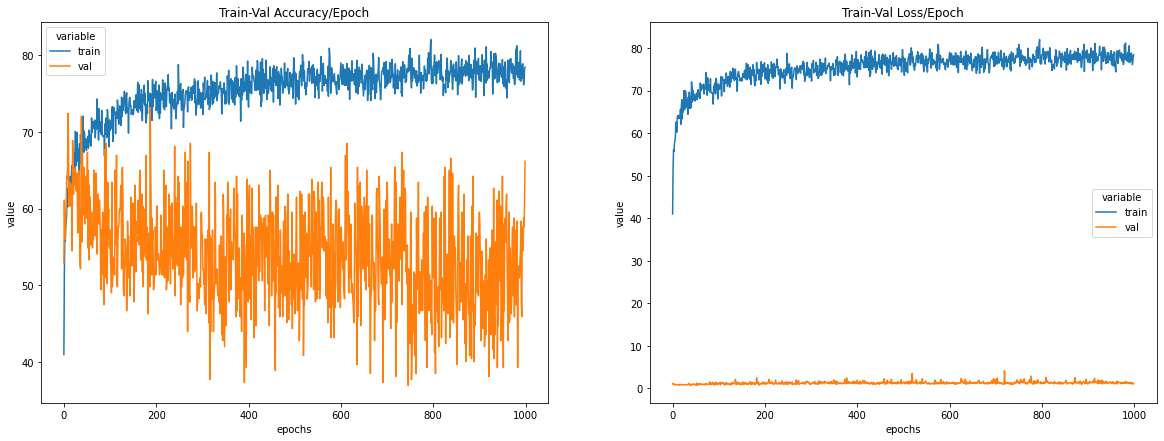

In [267]:
train_val_acc_df  = pd.DataFrame.from_dict(acc_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [268]:
y_pred_list = []

with torch.no_grad():
    rede.eval()
    for X_batch, _ in holdout_loader:
        X_batch        = X_batch.to(device)
        y_test_pred    = rede(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [269]:
gpos['pos_first'].astype('category').cat.categories

Index(['ATA', 'GOL', 'LAT', 'MEI', 'TEC', 'ZAG'], dtype='object')

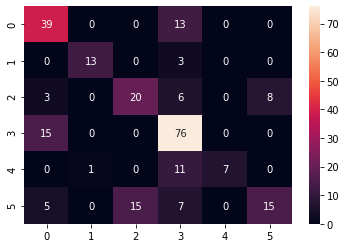

In [270]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_holdout, y_pred_list))
sns.heatmap(confusion_matrix_df, annot=True);

In [271]:
print(classification_report(y_holdout, y_pred_list))

              precision    recall  f1-score   support

           0       0.63      0.75      0.68        52
           1       0.93      0.81      0.87        16
           2       0.57      0.54      0.56        37
           3       0.66      0.84      0.73        91
           4       1.00      0.37      0.54        19
           5       0.65      0.36      0.46        42

    accuracy                           0.66       257
   macro avg       0.74      0.61      0.64       257
weighted avg       0.68      0.66      0.65       257



**referências**

[binary classifier using pytorch by prudvi rajkumar](https://medium.com/@prudhvirajnitjsr/simple-classifier-using-pytorch-37fba175c25c)<br/>
[pytorch - nn.linear](https://www.sharetechnote.com/html/Python_PyTorch_nn_Linear_01.html)

[PyTorch [Tabular] —Multiclass Classification | by Akshaj Verma | Towards Data Science](https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab)

* [Principal Component Analysis](https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)
* [Blog](https://sebastianraschka.com/blog/index.html)
* [Naive Bayes and Text Classification](https://sebastianraschka.com/Articles/2014_naive_bayes_1.html)
* [Index of /Articles](https://sebastianraschka.com/Articles/)
* [boosting classifier benchmark - Pesquisa Google](https://www.google.com/search?q=boosting+classifier+benchmark&client=ubuntu&hs=VsE&channel=fs&ei=bItgYPLROPTD5OUPkOuMkA0&oq=boosting+classifier+benck&gs_lcp=Cgdnd3Mtd2l6EAMYADIHCCEQChCgATIHCCEQChCgATIHCCEQChCgATIHCCEQChCgATIECCEQFToHCAAQRxCwAzoGCAAQFhAeOggIABAWEAoQHjoCCAA6BAgAEBM6CAgAEBYQHhATOgUIIRCgAVDNU1iGkAFg25kBaAJwAngAgAGpAYgB_hiSAQQyLjI1mAEAoAEBqgEHZ3dzLXdpesgBCMABAQ&sclient=gws-wiz)
* [Comparing 13 Algorithms on 165 Datasets (hint: use Gradient Boosting)](https://machinelearningmastery.com/start-with-gradient-boosting/)
* [Credit Card Fraud Detection using Autoencoders in Keras | TensorFlow for Hackers (Part VII) | Curiousily - Hacker's Guide to Machine Learning](https://curiousily.com/posts/credit-card-fraud-detection-using-autoencoders-in-keras/)
* [boosting vs neural network - Pesquisa Google](https://www.google.com/search?channel=fs&client=ubuntu&q=boosting+vs+neural+network)
* [classification - Deep Learning vs gradient boosting: When to use what? - Data Science Stack Exchange](https://datascience.stackexchange.com/questions/2504/deep-learning-vs-gradient-boosting-when-to-use-what)
* [machine learning - Why neural networks do not perform well on structured data? - Data Science Stack Exchange](https://datascience.stackexchange.com/questions/38392/why-neural-networks-do-not-perform-well-on-structured-data)
* [machine learning - Gradient Boosted Trees or Neural Networks Using Model Averaging? - Data Science Stack Exchange](https://datascience.stackexchange.com/questions/12147/gradient-boosted-trees-or-neural-networks-using-model-averaging)
* [In what situations do neural networks outperform gradient boosting and random forest models on regular numeric and categorical data (non-image or text data) if any? - Quora](https://www.quora.com/In-what-situations-do-neural-networks-outperform-gradient-boosting-and-random-forest-models-on-regular-numeric-and-categorical-data-non-image-or-text-data-if-any)
* [kinds of neural networks - Pesquisa Google](https://www.google.com/search?channel=fs&client=ubuntu&q=kinds+of+neural+networks)
* [Types of Neural Networks and Definition of Neural Network](https://www.mygreatlearning.com/blog/types-of-neural-networks/)
* [PyTorch: Introduction to Neural Network — Feedforward / MLP | by Andrea Eunbee Jang | BiaslyAI | Medium](https://medium.com/biaslyai/pytorch-introduction-to-neural-network-feedforward-neural-network-model-e7231cff47cb)
* [A Comprehensive Guide To Types Of Neural Networks](https://www.digitalvidya.com/blog/types-of-neural-networks/)
* [Feedforward Neural Networks and Multilayer Perceptrons - Boostedml](https://boostedml.com/2020/04/feedforward-neural-networks-and-multilayer-perceptrons.html)
* [Introduction to PyTorch for Classification](https://stackabuse.com/introduction-to-pytorch-for-classification/)
* [Binary Classifier using PyTorch. binary classifier on sklearn.moons… | by Prudvi RajKumar | Medium](https://medium.com/@prudhvirajnitjsr/simple-classifier-using-pytorch-37fba175c25c)
* [Learning PyTorch with Examples — PyTorch Tutorials 1.8.1+cu102 documentation](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)
* [mlp parameters - Google Search](https://www.google.com/search?q=mlp+parameters&tbm=isch&ved=2ahUKEwialPaPltTvAhUvGLkGHZBvD0sQ2-cCegQIABAA&oq=mlp+parameters&gs_lcp=CgNpbWcQAzIECAAQGDIECAAQGDoCCAA6BAgAEB46BggAEAgQHlD2-hVY75AWYNmRFmgAcAB4AIAB6gGIAfQLkgEFMy44LjGYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=ehVhYJrvIq-w5OUPkN-92AQ&bih=979&biw=933&client=ubuntu&hs=5O3#imgrc=LKCBfeQmZAws9M&imgdii=PEJ6KaL7KSzMvM)
* [ShareTechnote - 5G - What is 5G ?](https://www.sharetechnote.com/html/Python_PyTorch_nn_Linear_01.html)
* [Neural Networks — PyTorch Tutorials 1.8.1+cu102 documentation](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html)
* [Guide to Encoding Categorical Values in Python - Practical Business Python](https://pbpython.com/categorical-encoding.html)
* [PyTorch [Tabular] —Multiclass Classification | by Akshaj Verma | Towards Data Science](https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab)